In [8]:
import csv
import datetime
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
archivo = 'ene_febDFde1a4.csv'
dataframefinal = pd.read_csv('nuevascategorias_enfermedades/porfechayrango/' + archivo, sep = ',')
print(dataframefinal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    40 non-null     int64  
 1   Unnamed: 0.1                  40 non-null     float64
 2   IRA_Alta                      40 non-null     float64
 3   Influenza                     40 non-null     float64
 4   Neumonia                      40 non-null     float64
 5   Bronquitis_bronquiolitis      40 non-null     float64
 6   Crisis_obstructiva_bronquial  40 non-null     float64
 7   Otra_causa_respiratoria       40 non-null     float64
 8   CAUSAS_SISTEMA_RESPIRATORIO   40 non-null     float64
 9   COVID19_Confirmado_u          40 non-null     float64
 10  COVID19_Confirmado_h          40 non-null     float64
 11  Humedad                       40 non-null     float64
 12  Rocio                         40 non-null     float64
 13  Tempera

In [9]:
import itertools
periodos = ['ene_feb','mar_abr','may_jun','jul_ago','sep_oct','nov_dic']
rangosetareos = ['DFtotaltodos','DFmenores','DFde1a4','DFde5a14','DFde15a64','DFde65ymas']
#la linea a continuacion es importantisima, crea un diccionario de dataframes y luego elimina las molestas columnas que se generan automaticamente 
diccionario = {x+y :pd.read_csv('nuevascategorias_enfermedades/porfechayrango/' +x+y+ '.csv', sep = ',') for (x,y) in itertools.product(periodos,rangosetareos)}
for i in diccionario:
    del diccionario[i]["Unnamed: 0"]
    del diccionario[i]["Unnamed: 0.1"]

display(dataframefinal.head(20))

Unnamed: 0  Unnamed: 0.1  IRA_Alta  Influenza  Neumonia  \
0            0           0.0      41.0        3.0       2.0   
1            1           1.0      23.0        1.0       1.0   
2            2           2.0      27.0        2.0       0.0   
3            3           3.0      34.0        0.0       0.0   
4            4           4.0      37.0        0.0       1.0   
5            5           5.0      36.0        1.0       0.0   
6            6           6.0      21.0        1.0       0.0   
7            7           7.0      19.0        0.0       1.0   
8           52          52.0      28.0        0.0       0.0   
9           53          53.0      19.0        0.0       1.0   
10          54          54.0      12.0        0.0       0.0   
11          55          55.0      15.0        0.0       0.0   
12          56          56.0      19.0        0.0       0.0   
13          57          57.0      12.0        1.0       0.0   
14          58          58.0      17.0        0.0       0.0   
15          59          59.0      19.0        0.0       0.0   
16         104         104.0      46.0        0.0       2.0   
17         105         105.0      17.0        3.0       0.0   
18         106         106.0      13.0        0.0       0.0   
19         107         107.0      27.0        0.0       0.0   

    Bronquitis_bronquiolitis  Crisis_obstructiva_bronquial  \
0                       10.0                           0.0   
1                        7.0                           0.0   
2                        4.0                           0.0   
3                        9.0                           0.0   
4                        6.0                           0.0   
5                        3.0                           0.0   
6                        4.0                           1.0   
7                        6.0                           0.0   
8                       13.0                           0.0   
9                       10.0                           0.0   
10                      10.0                           0.0   
11                       6.0                           0.0   
12                       4.0                           0.0   
13                       7.0                           0.0   
14                       3.0                           0.0   
15                       6.0                           0.0   
16                       8.0                           0.0   
17                      10.0                           0.0   
18                       8.0                           0.0   
19                       3.0                           0.0   

    Otra_causa_respiratoria  CAUSAS_SISTEMA_RESPIRATORIO  \
0                       1.0                          3.0   
1                       4.0                          0.0   
2                       2.0                          0.0   
3                       0.0                          0.0   
4                       1.0                          0.0   
5                       3.0                          0.0   
6                       1.0                          0.0   
7                       0.0                          1.0   
8                       1.0                          0.0   
9                       0.0                          0.0   
10                      0.0                          0.0   
11                      0.0                          0.0   
12                      0.0                          0.0   
13                      0.0                          0.0   
14                      1.0                          0.0   
15                      0.0                          0.0   
16                      1.0                          1.0   
17                      2.0                          0.0   
18                      1.0                          1.0   
19                      0.0                          0.0   

    COVID19_Confirmado_u  COVID19_Confirmado_h  Humedad  Rocio  Temperatura  \
0                    0.0             

>## ***Importante***
>Para la creacion de los archivos .CSV que utilizo ademas del diccionario que creo aqui utilizo las claves para acceder a los valores autodescriptivos de la forma ***periodo-categoria*** donde los primeros 6 digitos hacen se refieren al periodo y los siguientes al rango de edad de la categoria al que pertenece siendo estos la concatenacion entre:
>>- ene_feb     
>>- mar_abr     
>>- may_jun 
>>- jul_ago  
>>- sep_oct
>>- nov_dic
>
>Cada periodos de dos en dos los meses del año y que comprenden 5 años desde ***2017 a 2021*** y los data frames
>
>>- DFtotaltodos: Todas las edades  
>>- DFmenores: Menores de 1 año
>>- DFde1a4: Niños de 1 a 4 años
>>- DFde5a14: Niños de 5 a 14 años
>>- DFde15a64: Adultos de 15 a 64 años
>>- DFde65ymas: Adultos mayores de 65 años
>

In [15]:
#del dataframefinal["Unnamed: 0"]
#del dataframefinal["Unnamed: 0.1"]
def algoritmo_dataframe(dataframefinal):
    print('----------------------')
    print('Media de cada variable')
    print('----------------------')
    print(dataframefinal.mean(axis=0))
    

    print('-------------------------')
    print('Varianza de cada variable')
    print('-------------------------')
    print(dataframefinal.var(axis=0))
    plt.style.use('ggplot')
    dataframefinal.plot(x=None, y=["MP10", "MP2.5"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Cantidad (microgramos por metro cubico)", fontsize=25)

    plt.show()
    dataframefinal.plot(x=None, y=["Temperatura", "Rocio", "Temperatura_min", "Temperatura_max"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Grados Celcius", fontsize=25)

    plt.show()
    
    plt.style.use('tableau-colorblind10')
    # plot multiple columns such as population and year from dataframe
    dataframefinal.plot(x=None, y=["Humedad"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Porcentaje", fontsize=25)  #revisar porcentaje

    plt.show()
    #-------------------------------$$$$-------------------------------------
    plt.style.use('classic')
    # plot multiple columns such as population and year from dataframe
    dataframefinal.plot(x=None, y=["IRA_Alta", "Influenza","Neumonia", "Bronquitis_bronquiolitis", "Crisis_obstructiva_bronquial",
                                   "Otra_causa_respiratoria", "CAUSAS_SISTEMA_RESPIRATORIO", "COVID19_Confirmado_u",
                                   "COVID19_Confirmado_h"], fontsize=20, kind="line",figsize=(20, 10))
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Cantidad de Diagnosticados", fontsize=25)  #revisar porcentaje

    # display plot
    plt.show()
    #normalizar usando standartscaler para comparar se puede utilizar print y return para ver el frame y su describe para comprobar que cumpla con una media 0 y std de 1
    plt.style.use('ggplot')
    
    matplotlib.rcParams.update(matplotlib.rcParamsDefault) # reset estilo a los valores por defecto
        
    normaliza2 = StandardScaler().fit_transform(dataframefinal)

    frame = pd.DataFrame(data = normaliza2,
                        index = None,
                        columns = dataframefinal.columns.values)
    display('     *** DataFrame normalizado a continuacion***',frame)
    # Entrenamiento modelo PCA con escalado de los datos
    # ==============================================================================
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    pca_pipe.fit(dataframefinal)

    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']
    #modelo_pca.components_
    # Se combierte el array a dataframe para añadir nombres a los ejes.
    dataframe_total_componentes = pd.DataFrame(
        data    = modelo_pca.components_,
        columns = dataframefinal.columns,
        index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16']
    )
    display('     *** DataFrame con todos los componentes principales PCA ***',dataframe_total_componentes)
    # Heatmap componentes
    # ==============================================================================
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))    # aqui cambie el dato, original (8,4)
    componentes = modelo_pca.components_
    plt.imshow(componentes.T, cmap='viridis', aspect='auto')
    plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
    plt.xticks(range(len(dataframefinal.columns)), np.arange(modelo_pca.n_components_) + 1)
    plt.grid(False)
    plt.colorbar();
    plt.show()
    # Porcentaje de varianza explicada por cada componente
    # ==============================================================================
    #print('----------------------------------------------------')
    #print('Porcentaje de varianza explicada por cada componente')
    #print('----------------------------------------------------')
    #print(modelo_pca.explained_variance_ratio_)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.bar(
        x      = np.arange(modelo_pca.n_components_) + 1,
        height = modelo_pca.explained_variance_ratio_
    )
    plt.show()
    
    for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, modelo_pca.explained_variance_ratio_):
        label = round(y, 2)
        ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_ylim(0, 1.1)
    ax.set_title('Porcentaje de varianza explicada por cada componente')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Por. varianza explicada');
    plt.show() #####
    # Porcentaje de varianza explicada acumulada
    # ==============================================================================
    prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
    print('------------------------------------------')
    print('Porcentaje de varianza explicada acumulada')
    print('------------------------------------------')
    print(prop_varianza_acum)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.plot(
        np.arange(len(dataframefinal.columns)) + 1,
        prop_varianza_acum,
        marker = 'o'
    )

    for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, prop_varianza_acum):
        label = round(y, 2)
        ax.annotate(
            label,
            (x,y),
            textcoords="offset points",
            xytext=(0,10),
            ha='center'
        )

    ax.set_ylim(0, 1.1)
    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_title('Porcentaje de varianza explicada acumulada')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Por. varianza acumulada');
    plt.show()  ##### ojo aqui
    # Proyección de las observaciones de entrenamiento
    # ==============================================================================
    proyecciones = pca_pipe.transform(X=dataframefinal)
    proyecciones = pd.DataFrame(
        proyecciones,
        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'],
        index   = dataframefinal.index
    )
    #proyecciones.head()
    #Cambiando el numero de componentes a 4 o 6
    pca_pipe2 = make_pipeline(StandardScaler(), PCA(n_components=4))
    pca_pipe2.fit(dataframefinal)
    # Se extrae el modelo entrenado del pipeline
    modelo_pca2 = pca_pipe2.named_steps['pca']
    #modelo_pca.components_
    # Se combierte el array a dataframe para añadir nombres a los ejes.
    pcadataframe = pd.DataFrame(
        data    = modelo_pca2.components_,
        columns = dataframefinal.columns,
        index   = ['PC1', 'PC2', 'PC3', 'PC4'])
    #modelo_pca2.components_.index()
    display('     *** DataFrame 4 componentes principales a continuacion ***',pcadataframe)
    
    plt.figure(figsize=(8,6))
    plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[1,:], s=9**2, c=["Blue"], alpha=0.6)
    plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[2,:], s=9**2, c=["green"], alpha=0.6)
    plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[3,:], s=9**2, c=["red"], alpha=0.6)
    plt.subplot().legend(['PC2','PC3','PC4'])
    plt.xlabel('Primer componente PC1')
    plt.ylabel('Componentes secundarias')
    plt.show()
    # Heatmap componentes
    # ==============================================================================
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
    componentes2 = modelo_pca2.components_
    plt.imshow(componentes2.T, cmap='viridis', aspect='auto')
    plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
    plt.xticks(range(4), np.arange(modelo_pca2.n_components_) + 1)
    plt.grid(False)
    plt.colorbar();
    plt.show()
    
        #return

## A partir de aqui se realiza el analisis exploratorio de los datos
Por cada celda se llama a la funcion definida mas arriba y esta despliega la informacion en el siguiente orden
>- Media de cada variable    
>- Varianza de cada variable
>- Grafico de variables contaminantes
>- Grafico de variables ambientales
>- Grafico de Humedad
>- Grafico de cantidad de enfermedades
>- DataFrame con variables normalizadas
>- DataFrame con componentes principales PCA
>- Mapa de calor componentes principales PCA
>- Grafico de representacion de varianza de cada componente
>- Grafico de varianza acumulada de las componentes (muestra un valor medio de 73% de representacion en 4 componentes)
>- DataFrame para las primeras 4 componentes
>- Grafico muestra las 4 componentes en el plano cartesiano
>- Mapa de calor para esas 4 componentes

### - Categoria: Todas las edades
### - Periodo: Enero - Febrero (8 semanas por 5 años)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
----------------------
Media de cada variable
----------------------
IRA_Alta                        63.8750
Influenza                        1.8500
Neumonia                         6.6000
Bronquitis_bronquiolitis        13.9250
Crisis_obstructiva_bronquial    13.1000
Otra_causa_respiratoria          9.5000
CAUSAS_SISTEMA_RESPIRATORIO      7.4000
COVID19_Confirmado_u             3.6000
COVID19_Confirmado_h             2.1000
Humedad   

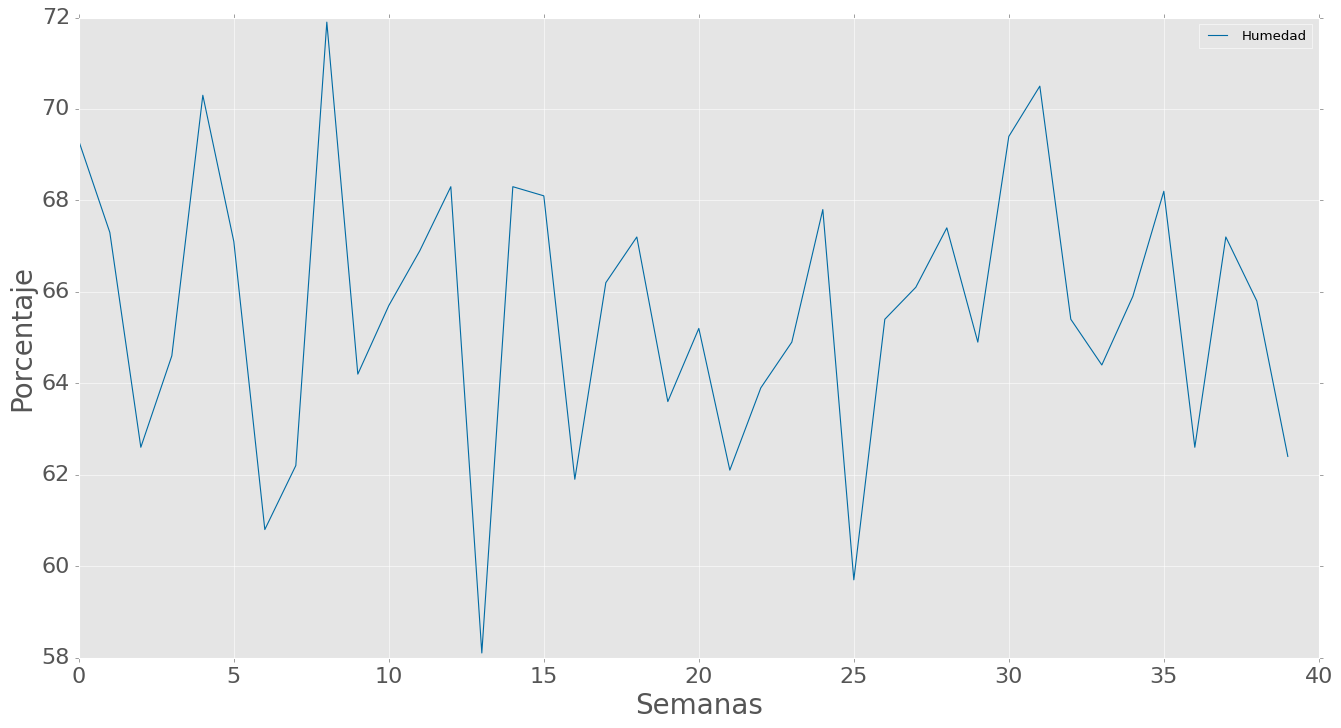

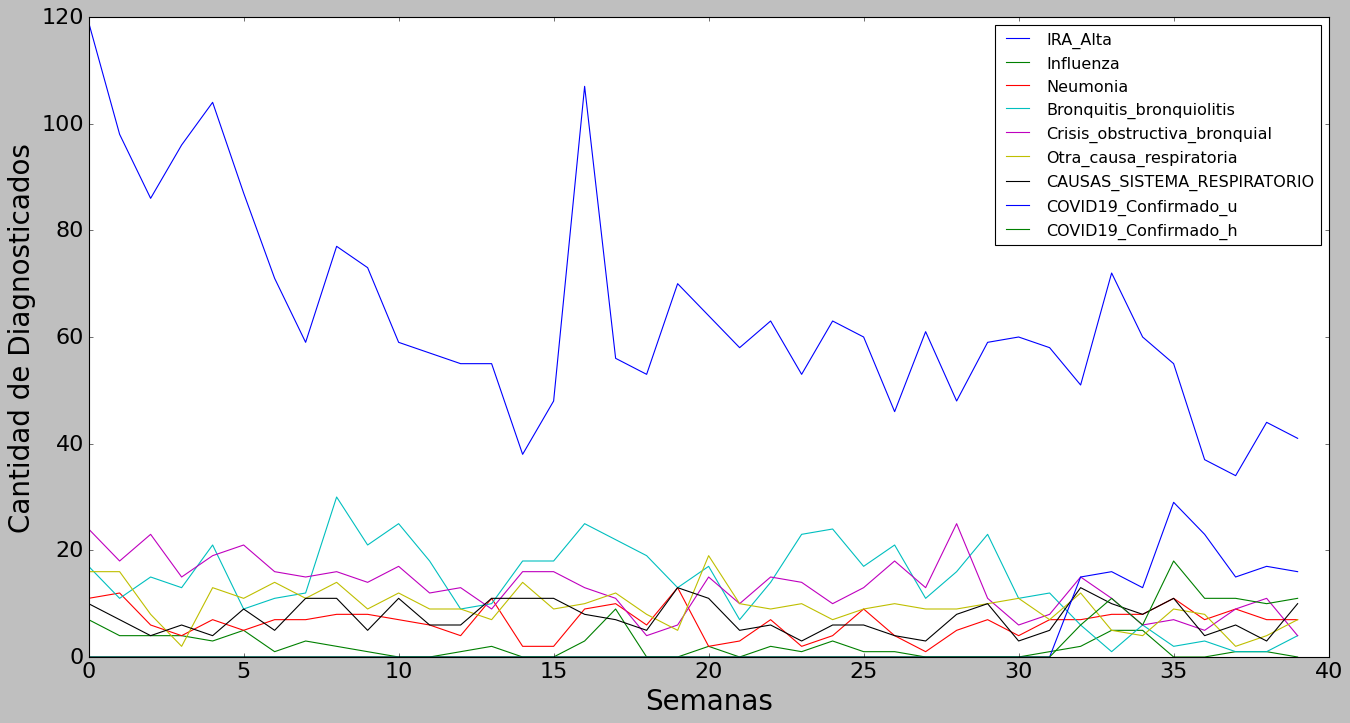

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   2.836415   2.420349  1.519049                  0.411210   
1   1.755876   1.010437  1.864287                 -0.391151   
2   1.138425   1.010437 -0.207143                  0.143756   
3   1.652967   1.010437 -0.897620                 -0.123697   
4   2.064601   0.540466  0.138095                  0.946118   
5   1.189879   1.480408 -0.552381                 -0.658605   
6   0.366611  -0.399475  0.138095                 -0.391151   
7  -0.250839   0.540466  0.138095                 -0.257424   
8   0.675337   0.070496  0.483334                  2.149660   
9   0.469520  -0.399475  0.483334                  0.946118   
10 -0.250839  -0.869446  0.138095                  1.481026   
11 -0.353748  -0.869446 -0.207143                  0.544937   
12 -0.456656  -0.399475 -0.897620                 -0.658605   
13 -0.456656   0.070496  1.519049                 -0.524878   
14 -1.331378  -0.869446 -1.588096                  0.544937   
15 -0.816836  -0.869446 -1.588096                  0.544937   
16  2.218964   0.540466  0.828572                  1.481026   
17 -0.405202   3.360290  1.173810                  1.079845   
18 -0.559565  -0.869446 -0.207143                  0.678664   
19  0.315157  -0.869446  2.209525                 -0.123697   
20  0.006432   0.070496 -1.588096                  0.411210   
21 -0.302294  -0.869446 -1.242858                 -0.926059   
22 -0.045022   0.070496  0.138095                  0.010030   
23 -0.559565  -0.399475 -1.588096                  1.213572   
24 -0.045022   0.540466 -0.897620                  1.347299   
25 -0.199385  -0.399475  0.828572                  0.411210   
26 -0.919744  -0.399475 -0.897620                  0.946118   
27 -0.147931  -0.869446 -1.933335                 -0.391151   
28 -0.816836  -0.869446 -0.552381                  0.277483   
29 -0.250839  -0.869446  0.138095                  1.213572   
30 -0.199385  -0.869446 -0.897620                 -0.391151   
31 -0.302294  -0.399475  0.138095                 -0.257424   
32 -0.662473   0.070496  0.138095                 -1.059786   
33  0.418066   1.480408  0.483334                 -1.728420   
34 -0.199385   1.480408  0.483334                 -1.059786   
35 -0.456656  -0.869446  1.519049                 -1.594694   
36 -1.382833  -0.869446  0.138095                 -1.460967   
37 -1.537195  -0.399475  0.828572                 -1.728420   
38 -1.022653  -0.399475  0.138095                 -1.728420   
39 -1.177016  -0.869446  0.138095                 -1.327240   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       2.088445                 1.799319   
1                       0.938842                 1.799319   
2                       1.896844                -0.415227   
3                       0.364041                -2.076137   
4                       1.130442                 0.968864   
5                       1.513643                 0.415227   
6                       0.555641                 1.245682   
7                       0.364041                 0.415227   
8                       0.555641                 1.245682   
9                       0.172440                -0.138409   
10                      0.747242                 0.692046   
11                     -0.210760                -0.138409   
12                     -0.019160                -0.138409   
13                     -0.785562                -0.692046   
14                      0.555641                 1.245682   
15                      0.555641                -0.138409   
16                     -0.019160                 0.138409   
17                     -0.402361                 0.692046   
18                     -1.743564                -0.415227   
19                     -1.360363                -1.245682   
20                      0.364041                 2.629774   
21                     -0.593961                 0.138409   
22               

'     *** DataFrame con todos los componentes principales PCA ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  -0.072352   0.002727  0.217350                 -0.184044   
PC2   0.402539   0.270159  0.103464                  0.296198   
PC3   0.260344   0.283743  0.302923                 -0.326447   
PC4   0.047319  -0.002304  0.247665                  0.087800   
PC5  -0.158518   0.003305  0.229631                  0.047381   
PC6   0.185668   0.623408  0.299169                  0.072171   
PC7   0.006834  -0.110343  0.440373                  0.378323   
PC8  -0.155441   0.342104 -0.441322                 -0.096798   
PC9  -0.192714   0.489362 -0.256632                 -0.107533   
PC10  0.125481  -0.237915  0.176062                 -0.570488   
PC11  0.687141  -0.173648 -0.394173                  0.225383   
PC12 -0.390210   0.000124  0.016047                  0.462550   
PC13 -0.018271  -0.031672  0.071041                 -0.013661   
PC14  0.013072  -0.028424  0.012939                  0.012911   
PC15 -0.011718   0.024280  0.000962                 -0.044023   
PC16 -0.030795  -0.000034  0.018023                 -0.010275   

      Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      -0.213536                -0.068157   
PC2                       0.307590                 0.327371   
PC3                       0.024564                -0.151248   
PC4                      -0.183036                -0.213659   
PC5                       0.202529                 0.354340   
PC6                       0.076072                -0.161945   
PC7                      -0.467240                -0.307984   
PC8                       0.153582                -0.608897   
PC9                      -0.651524                 0.420706   
PC10                     -0.095717                -0.046013   
PC11                     -0.291492                -0.069624   
PC12                      0.019148                -0.110794   
PC13                     -0.131291                 0.062870   
PC14                      0.018049                -0.044381   
PC15                     -0.012496                 0.004335   
PC16                      0.016744                 0.009455   

      CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                      0.169995              0.275005              0.283458   
PC2                      0.137420             -0.307125             -0.304972   
PC3                      0.053672              0.245514              0.242290   
PC4                     -0.024130             -0.268770             -0.269120   
PC5                      0.750895              0.121856              0.102371   
PC6                     -0.245463              0.070580              0.081621   
PC7                      0.256889             -0.112900             -0.093930   
PC8                      0.447902             -0.148248             -0.120926   
PC9                      0.047273             -0.068588             -0.125922   
PC10                     0.076981             -0.347984             -0.303848   
PC11                     0.188555              0.168036              0.179683   
PC12                    -0.118440              0.041188              0.065936   
PC13                    -0.013610              0.006105              0.034262   
PC14                    -0.002557              0.667254             -0.674769   
PC15                     0.009044              0.201894             -0.227945   
PC16                    -0.005964             -0.034958              0.040823   

       Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  -0.036854 -0.423725    -0.419453        -0.431286        -0.361918   
PC2   0.106034 -0.132815    -0.172611        -0.148005        -0.246980   
PC3  -0.097515  0.157332     0.190243         0.172030         0.202075   
PC4  -0.791684 -0.217109     0.085753        -0.069342         0.124830   
PC5  -0.150284  0.063887     0.113000         0.083732         0.174489   


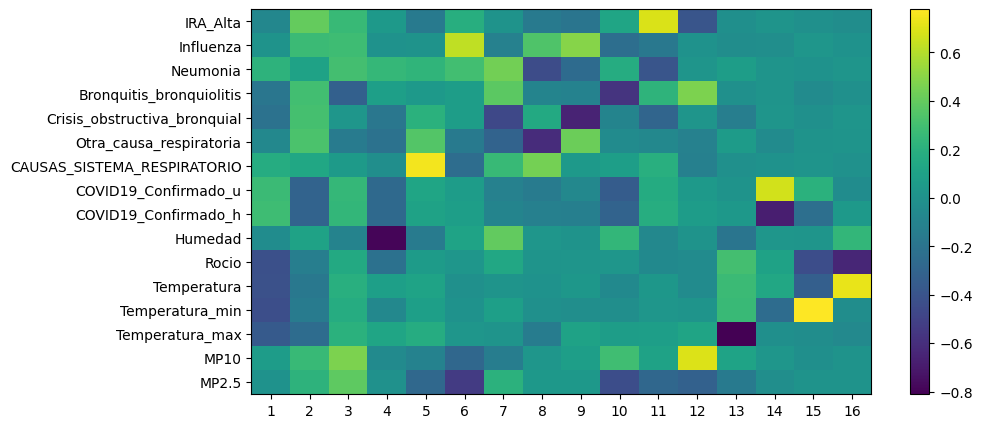

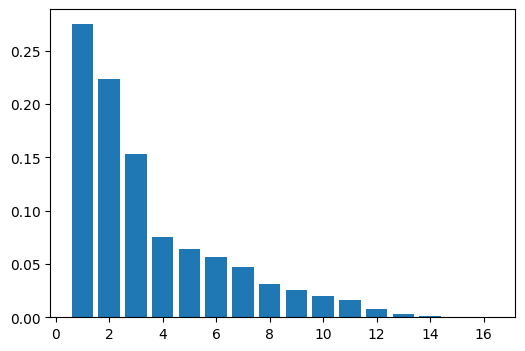

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27511666 0.49822541 0.65141619 0.72682816 0.7909854  0.84754783
 0.89437435 0.9258889  0.95111243 0.97077929 0.98672664 0.99495317
 0.99825642 0.99927479 0.99989187 1.        ]


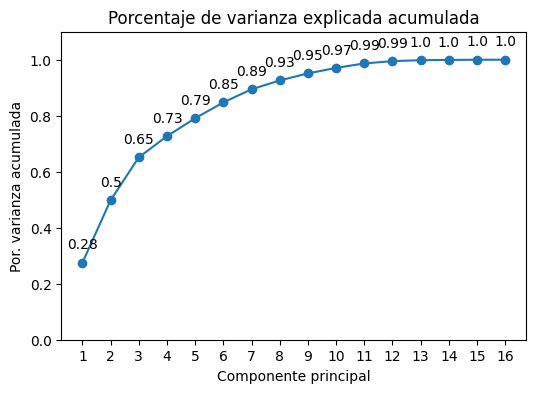

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1 -0.072352   0.002727  0.217350                 -0.184044   
PC2  0.402539   0.270159  0.103464                  0.296198   
PC3  0.260344   0.283743  0.302923                 -0.326447   
PC4  0.047319  -0.002304  0.247665                  0.087800   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                     -0.213536                -0.068157   
PC2                      0.307590                 0.327371   
PC3                      0.024564                -0.151248   
PC4                     -0.183036                -0.213659   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     0.169995              0.275005              0.283458   
PC2                     0.137420             -0.307125             -0.304972   
PC3                     0.053672              0.245514              0.242290   
PC4                    -0.024130             -0.268770             -0.269120   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1 -0.036854 -0.423725    -0.419453        -0.431286        -0.361918   
PC2  0.106034 -0.132815    -0.172611        -0.148005        -0.246980   
PC3 -0.097515  0.157332     0.190243         0.172030         0.202075   
PC4 -0.791684 -0.217109     0.085753        -0.069342         0.124830   

         MP10     MP2.5  
PC1  0.068505 -0.000220  
PC2  0.262928  0.218687  
PC3  0.467711  0.385230  
PC4 -0.051382 -0.005141

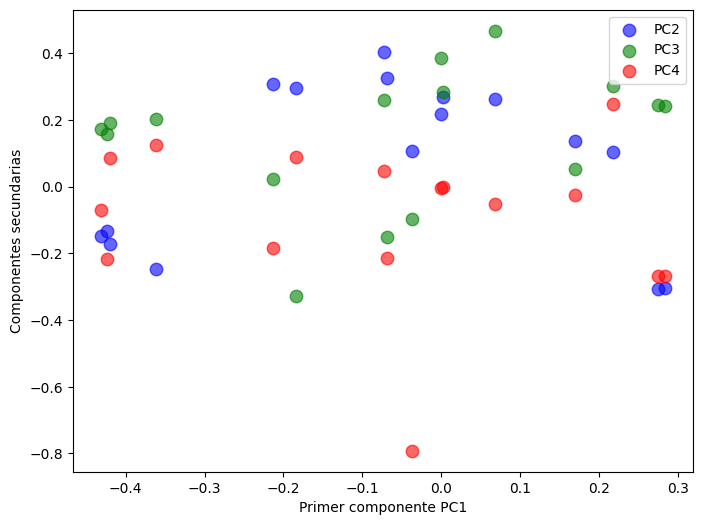

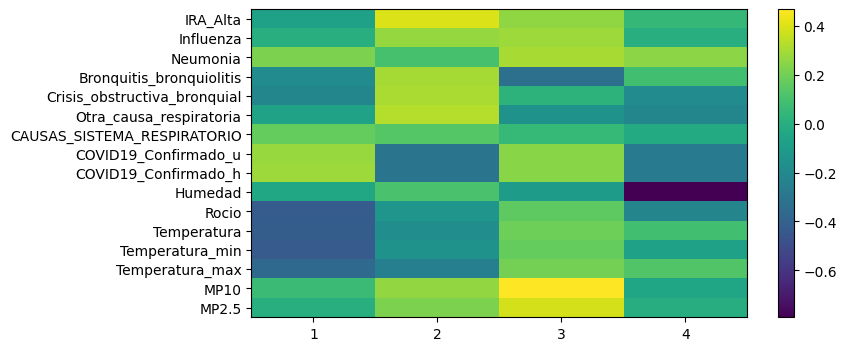

In [16]:
print(plt.style.available)
algoritmo_dataframe(diccionario['ene_febDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Marzo - Abril (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        93.155556
Influenza                        3.111111
Neumonia                         6.622222
Bronquitis_bronquiolitis        31.288889
Crisis_obstructiva_bronquial    16.311111
Otra_causa_respiratoria         11.266667
CAUSAS_SISTEMA_RESPIRATORIO      7.044444
COVID19_Confirmado_u             7.133333
COVID19_Confirmado_h             3.800000
Humedad                         68.904444
Rocio                           10.371111
Temperatura                     16.728889
Temperatura_min                 11.942222
Temperatura_max                 24.851111
MP10                            36.442222
MP2.5                           11.591111
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        1581.952525
Influenza                         14.328283
Neumonia                          10.467677
Bronquitis_bronquiolitis         7

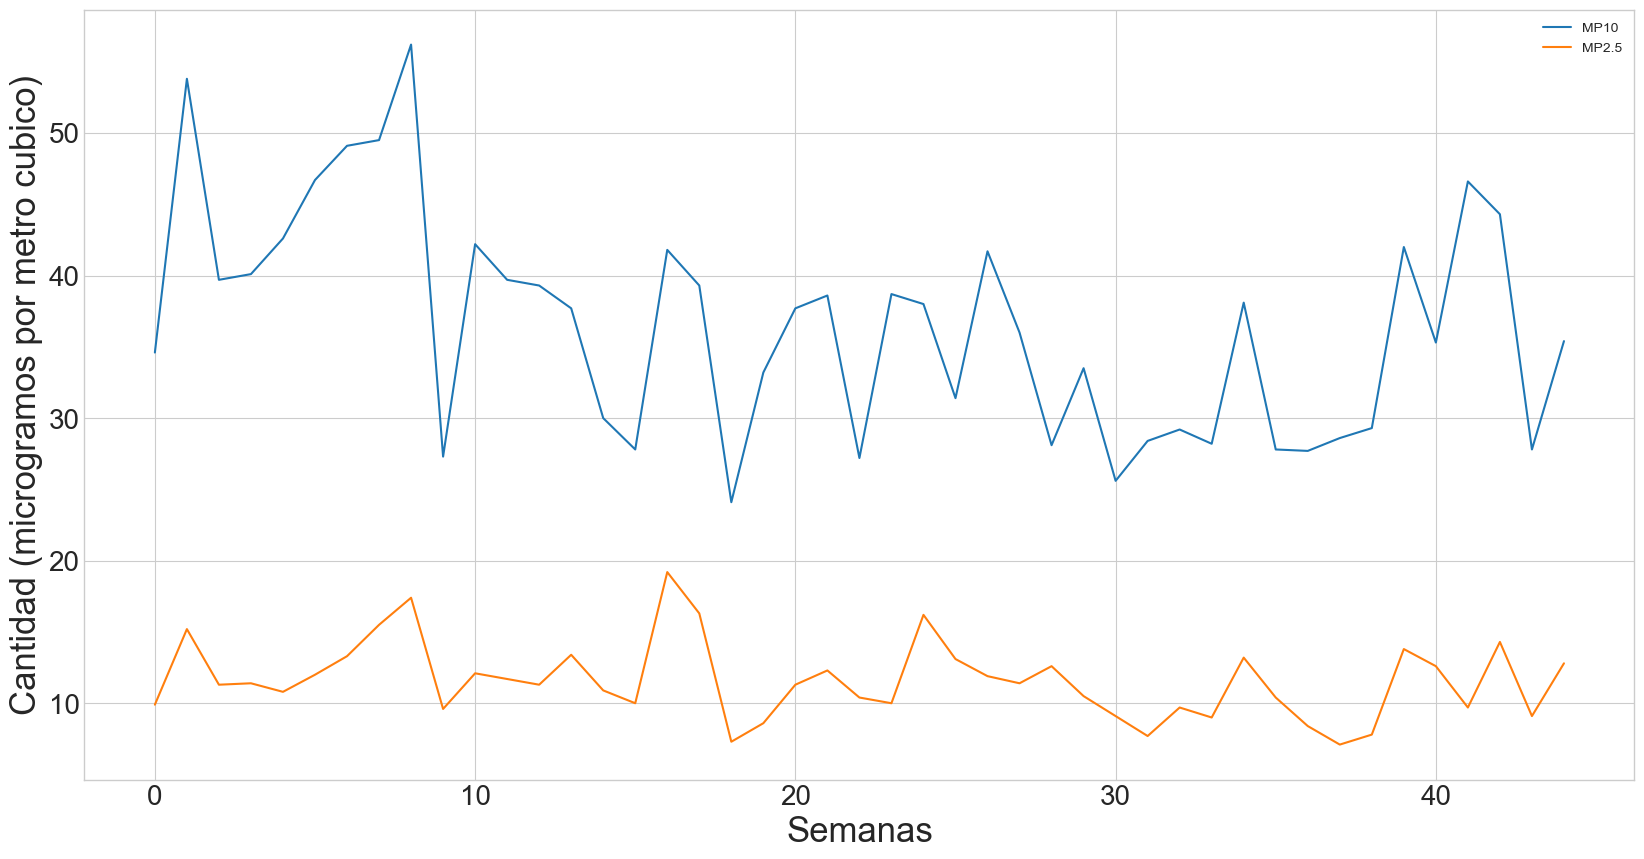

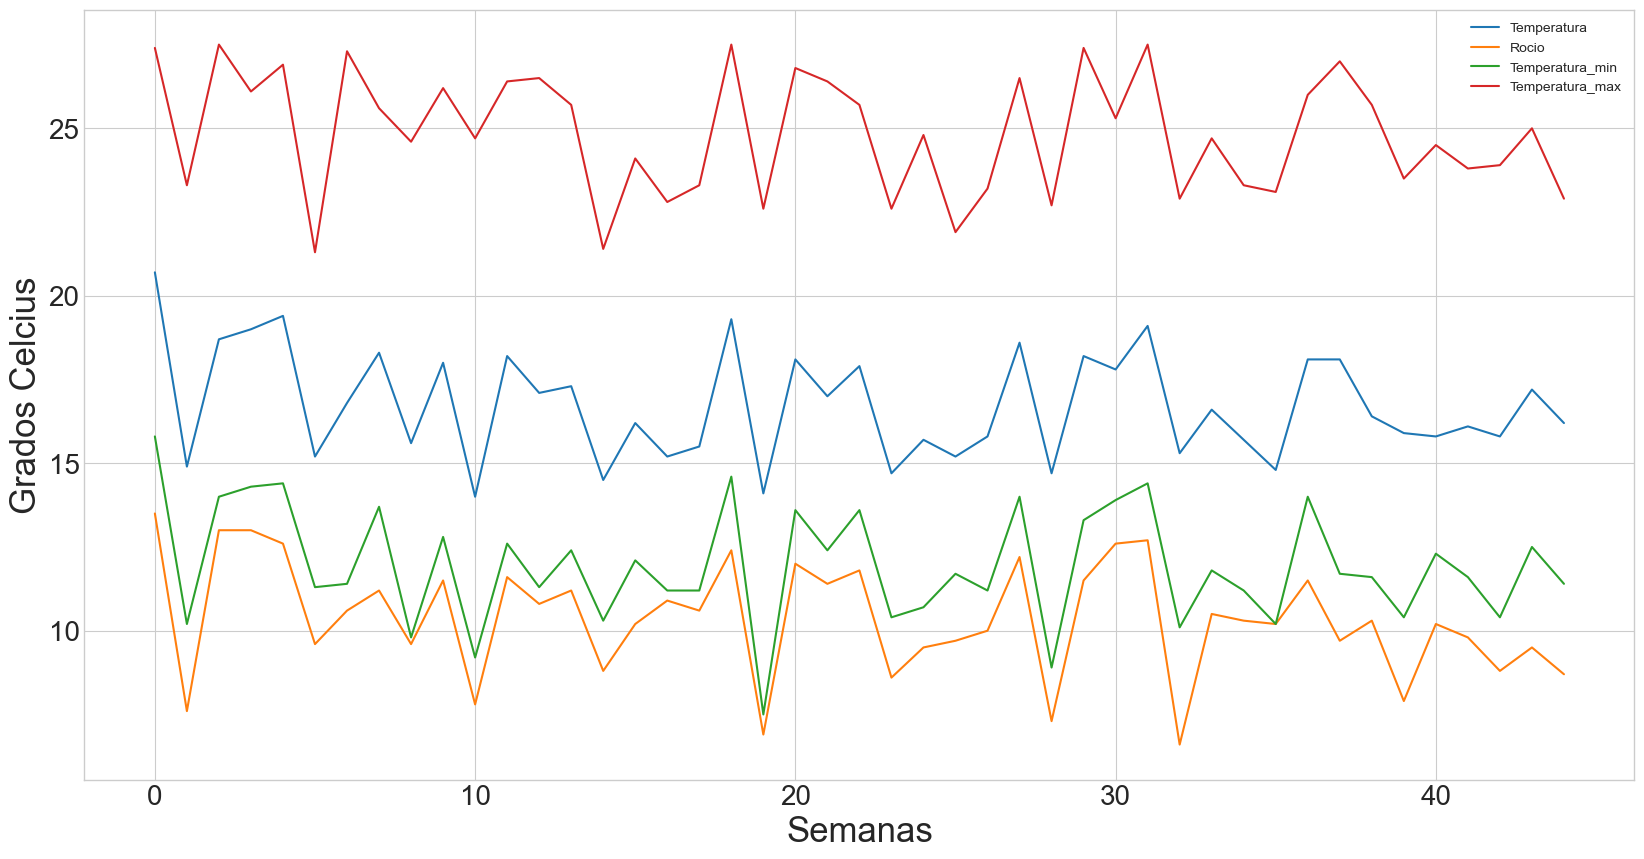

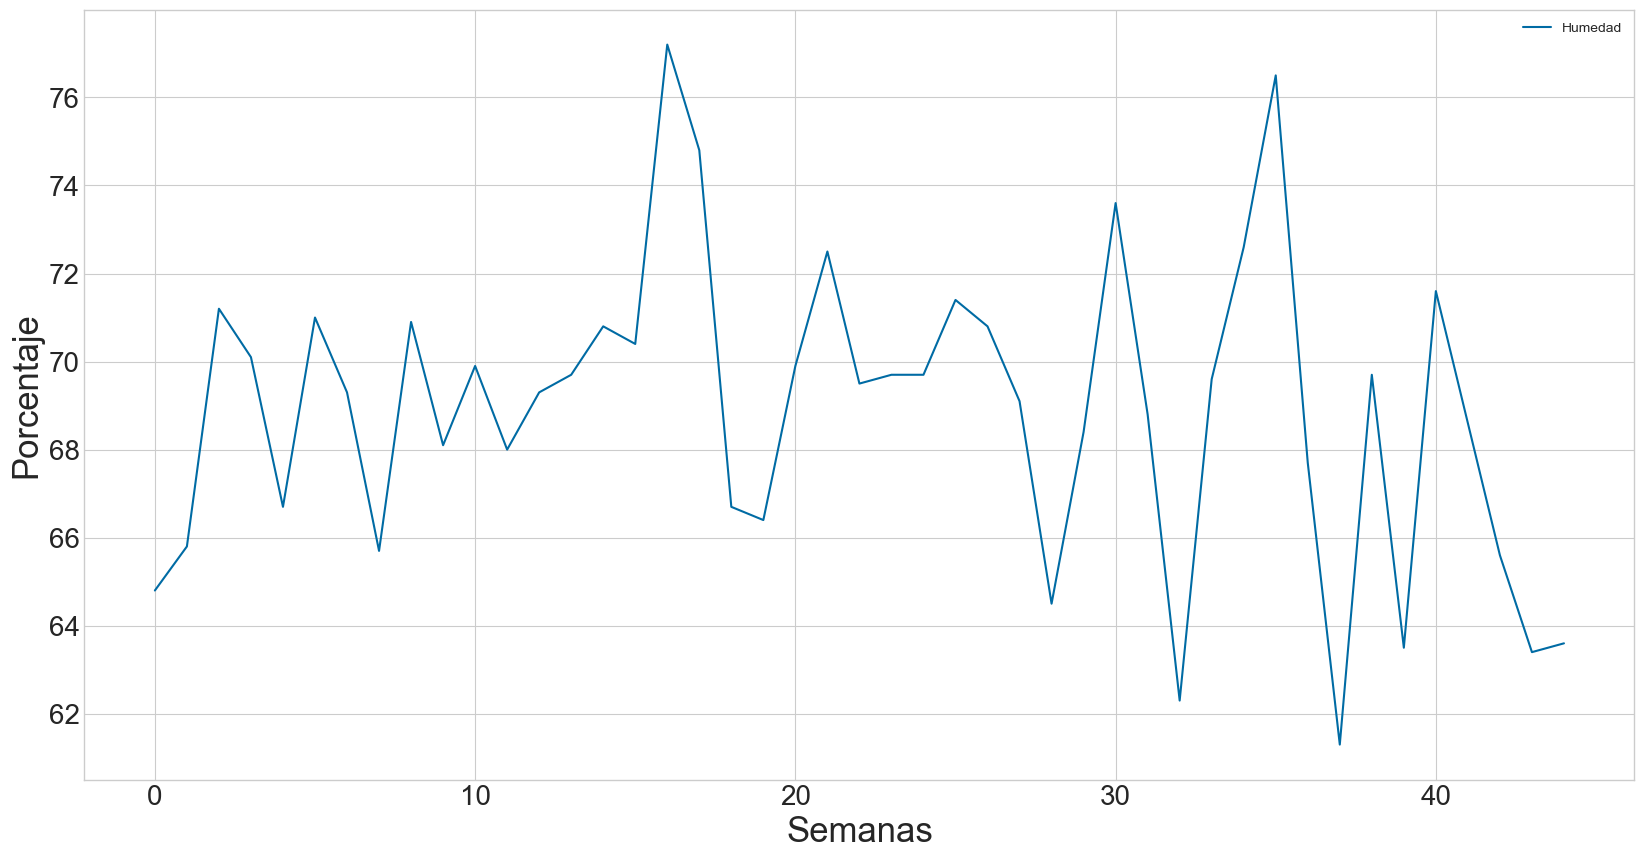

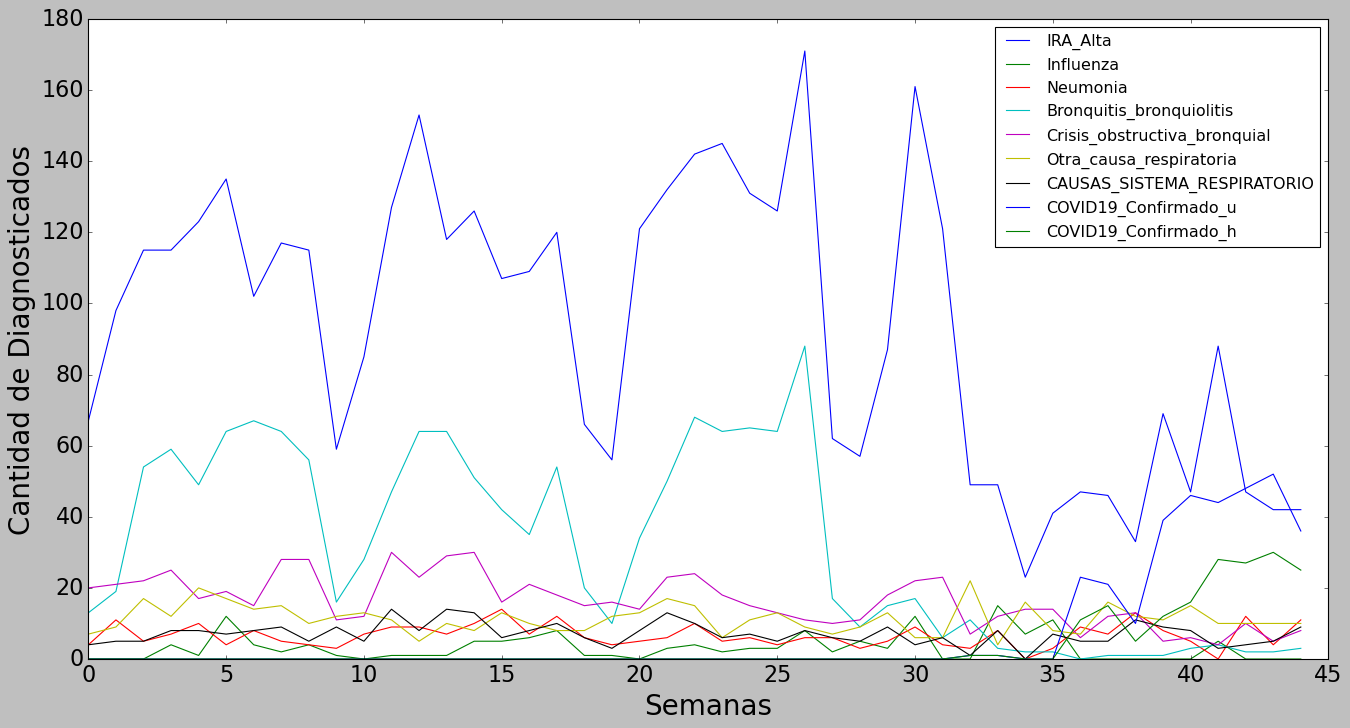

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0  -0.665039  -0.831186 -0.819642                 -0.695896   
1   0.123176  -0.831186  1.368386                 -0.467595   
2   0.555423  -0.831186 -0.507067                  0.864163   
3   0.555423   0.237482  0.118084                  1.054414   
4   0.758834  -0.564019  1.055810                  0.673911   
5   1.063949   2.374818 -0.819642                  1.244665   
6   0.224882   0.237482  0.430659                  1.358815   
7   0.606276  -0.296852 -0.507067                  1.244665   
8   0.555423   0.237482 -0.819642                  0.940263   
9  -0.868449  -0.564019 -1.132217                 -0.581745   
10 -0.207366  -0.831186  0.118084                 -0.125143   
11  0.860539  -0.564019  0.743235                  0.597811   
12  1.521623  -0.564019  0.743235                  1.244665   
13  0.631702  -0.564019  0.118084                  1.244665   
14  0.835113   0.504649  1.055810                  0.750012   
15  0.352013   0.504649  2.306112                  0.407560   
16  0.402866   0.771816  0.118084                  0.141209   
17  0.682555   1.306150  1.680961                  0.864163   
18 -0.690465  -0.564019 -0.194491                 -0.429545   
19 -0.944728  -0.564019 -0.819642                 -0.810047   
20  0.707981  -0.831186 -0.507067                  0.103158   
21  0.987671  -0.029685 -0.194491                  0.711962   
22  1.241934   0.237482  1.055810                  1.396865   
23  1.318212  -0.296852 -0.507067                  1.244665   
24  0.962244  -0.029685 -0.194491                  1.282715   
25  0.835113  -0.029685 -0.819642                  1.244665   
26  1.979296   1.306150 -0.194491                  2.157870   
27 -0.792171  -0.296852 -0.194491                 -0.543695   
28 -0.919302   0.504649 -1.132217                 -0.848097   
29 -0.156513  -0.029685 -0.507067                 -0.619796   
30  1.725033   2.374818  0.743235                 -0.543695   
31  0.707981  -0.831186 -0.819642                 -0.962248   
32 -1.122712  -0.831186 -1.132217                 -0.771996   
33 -1.122712   3.176319  0.430659                 -1.076398   
34 -1.783796   1.038983 -2.069944                 -1.114448   
35 -1.326123   2.107651 -1.132217                 -1.114448   
36 -1.173565  -0.831186  0.743235                 -1.190549   
37 -1.198991  -0.831186  0.118084                 -1.152499   
38 -1.529533  -0.831186  1.993536                 -1.152499   
39 -0.614186  -0.831186  0.430659                 -1.152499   
40 -1.173565  -0.831186 -0.507067                 -1.076398   
41 -0.131087   0.504649 -2.069944                 -1.038348   
42 -1.173565  -0.831186  1.680961                 -1.114448   
43 -1.300697  -0.831186 -0.819642                 -1.114448   
44 -1.300697  -0.831186  1.368386                 -1.076398   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       0.521035                -1.081180   
1                       0.662279                -0.574377   
2                       0.803523                 1.452835   
3                       1.227256                 0.185828   
4                       0.097302                 2.213040   
5                       0.379790                 1.452835   
6                      -0.185187                 0.692631   
7                       1.650989                 0.946032   
8                       1.650989                -0.320975   
9                      -0.750164                 0.185828   
10                     -0.608920                 0.439229   
11                      1.933478                -0.067574   
12                      0.944767                -1.587983   
13                      1.792233                -0.320975   
14                      1.933478                -0.827778   
15                     -0.043943                 0.439229   
16                      0.662279                -0.320975   
17     

'     *** DataFrame con todos los componentes principales PCA ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  -0.358751  -0.105541 -0.078256                 -0.346128   
PC2  -0.154894  -0.214835 -0.001898                 -0.205987   
PC3  -0.118232   0.452353 -0.231568                 -0.202353   
PC4  -0.039969  -0.156812 -0.572274                  0.070892   
PC5   0.026101   0.309748 -0.322446                 -0.041310   
PC6   0.033891  -0.228995 -0.092431                 -0.107553   
PC7   0.595021   0.101858 -0.169773                  0.427675   
PC8   0.062566   0.222379  0.678029                  0.012828   
PC9  -0.188253   0.621744 -0.044443                 -0.163716   
PC10 -0.063048   0.225202 -0.069128                  0.231470   
PC11 -0.051267  -0.083402 -0.043714                  0.104998   
PC12  0.053134   0.221157 -0.024107                  0.177996   
PC13  0.641158   0.044732 -0.037631                 -0.671688   
PC14 -0.108531   0.086516 -0.002572                  0.137034   
PC15  0.057188  -0.051392  0.031689                 -0.019531   
PC16 -0.030575  -0.003109  0.004063                  0.045116   

      Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      -0.380546                 0.016542   
PC2                      -0.083862                -0.005553   
PC3                      -0.085315                -0.247279   
PC4                      -0.014756                 0.505786   
PC5                      -0.145891                -0.157925   
PC6                       0.208358                -0.758072   
PC7                      -0.075879                -0.092471   
PC8                      -0.194644                 0.136889   
PC9                       0.383927                 0.106588   
PC10                     -0.725601                -0.158485   
PC11                     -0.044334                -0.049061   
PC12                      0.152154                 0.047657   
PC13                     -0.112771                 0.111885   
PC14                      0.126908                -0.031276   
PC15                     -0.066914                 0.029921   
PC16                      0.001301                -0.016670   

      CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     -0.237145              0.345841              0.344437   
PC2                     -0.012057              0.114881              0.122488   
PC3                     -0.218502             -0.269886             -0.254318   
PC4                     -0.434519             -0.254836             -0.245434   
PC5                     -0.207641              0.310197              0.301934   
PC6                     -0.305365             -0.153466             -0.117936   
PC7                     -0.150037              0.180089              0.251996   
PC8                     -0.603977             -0.120285             -0.076676   
PC9                      0.176075             -0.018452              0.081999   
PC10                     0.324557             -0.157905             -0.219883   
PC11                    -0.034632             -0.042991             -0.078798   
PC12                    -0.171928              0.083912              0.211332   
PC13                     0.104951              0.050949             -0.167283   
PC14                    -0.069970              0.666694             -0.594336   
PC15                    -0.019603              0.284919             -0.279050   
PC16                     0.003471             -0.017965              0.044274   

       Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  -0.239638 -0.317398    -0.197648        -0.224160        -0.185415   
PC2  -0.206632  0.328236     0.450691         0.409317         0.410544   
PC3   0.281157  0.063043    -0.079611        -0.013758        -0.125625   
PC4  -0.146911 -0.040104     0.062889        -0.006396         0.089640   
PC5   0.371075  0.309349     0.097783         0.227503        -0.001036   


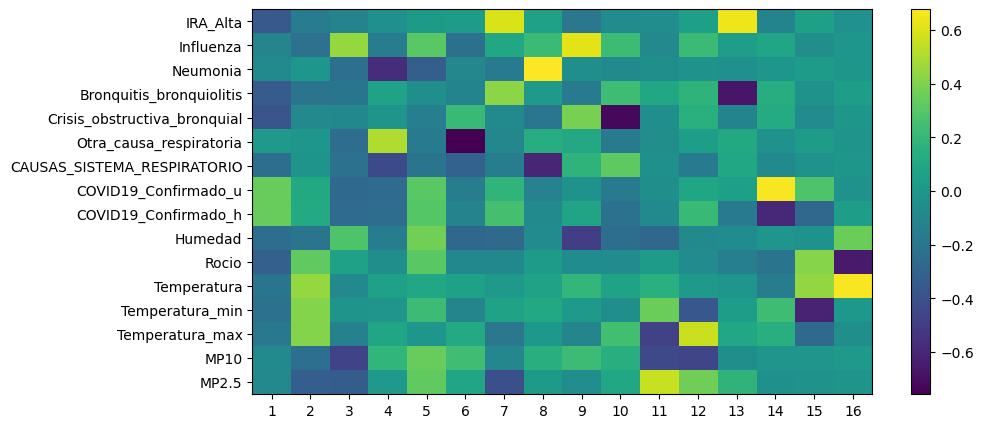

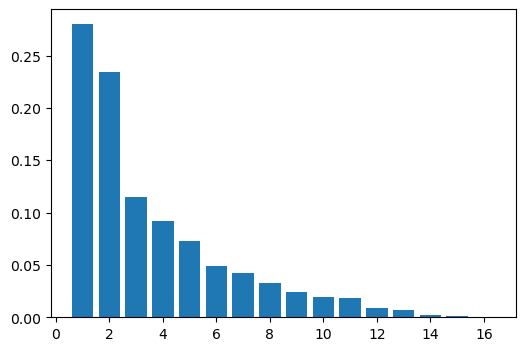

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.28016922 0.51435611 0.62953278 0.72112481 0.7942299  0.84333021
 0.88523239 0.918274   0.9428594  0.96231717 0.98039522 0.98949253
 0.99666269 0.9984874  0.999885   1.        ]


'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1 -0.358751  -0.105541 -0.078256                 -0.346128   
PC2 -0.154894  -0.214835 -0.001898                 -0.205987   
PC3 -0.118232   0.452353 -0.231568                 -0.202353   
PC4 -0.039969  -0.156812 -0.572274                  0.070892   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                     -0.380546                 0.016542   
PC2                     -0.083862                -0.005553   
PC3                     -0.085315                -0.247279   
PC4                     -0.014756                 0.505786   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                    -0.237145              0.345841              0.344437   
PC2                    -0.012057              0.114881              0.122488   
PC3                    -0.218502             -0.269886             -0.254318   
PC4                    -0.434519             -0.254836             -0.245434   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1 -0.239638 -0.317398    -0.197648        -0.224160        -0.185415   
PC2 -0.206632  0.328236     0.450691         0.409317         0.410544   
PC3  0.281157  0.063043    -0.079611        -0.013758        -0.125625   
PC4 -0.146911 -0.040104     0.062889        -0.006396         0.089640   

         MP10     MP2.5  
PC1 -0.075425 -0.084336  
PC2 -0.234796 -0.327469  
PC3 -0.466528 -0.331907  
PC4  0.188948  0.018471

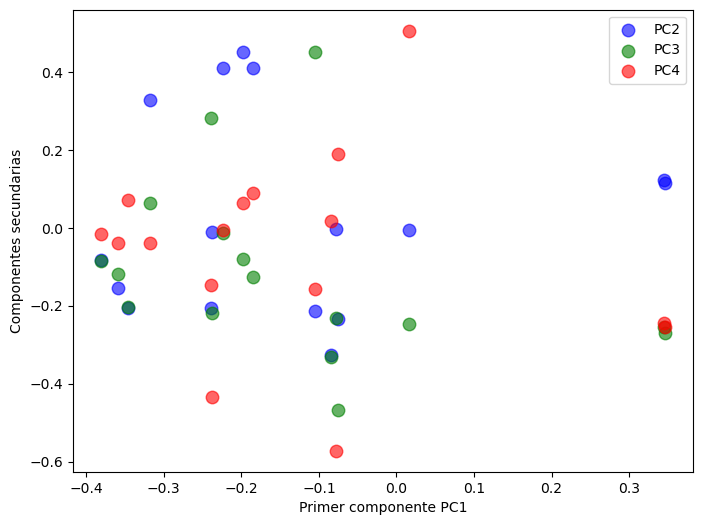

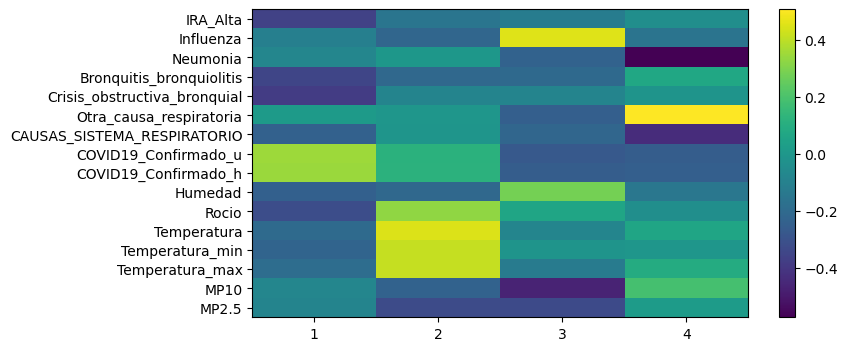

In [41]:
algoritmo_dataframe(diccionario['mar_abrDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Mayo - Junio (8 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        113.475
Influenza                        10.975
Neumonia                          9.450
Bronquitis_bronquiolitis         50.050
Crisis_obstructiva_bronquial     24.275
Otra_causa_respiratoria          13.025
CAUSAS_SISTEMA_RESPIRATORIO      10.825
COVID19_Confirmado_u              8.375
COVID19_Confirmado_h              4.775
Humedad                          65.915
Rocio                             7.385
Temperatura                      14.675
Temperatura_min                   9.550
Temperatura_max                  22.525
MP10                             54.360
MP2.5                            17.145
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        3014.460897
Influenza                        139.153205
Neumonia                          41.023077
Bronquitis_bronquiolitis        1835.125641
Crisis_obstructiva_bro

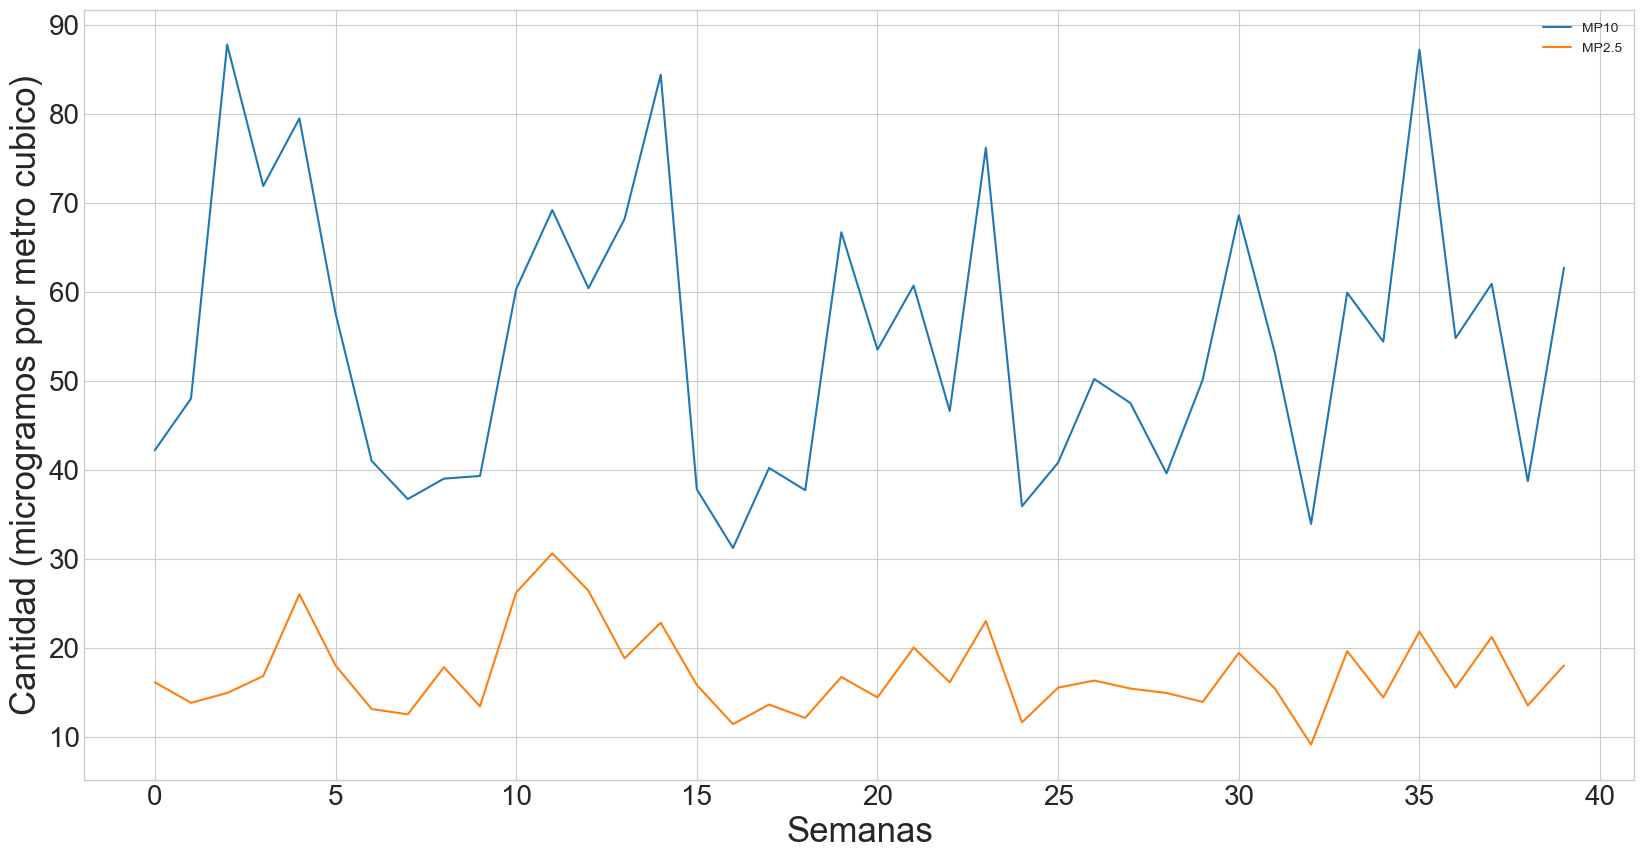

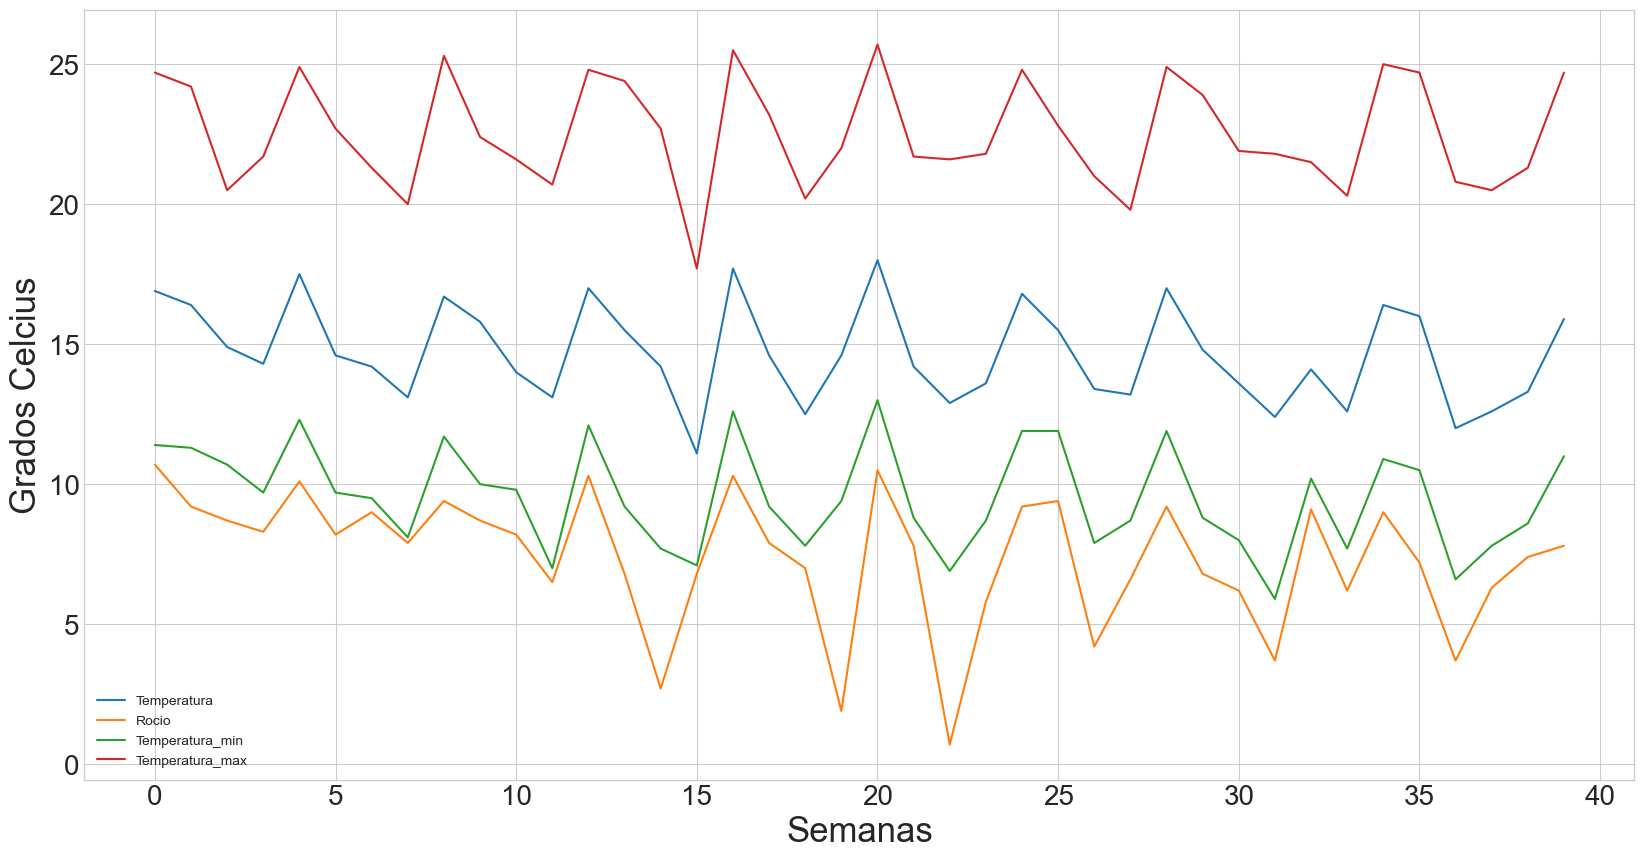

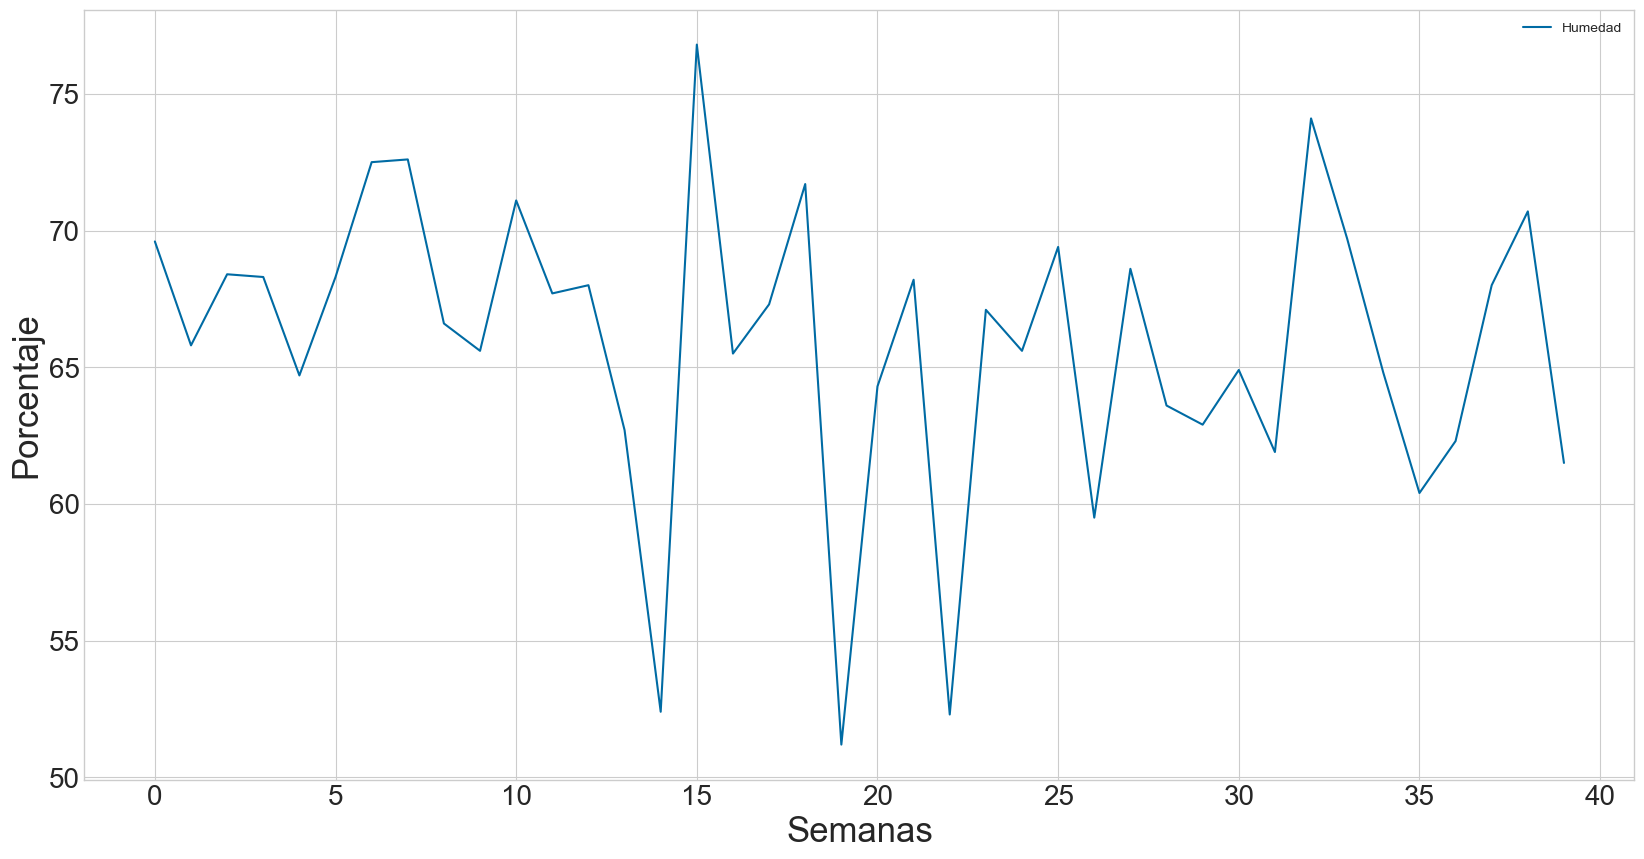

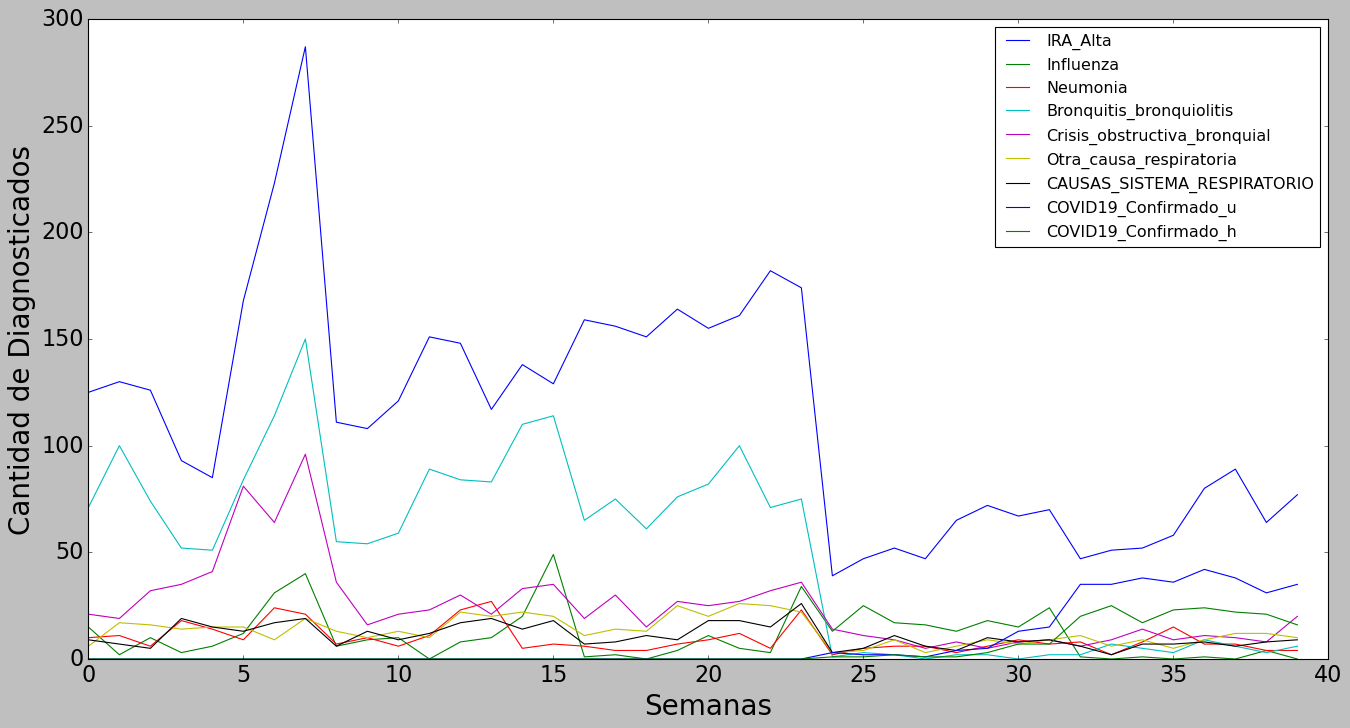

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   0.212586   0.345555  0.086965                  0.495278   
1   0.304814  -0.770523  0.245084                  1.180865   
2   0.231031  -0.083706 -0.545510                  0.566201   
3  -0.377674  -0.684671  1.351916                  0.046100   
4  -0.525239  -0.427114  0.719441                  0.022459   
5   1.005747   0.087998 -0.071153                  0.802610   
6   2.020255   1.719189  2.300629                  1.511838   
7   3.200773   2.491858  1.826272                  2.362912   
8  -0.045653  -0.427114 -0.387391                  0.117023   
9  -0.100990  -0.169558  0.086965                  0.093382   
10  0.138803  -0.083706 -0.545510                  0.211586   
11  0.692171  -0.942227  0.245084                  0.920815   
12  0.636834  -0.255410  2.142510                  0.802610   
13  0.065021  -0.083706  2.774985                  0.778969   
14  0.452378   0.774815 -0.703629                  1.417275   
15  0.286368   3.264527 -0.387391                  1.511838   
16  0.839736  -0.856375 -0.545510                  0.353432   
17  0.784399  -0.770523 -0.861748                  0.589842   
18  0.692171  -0.942227 -0.861748                  0.258868   
19  0.931964  -0.598819 -0.387391                  0.613482   
20  0.765954   0.002146 -0.071153                  0.755328   
21  0.876627  -0.512966  0.403203                  1.180865   
22  1.263985  -0.684671 -0.703629                  0.495278   
23  1.116420   1.976745  2.142510                  0.589842   
24 -1.373736   0.173851 -1.177985                 -1.159588   
25 -1.226171   1.204076 -0.703629                 -1.112306   
26 -1.133943   0.517259 -0.545510                 -1.135947   
27 -1.226171   0.431407 -0.545510                 -1.183229   
28 -0.894151   0.173851 -1.019866                 -1.135947   
29 -0.765031   0.603111 -0.545510                 -1.135947   
30 -0.857259   0.345555 -0.071153                 -1.183229   
31 -0.801923   1.118224 -0.387391                 -1.135947   
32 -1.226171  -0.856375 -0.229272                 -1.135947   
33 -1.152389  -0.942227 -1.177985                 -1.017743   
34 -1.133943  -0.856375 -0.229272                 -1.065024   
35 -1.023270  -0.942227  0.877559                 -1.112306   
36 -0.617467  -0.856375 -0.387391                 -0.970461   
37 -0.451456  -0.942227 -0.387391                 -1.041384   
38 -0.912596  -0.598819 -0.861748                 -1.112306   
39 -0.672803  -0.942227 -0.861748                 -1.041384   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                      -0.170053                -1.118121   
1                      -0.273902                 0.632673   
2                       0.401116                 0.473510   
3                       0.556890                 0.155184   
4                       0.868437                 0.314347   
5                       2.945415                 0.314347   
6                       2.062699                -0.640631   
7                       3.724282                 0.950999   
8                       0.608814                -0.003979   
9                      -0.429675                -0.481468   
10                     -0.170053                -0.003979   
11                     -0.066204                -0.481468   
12                      0.297268                 1.428489   
13                     -0.170053                 1.110163   
14                      0.453041                 1.428489   
15                      0.556890                 1.110163   
16                     -0.273902                -0.322305   
17                      0.297268                 0.155184   
18                     -0.481599                -0.003979   
19                      0.141494                 1.905978   
20                      0.037645                 1.110163   
21                      0.141494                 2.065141   
22               

'     *** DataFrame con todos los componentes principales PCA ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1   0.382712   0.224280  0.275875                  0.402305   
PC2  -0.012386  -0.092682  0.061998                  0.028948   
PC3   0.053188   0.291516 -0.111653                  0.019109   
PC4   0.049193  -0.013756 -0.437326                  0.022147   
PC5  -0.341312   0.383434 -0.017290                 -0.182069   
PC6   0.153905  -0.520186 -0.411681                  0.244912   
PC7   0.168565   0.315593 -0.209123                  0.045431   
PC8  -0.227826   0.427071 -0.445466                  0.043335   
PC9  -0.104767  -0.244523  0.239363                 -0.018003   
PC10 -0.274826  -0.290121 -0.249593                 -0.464506   
PC11 -0.198213   0.005690  0.411126                 -0.252902   
PC12 -0.525690  -0.006050  0.106836                  0.284329   
PC13 -0.470952  -0.089636 -0.015143                  0.573457   
PC14  0.048370   0.051757  0.041985                 -0.188576   
PC15  0.036504   0.032733 -0.027247                 -0.116420   
PC16  0.004274  -0.022760 -0.040157                 -0.022904   

      Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                       0.346198                 0.316000   
PC2                       0.026128                -0.077546   
PC3                       0.093799                -0.222625   
PC4                      -0.116297                 0.119426   
PC5                      -0.239081                -0.318606   
PC6                       0.033001                 0.108145   
PC7                       0.635021                -0.375096   
PC8                      -0.046228                 0.555894   
PC9                       0.054386                -0.079066   
PC10                      0.544755                 0.018598   
PC11                      0.211634                 0.350416   
PC12                      0.205608                 0.213533   
PC13                      0.069036                -0.248735   
PC14                      0.022335                 0.161855   
PC15                      0.029631                 0.060995   
PC16                      0.024121                -0.024782   

      CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                      0.363761             -0.313703             -0.310160   
PC2                     -0.060513             -0.155337             -0.175721   
PC3                     -0.095834             -0.062213             -0.054293   
PC4                     -0.165344             -0.347379             -0.360716   
PC5                     -0.001096             -0.400276             -0.386187   
PC6                     -0.325957             -0.151583             -0.106282   
PC7                     -0.382796              0.112138              0.095351   
PC8                      0.059335              0.153203              0.132985   
PC9                     -0.126385             -0.164945             -0.138273   
PC10                     0.481897             -0.063820             -0.119640   
PC11                    -0.435551             -0.082372             -0.009726   
PC12                    -0.271671             -0.040029             -0.067362   
PC13                     0.221948              0.042044              0.130546   
PC14                    -0.095272              0.242342             -0.222397   
PC15                     0.003952             -0.643032              0.657444   
PC16                     0.033609              0.141490             -0.125878   

       Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1   0.037885 -0.003985    -0.022211        -0.031991        -0.067816   
PC2   0.057869  0.438344     0.507091         0.508754         0.440207   
PC3   0.476666  0.217209    -0.169152        -0.038529        -0.256970   
PC4  -0.474175 -0.334232     0.047216        -0.042958         0.079366   
PC5   0.104302  0.045898    -0.041985        -0.024671        -0.116473   


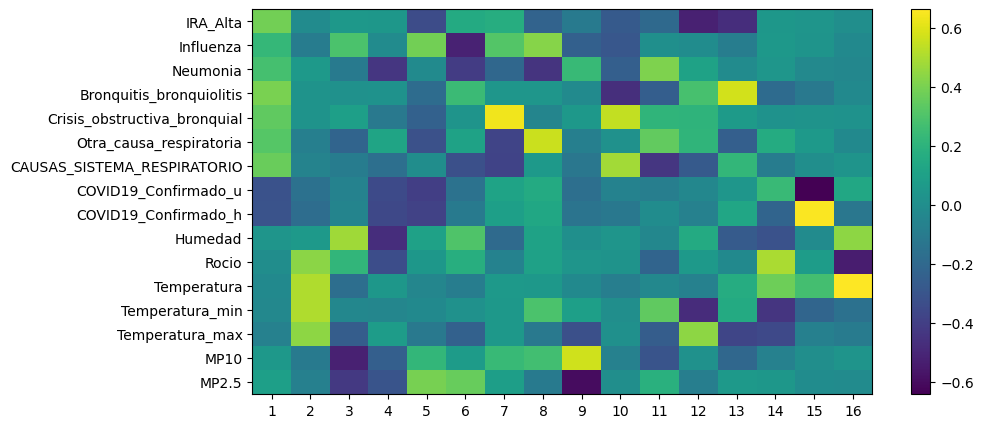

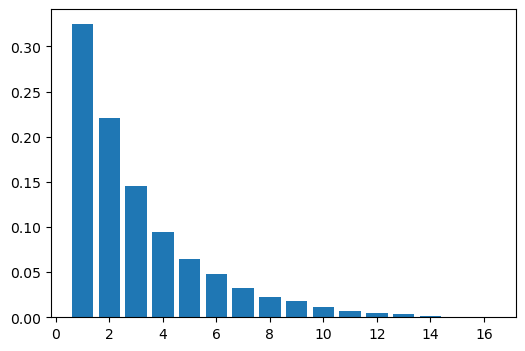

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.32480962 0.54560271 0.69094571 0.78488169 0.84893581 0.89695405
 0.92961841 0.95238574 0.97085059 0.9820431  0.98933815 0.99442566
 0.99803282 0.99904716 0.99983022 1.        ]


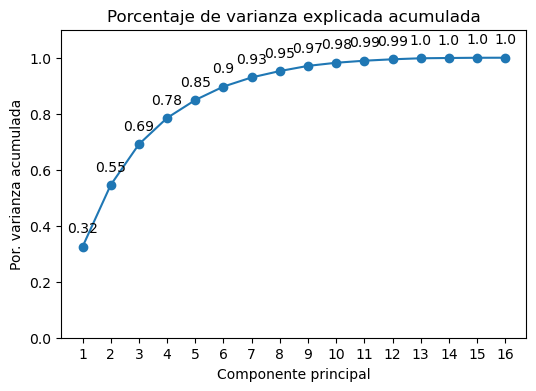

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  0.382712   0.224280  0.275875                  0.402305   
PC2 -0.012386  -0.092682  0.061998                  0.028948   
PC3  0.053188   0.291516 -0.111653                  0.019109   
PC4  0.049193  -0.013756 -0.437326                  0.022147   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      0.346198                 0.316000   
PC2                      0.026128                -0.077546   
PC3                      0.093799                -0.222625   
PC4                     -0.116297                 0.119426   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     0.363761             -0.313703             -0.310160   
PC2                    -0.060513             -0.155337             -0.175721   
PC3                    -0.095834             -0.062213             -0.054293   
PC4                    -0.165344             -0.347379             -0.360716   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  0.037885 -0.003985    -0.022211        -0.031991        -0.067816   
PC2  0.057869  0.438344     0.507091         0.508754         0.440207   
PC3  0.476666  0.217209    -0.169152        -0.038529        -0.256970   
PC4 -0.474175 -0.334232     0.047216        -0.042958         0.079366   

         MP10     MP2.5  
PC1  0.051248  0.091871  
PC2 -0.102521 -0.073826  
PC3 -0.523528 -0.424728  
PC4 -0.246709 -0.303216

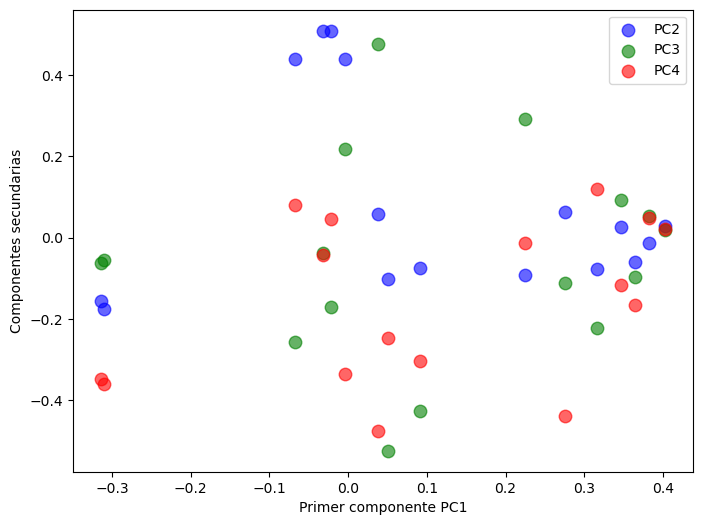

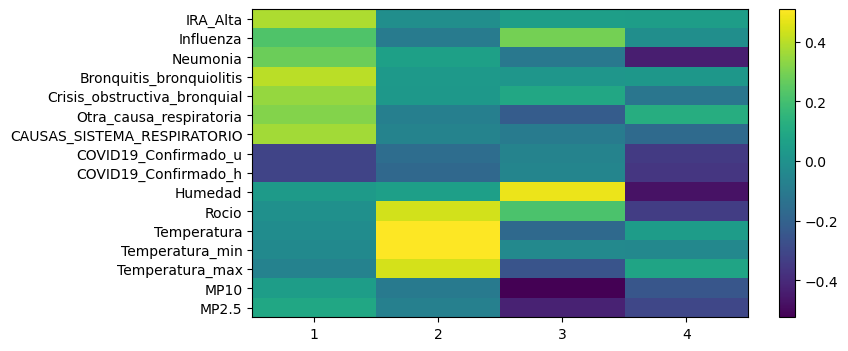

In [42]:
algoritmo_dataframe(diccionario['may_junDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Julio - Agosto (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        121.488889
Influenza                        19.555556
Neumonia                         13.400000
Bronquitis_bronquiolitis         59.088889
Crisis_obstructiva_bronquial     30.422222
Otra_causa_respiratoria          14.222222
CAUSAS_SISTEMA_RESPIRATORIO      15.600000
COVID19_Confirmado_u              7.088889
COVID19_Confirmado_h              3.688889
Humedad                          66.402222
Rocio                             7.342222
Temperatura                      14.486667
Temperatura_min                   9.391111
Temperatura_max                  22.582222
MP10                             50.020000
MP2.5                            17.953333
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        6081.937374
Influenza                        577.570707
Neumonia                          93.927273
Bronquitis_bronqui

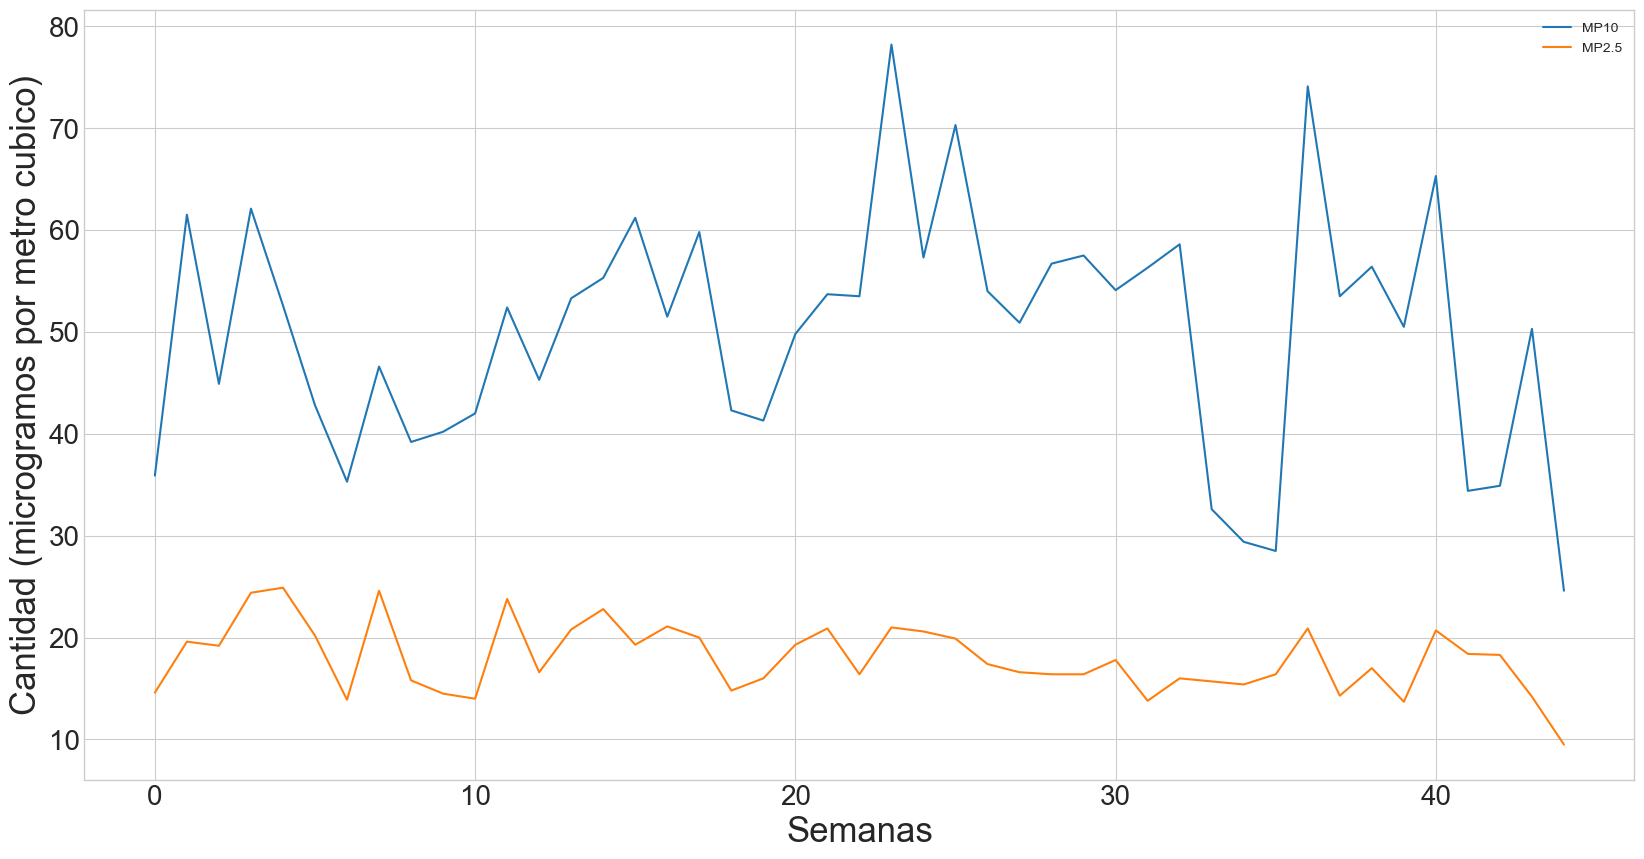

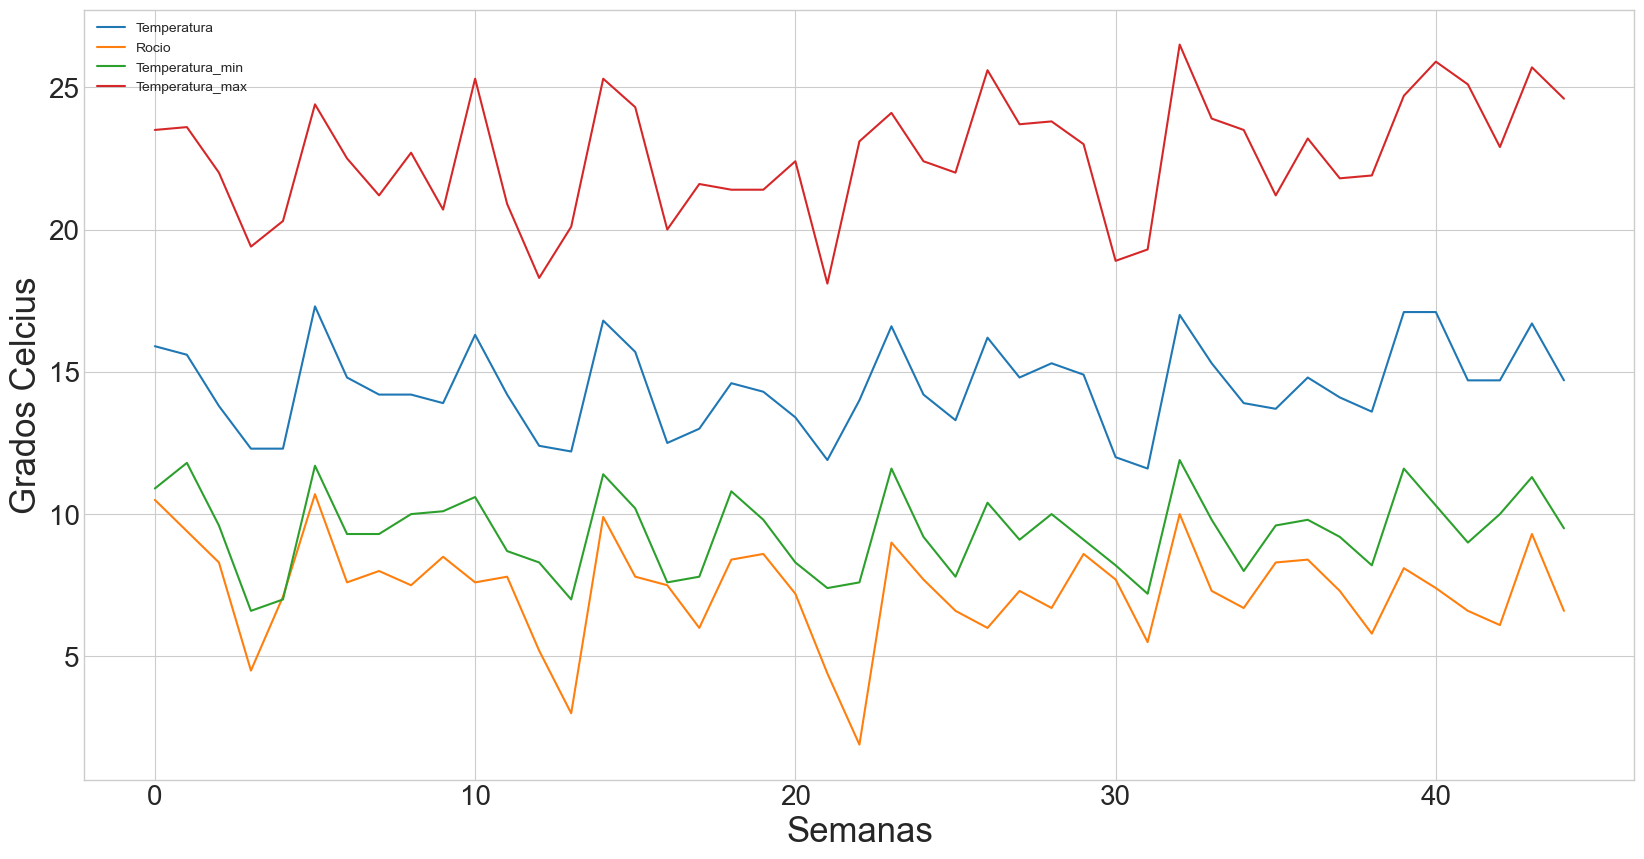

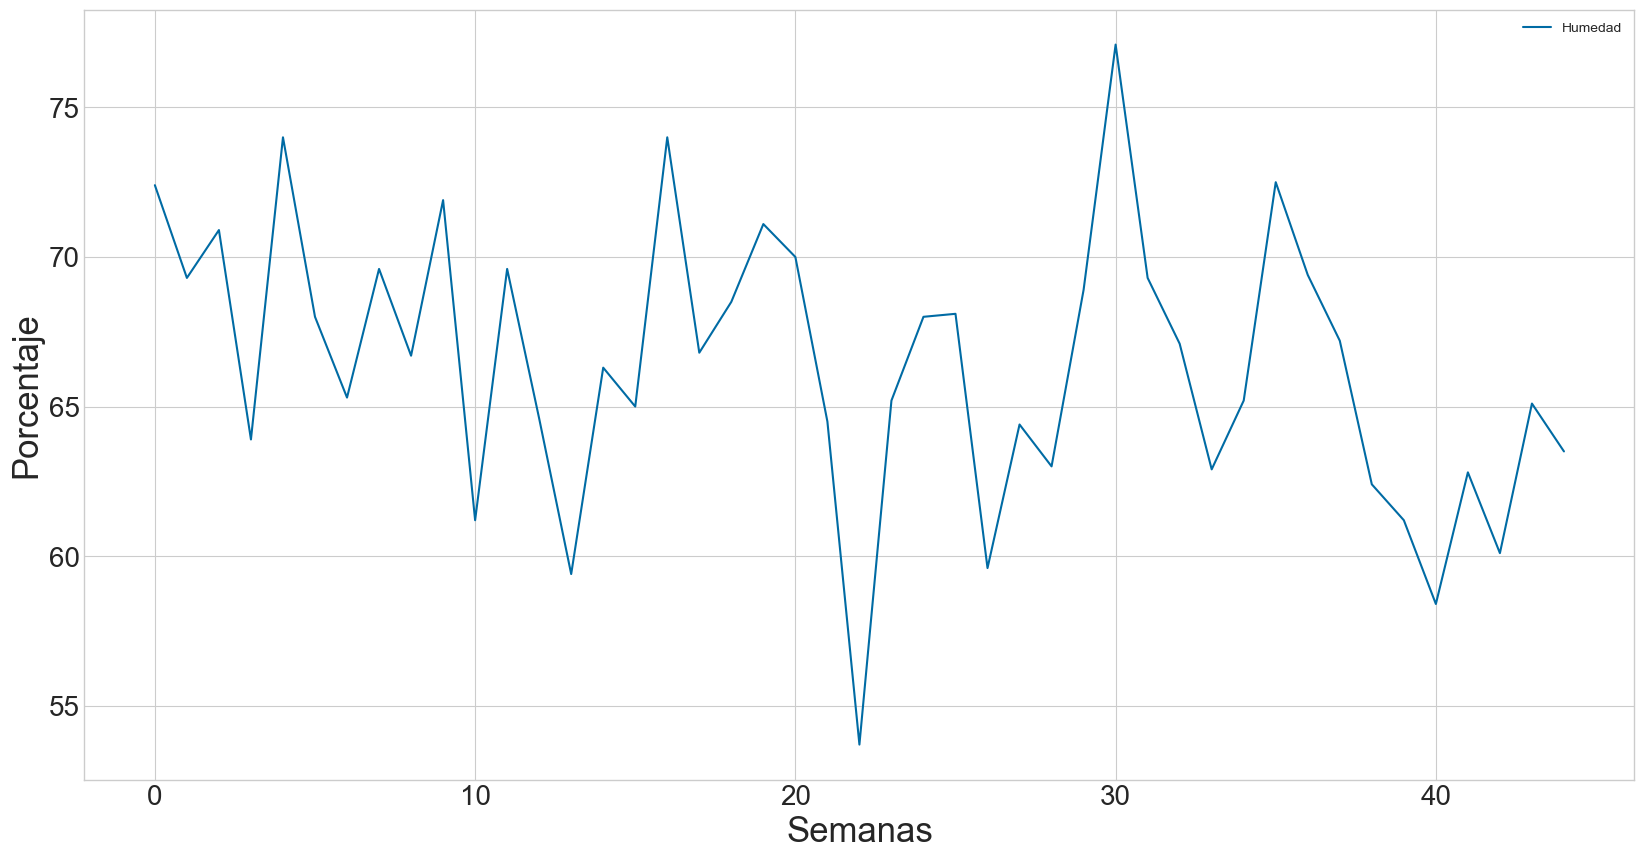

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   2.262987   1.870229  0.793045                  1.268516   
1   0.966229   0.860305  2.984352                  1.382266   
2   0.745780   0.397424  2.045220                  1.059976   
3   0.434558  -0.275859  1.001741                  1.761430   
4   0.123336  -0.275859  1.314785                  1.097892   
5  -0.550978  -0.570420  2.671308                  0.263730   
6  -0.356464  -0.486260  0.897393                  0.529145   
7  -0.460205  -0.360019  2.045220                  0.149981   
8  -0.304594  -0.360019  0.271305                  0.472271   
9   0.408623   0.607824 -0.041739                  1.249558   
10  0.901391  -0.149618  0.480001                  2.538718   
11  0.758748   1.323187  1.419133                  1.211641   
12  0.071466  -0.317939  0.897393                  1.249558   
13 -0.071178  -0.444179  0.271305                 -0.039602   
14 -0.382400  -0.738741  0.166957                 -0.248142   
15 -0.421302   0.313263 -0.250435                 -0.286059   
16 -0.330529  -0.402099 -0.772175                 -0.001685   
17  0.162239  -0.738741 -0.250435                  0.434354   
18  0.706877   0.523664 -0.041739                  0.225814   
19  0.447526   0.229103 -0.354783                  0.301646   
20  0.473461   0.355344 -0.459131                  0.377479   
21  0.162239  -0.065458 -0.146087                  0.510187   
22 -0.265691  -0.233779 -0.354783                  0.187897   
23  0.253012  -0.486260 -0.354783                  0.282688   
24  1.044034   0.860305 -0.563479                  0.567062   
25  3.144782   2.206870 -0.354783                  1.344349   
26  3.572712   4.773760 -0.354783                  1.097892   
27 -0.589881   0.018702 -0.772175                 -1.101262   
28 -0.745492  -0.107538 -0.667827                 -1.120221   
29 -0.525043  -0.275859 -0.772175                 -1.063346   
30 -0.771427  -0.149618 -1.189567                 -1.082304   
31 -0.563946   0.187023 -0.980871                 -1.101262   
32 -0.784395  -0.360019 -0.146087                 -1.120221   
33 -0.538010  -0.107538 -0.876523                 -1.082304   
34 -0.823297   0.271183 -0.667827                 -1.120221   
35 -0.836265  -0.486260 -0.354783                 -1.120221   
36 -0.641751  -0.822901 -0.563479                 -0.892722   
37 -0.719557  -0.822901 -0.667827                 -1.025430   
38 -1.017811  -0.822901 -0.354783                 -1.025430   
39 -0.849232  -0.822901 -0.772175                 -1.006471   
40 -0.719557  -0.822901 -0.772175                 -1.025430   
41 -0.965941  -0.822901 -0.667827                 -1.025430   
42 -1.069681  -0.822901 -1.398263                 -1.006471   
43 -0.512075  -0.822901 -0.146087                 -1.025430   
44 -0.823297  -0.822901 -1.189567                 -1.044388   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       3.533158                 0.826015   
1                       1.854880                 1.069758   
2                       1.608075                -0.880180   
3                       1.706797                 1.922856   
4                       1.311908                 0.582273   
5                       0.571492                -0.514567   
6                       0.077881                -0.392696   
7                       0.818297                 0.094789   
8                       0.176603                 0.094789   
9                       0.472770                 2.410340   
10                      0.966381                 1.557242   
11                      1.262547                -0.514567   
12                      0.522131                 1.313500   
13                      0.423409                 0.216660   
14                     -0.070202                 0.094789   
15                      0.374047                -0.148954   
16                      0.522131                -0.148954   
17     

'     *** DataFrame con todos los componentes principales PCA ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  -0.315400  -0.226627 -0.270198                 -0.385928   
PC2  -0.117575  -0.117025 -0.132676                 -0.038502   
PC3   0.300739   0.333420 -0.335919                  0.060532   
PC4   0.242489   0.362900 -0.108915                  0.051903   
PC5  -0.265410  -0.338287  0.184788                  0.101377   
PC6  -0.039797   0.000403  0.407588                  0.121073   
PC7  -0.158427  -0.384567 -0.144419                  0.150863   
PC8  -0.051047   0.087718 -0.255140                 -0.094917   
PC9   0.026429  -0.385342 -0.269193                  0.273047   
PC10 -0.081525   0.103406  0.260937                 -0.180715   
PC11  0.099106  -0.092728 -0.536247                  0.224757   
PC12  0.334682  -0.179656  0.225054                  0.609556   
PC13 -0.680401   0.427482 -0.082181                  0.494142   
PC14 -0.018526   0.061796  0.106338                 -0.058333   
PC15 -0.168319   0.134921 -0.023590                  0.094623   
PC16  0.130096  -0.131287  0.032826                 -0.026354   

      Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      -0.354063                -0.309804   
PC2                      -0.066855                -0.075382   
PC3                      -0.116636                 0.220171   
PC4                       0.098773                 0.072282   
PC5                       0.049333                -0.086884   
PC6                       0.224531                -0.011732   
PC7                      -0.231744                 0.680995   
PC8                      -0.253342                 0.334900   
PC9                       0.558203                 0.154464   
PC10                      0.216337                 0.301316   
PC11                      0.218561                -0.328568   
PC12                     -0.514309                -0.156255   
PC13                     -0.017448                -0.020531   
PC14                     -0.064733                 0.114527   
PC15                     -0.029559                -0.018646   
PC16                     -0.005507                 0.011492   

      CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     -0.352729              0.310325              0.311582   
PC2                     -0.023161              0.016083              0.011965   
PC3                     -0.058775             -0.027642             -0.017429   
PC4                     -0.086271              0.194773              0.176231   
PC5                      0.129441             -0.304250             -0.277898   
PC6                      0.328800              0.498342              0.517179   
PC7                      0.224129              0.108545              0.138455   
PC8                      0.095789              0.013135              0.005051   
PC9                     -0.400611              0.040977              0.080088   
PC10                    -0.589203             -0.050258              0.060911   
PC11                     0.193401              0.041314              0.068310   
PC12                    -0.333447              0.025497              0.079340   
PC13                    -0.105469              0.187084             -0.177155   
PC14                    -0.106175              0.059234             -0.102967   
PC15                     0.011698             -0.673379              0.661955   
PC16                    -0.033167              0.115590             -0.079120   

       Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  -0.103535  0.011043     0.092946         0.060149         0.144812   
PC2   0.035394 -0.421064    -0.520020        -0.523013        -0.453154   
PC3  -0.566077 -0.431226     0.077324        -0.072872         0.208703   
PC4   0.351652  0.138635    -0.179608        -0.027259        -0.152920   
PC5  -0.295435 -0.171480     0.032718         0.042213         0.019264   


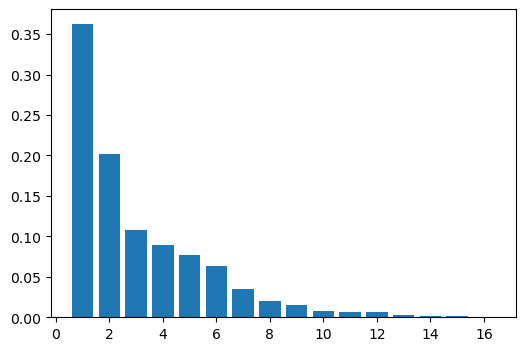

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.36261046 0.56443734 0.67220309 0.76204095 0.83917847 0.90269725
 0.93732206 0.95692445 0.97253831 0.9800498  0.9871771  0.99369312
 0.99639625 0.99831936 0.99951357 1.        ]


'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1 -0.315400  -0.226627 -0.270198                 -0.385928   
PC2 -0.117575  -0.117025 -0.132676                 -0.038502   
PC3  0.300739   0.333420 -0.335919                  0.060532   
PC4  0.242489   0.362900 -0.108915                  0.051903   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                     -0.354063                -0.309804   
PC2                     -0.066855                -0.075382   
PC3                     -0.116636                 0.220171   
PC4                      0.098773                 0.072282   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                    -0.352729              0.310325              0.311582   
PC2                    -0.023161              0.016083              0.011965   
PC3                    -0.058775             -0.027642             -0.017429   
PC4                    -0.086271              0.194773              0.176231   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1 -0.103535  0.011043     0.092946         0.060149         0.144812   
PC2  0.035394 -0.421064    -0.520020        -0.523013        -0.453154   
PC3 -0.566077 -0.431226     0.077324        -0.072872         0.208703   
PC4  0.351652  0.138635    -0.179608        -0.027259        -0.152920   

         MP10     MP2.5  
PC1 -0.081246 -0.193403  
PC2  0.018988  0.118682  
PC3  0.075886 -0.219718  
PC4 -0.516109 -0.487744

In [43]:
algoritmo_dataframe(diccionario['jul_agoDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Septiembre - Octubre (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        103.288889
Influenza                         7.977778
Neumonia                         10.133333
Bronquitis_bronquiolitis         45.933333
Crisis_obstructiva_bronquial     23.133333
Otra_causa_respiratoria          13.600000
CAUSAS_SISTEMA_RESPIRATORIO      11.066667
COVID19_Confirmado_u              2.355556
COVID19_Confirmado_h              1.200000
Humedad                          66.411111
Rocio                             8.622222
Temperatura                      15.677778
Temperatura_min                  10.555556
Temperatura_max                  24.251111
MP10                             36.375556
MP2.5                            12.491111
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        4074.710101
Influenza                        161.840404
Neumonia                          35.981818
Bronquitis_bronqui

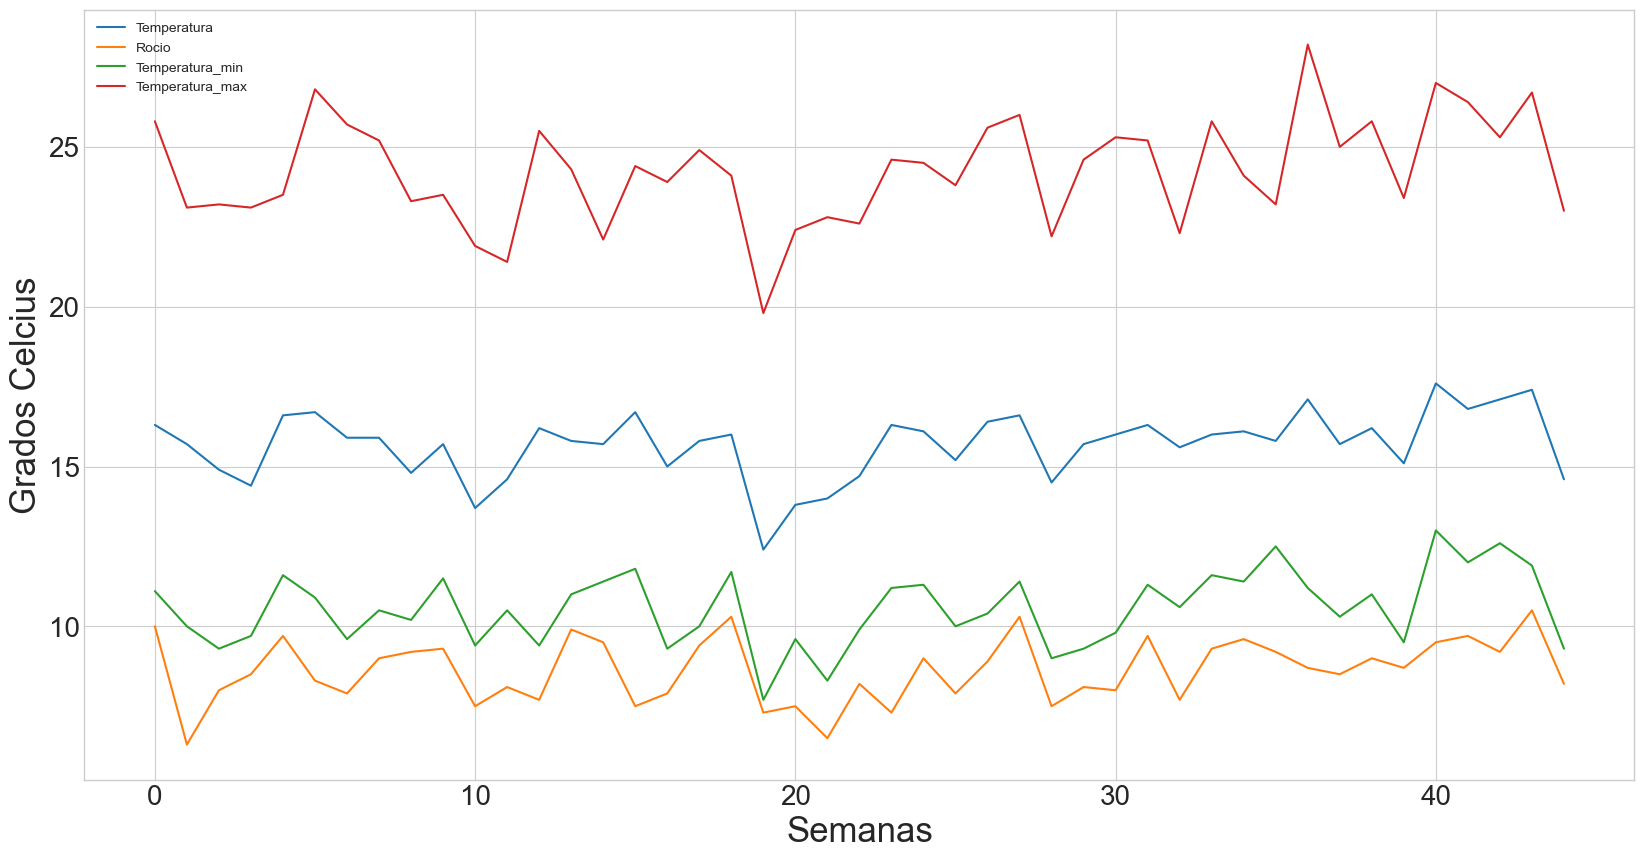

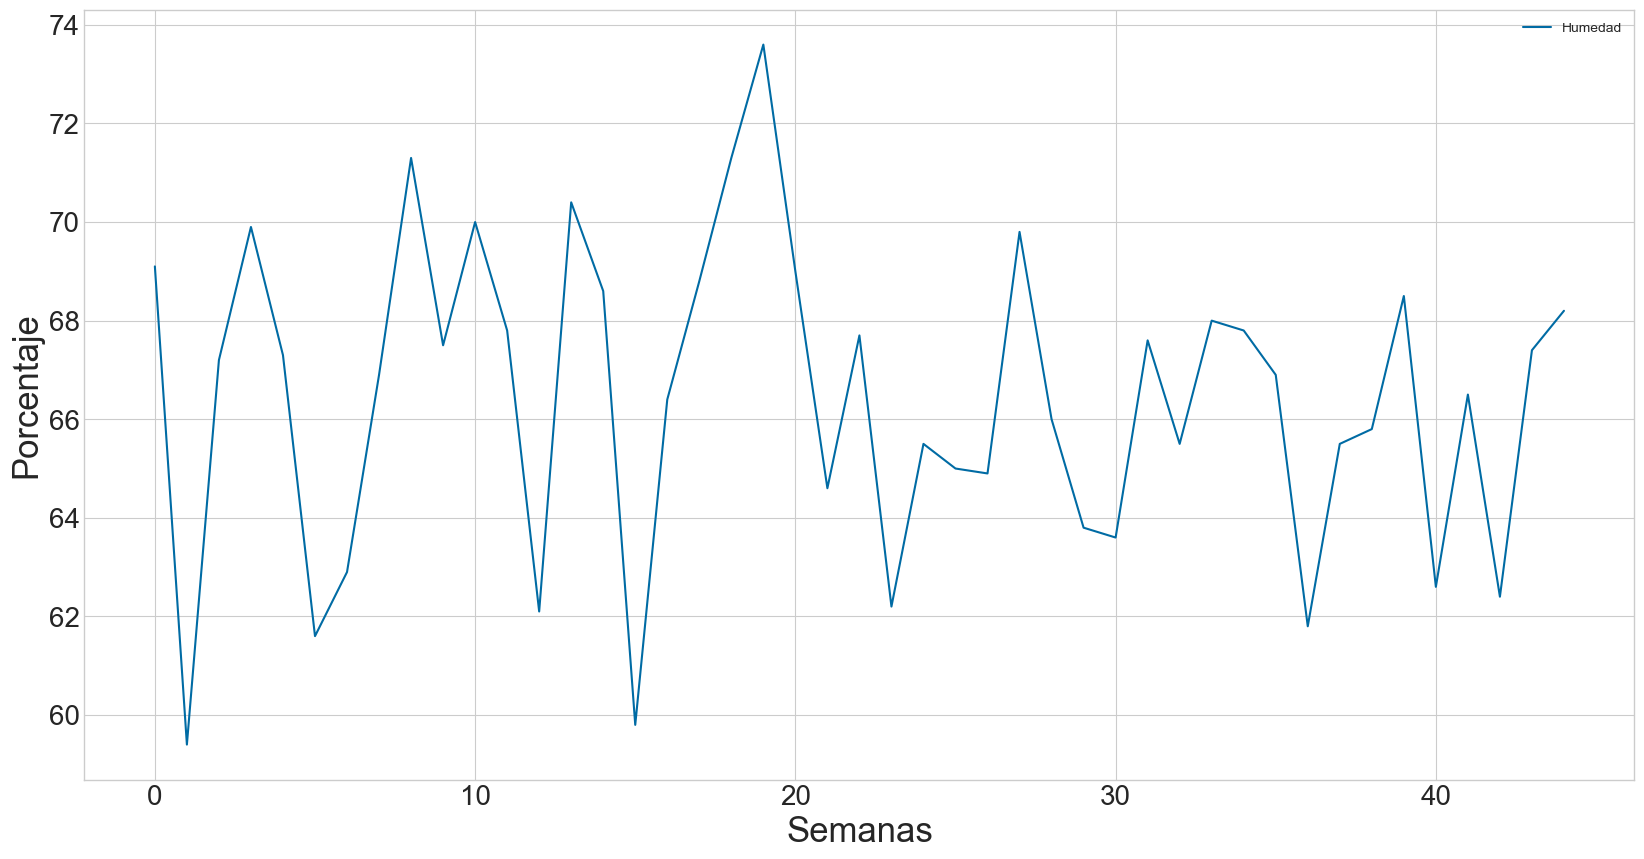

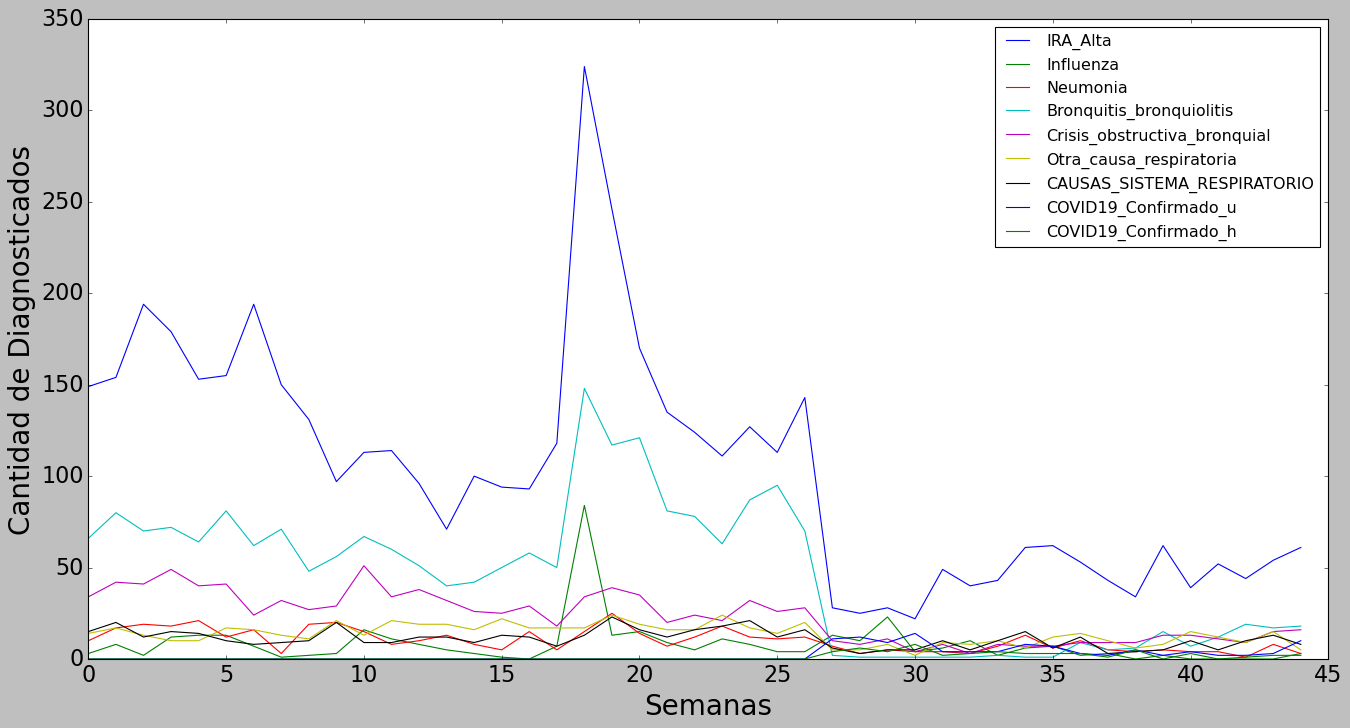

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   0.724191  -0.395705 -0.022479                  0.535511   
1   0.803405   0.001767  1.157669                  0.909123   
2   1.437117  -0.475200  1.494854                  0.642257   
3   1.199475   0.319744  1.326261                  0.695630   
4   0.787563   0.399238  1.832039                  0.482138   
5   0.819248   0.399238  0.314706                  0.935810   
6   1.437117  -0.077728  0.989076                  0.428765   
7   0.740034  -0.554694 -1.202627                  0.668944   
8   0.439021  -0.475200  1.494854                  0.055152   
9  -0.099634  -0.395705  1.663446                  0.268645   
10  0.153851   0.637722  0.820484                  0.562197   
11  0.169694   0.240250 -0.359664                  0.375391   
12 -0.115476   0.001767 -0.022479                  0.135212   
13 -0.511546  -0.236717  0.483299                 -0.158340   
14 -0.052105  -0.395705 -0.359664                 -0.104967   
15 -0.147162  -0.554694 -0.865442                  0.108525   
16 -0.163005  -0.634189  0.820484                  0.322018   
17  0.233065  -0.077728 -0.865442                  0.108525   
18  3.496679   6.043340  0.820484                  2.723811   
19  2.260942   0.399238  2.506409                  1.896527   
20  1.056890   0.558227  0.651891                  2.003273   
21  0.502392   0.081261 -0.528257                  0.935810   
22  0.328122  -0.236717  0.314706                  0.855750   
23  0.122165   0.240250  1.326261                  0.455451   
24  0.375650   0.001767  0.314706                  1.095929   
25  0.153851  -0.316211  0.146114                  1.309422   
26  0.629135  -0.316211  0.314706                  0.642257   
27 -1.192786   0.399238 -0.528257                 -1.172431   
28 -1.240314   0.160755 -1.202627                 -1.199117   
29 -1.192786   1.194182 -0.865442                 -1.199117   
30 -1.287842  -0.316211 -1.034034                 -1.199117   
31 -0.860087  -0.157222 -1.034034                 -1.199117   
32 -1.002672   0.160755 -1.202627                 -1.199117   
33 -0.955144  -0.475200 -0.528257                 -1.172431   
34 -0.669974  -0.157222  0.483299                 -1.199117   
35 -0.654131  -0.077728 -0.696849                 -1.199117   
36 -0.796716  -0.475200 -0.022479                 -0.985625   
37 -0.955144  -0.395705 -0.865442                 -1.092371   
38 -1.097729  -0.634189 -1.034034                 -1.065684   
39 -0.654131  -0.475200 -0.865442                 -0.825505   
40 -1.018515  -0.634189 -1.034034                 -1.038998   
41 -0.812559  -0.634189 -1.034034                 -0.905565   
42 -0.939301  -0.634189 -1.539812                 -0.718759   
43 -0.780873  -0.634189 -0.359664                 -0.772132   
44 -0.669974  -0.395705 -1.202627                 -0.745445   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       0.832609                 0.074570   
1                       1.445572                 0.633846   
2                       1.368951                -0.111855   
3                       1.981915                -0.671131   
4                       1.292331                -0.671131   
5                       1.368951                 0.633846   
6                       0.066404                 0.447421   
7                       0.679368                -0.111855   
8                       0.296266                -0.484706   
9                       0.449506                 1.379547   
10                      2.135156                -0.111855   
11                      0.832609                 1.379547   
12                      1.139090                 1.006697   
13                      0.679368                 1.006697   
14                      0.219645                 0.447421   
15                      0.143025                 1.565973   
16                      0.449506                 0.633846   
17     

'     *** DataFrame con todos los componentes principales PCA ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1   0.339880   0.131090  0.297410                  0.359078   
PC2  -0.020075   0.008787  0.030037                 -0.011328   
PC3   0.185540   0.424721  0.098903                  0.054816   
PC4   0.079858   0.243675 -0.151420                  0.002180   
PC5   0.233934   0.620824  0.076892                  0.218789   
PC6   0.029986   0.296313 -0.565157                  0.111137   
PC7  -0.257609   0.077420 -0.027620                 -0.145103   
PC8   0.067500   0.058829  0.074686                 -0.034623   
PC9   0.092818  -0.224538 -0.651352                  0.396435   
PC10 -0.404445   0.142320  0.131280                 -0.044653   
PC11  0.384243  -0.298809  0.227317                  0.135723   
PC12  0.184907  -0.279113  0.104582                  0.290185   
PC13 -0.450910   0.131951  0.100870                  0.251466   
PC14 -0.113935  -0.031080  0.004266                  0.224998   
PC15 -0.376324  -0.044828  0.178812                  0.615562   
PC16 -0.069196  -0.045225 -0.002814                  0.175764   

      Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                       0.344036                 0.288287   
PC2                      -0.040799                -0.195178   
PC3                      -0.003745                -0.192496   
PC4                       0.156080                -0.201389   
PC5                      -0.112824                 0.029881   
PC6                      -0.240176                 0.192355   
PC7                      -0.070576                 0.311795   
PC8                       0.248847                -0.550487   
PC9                       0.240279                -0.240411   
PC10                      0.460552                -0.120726   
PC11                     -0.454982                -0.333052   
PC12                      0.343716                 0.199328   
PC13                     -0.100884                -0.354219   
PC14                      0.144814                 0.090330   
PC15                     -0.290011                 0.079841   
PC16                     -0.089635                 0.002335   

      CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                      0.267291             -0.307555             -0.311106   
PC2                     -0.091207              0.221831              0.154718   
PC3                     -0.037103              0.105008              0.052041   
PC4                     -0.393376              0.108260              0.155113   
PC5                      0.192988              0.261861              0.285069   
PC6                     -0.419962             -0.221376             -0.306706   
PC7                      0.216296              0.182083              0.234987   
PC8                     -0.107847             -0.182549             -0.307602   
PC9                      0.433521              0.194635              0.078459   
PC10                    -0.080180              0.404036             -0.235210   
PC11                    -0.059244              0.139294              0.020750   
PC12                    -0.497001              0.117141              0.354138   
PC13                     0.101633             -0.498504              0.319562   
PC14                    -0.146588             -0.301371              0.367034   
PC15                    -0.123668              0.256688             -0.299054   
PC16                    -0.009384              0.099618             -0.117238   

       Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1   0.093013 -0.122083    -0.191006        -0.143432        -0.185084   
PC2   0.221212 -0.310606    -0.498680        -0.447929        -0.422127   
PC3   0.598402  0.555540    -0.013534         0.203997        -0.054658   
PC4  -0.081291 -0.096628    -0.023177        -0.181708         0.022501   
PC5  -0.384421 -0.243556     0.147693         0.023910         0.140866   


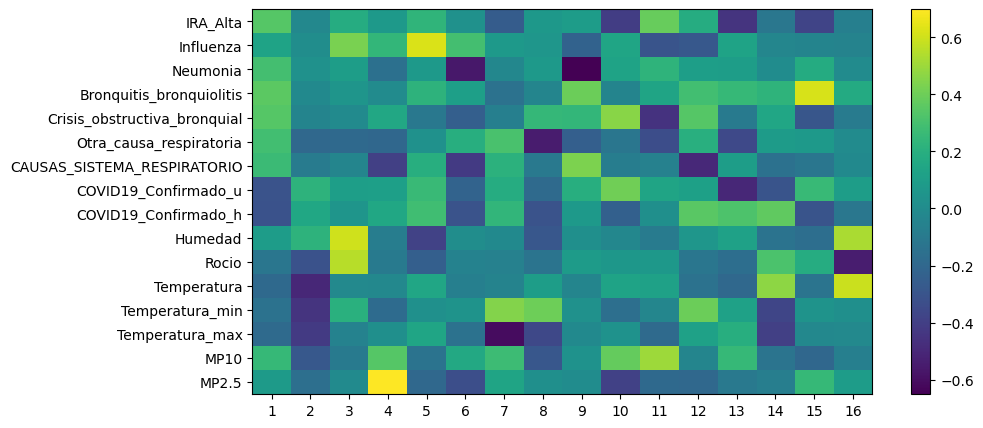

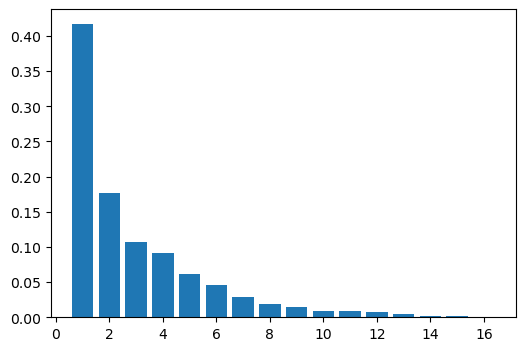

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.41718812 0.59391136 0.70143953 0.79346002 0.85513177 0.90172092
 0.93079351 0.95025046 0.96463321 0.97414445 0.98278728 0.99011523
 0.99510941 0.99753748 0.99934583 1.        ]


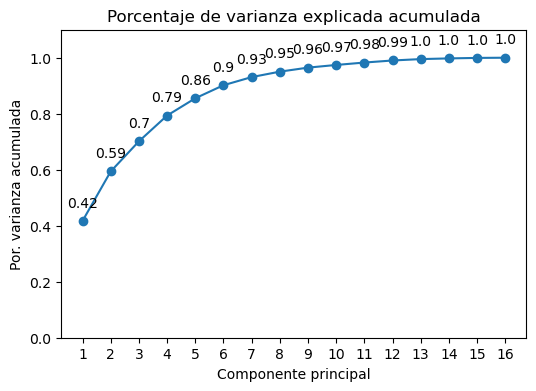

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  0.339880   0.131090  0.297410                  0.359078   
PC2 -0.020075   0.008787  0.030037                 -0.011328   
PC3  0.185540   0.424721  0.098903                  0.054816   
PC4  0.079858   0.243675 -0.151420                  0.002180   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      0.344036                 0.288287   
PC2                     -0.040799                -0.195178   
PC3                     -0.003745                -0.192496   
PC4                      0.156080                -0.201389   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     0.267291             -0.307555             -0.311106   
PC2                    -0.091207              0.221831              0.154718   
PC3                    -0.037103              0.105008              0.052041   
PC4                    -0.393376              0.108260              0.155113   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  0.093013 -0.122083    -0.191006        -0.143432        -0.185084   
PC2  0.221212 -0.310606    -0.498680        -0.447929        -0.422127   
PC3  0.598402  0.555540    -0.013534         0.203997        -0.054658   
PC4 -0.081291 -0.096628    -0.023177        -0.181708         0.022501   

         MP10     MP2.5  
PC1  0.252233  0.084412  
PC2 -0.280524 -0.160148  
PC3 -0.093289 -0.004712  
PC4  0.343795  0.698332

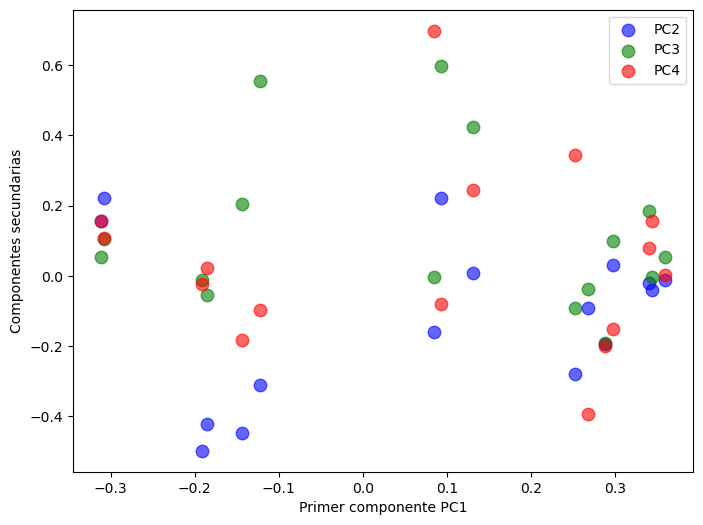

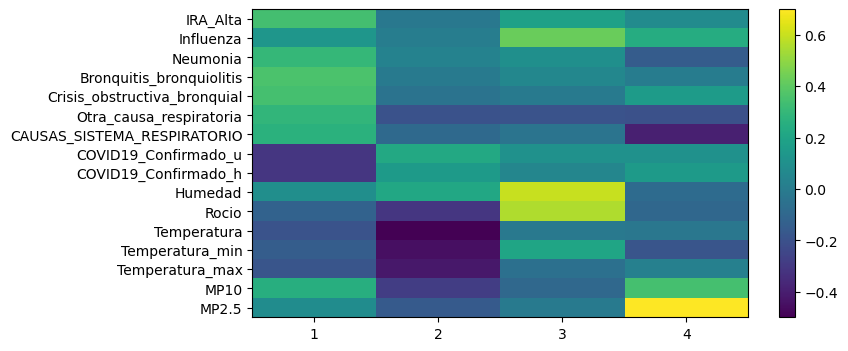

In [44]:
algoritmo_dataframe(diccionario['sep_octDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Noviembre - Diciembre (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        76.111111
Influenza                        2.844444
Neumonia                         6.533333
Bronquitis_bronquiolitis        24.177778
Crisis_obstructiva_bronquial    16.955556
Otra_causa_respiratoria         11.177778
CAUSAS_SISTEMA_RESPIRATORIO      7.711111
COVID19_Confirmado_u             1.555556
COVID19_Confirmado_h             0.933333
Humedad                         65.597778
Rocio                           10.406667
Temperatura                     17.664444
Temperatura_min                 12.657778
Temperatura_max                 25.744444
MP10                            31.604444
MP2.5                            9.057778
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        613.737374
Influenza                         8.907071
Neumonia                         20.981818
Bronquitis_bronquiolitis        234.2

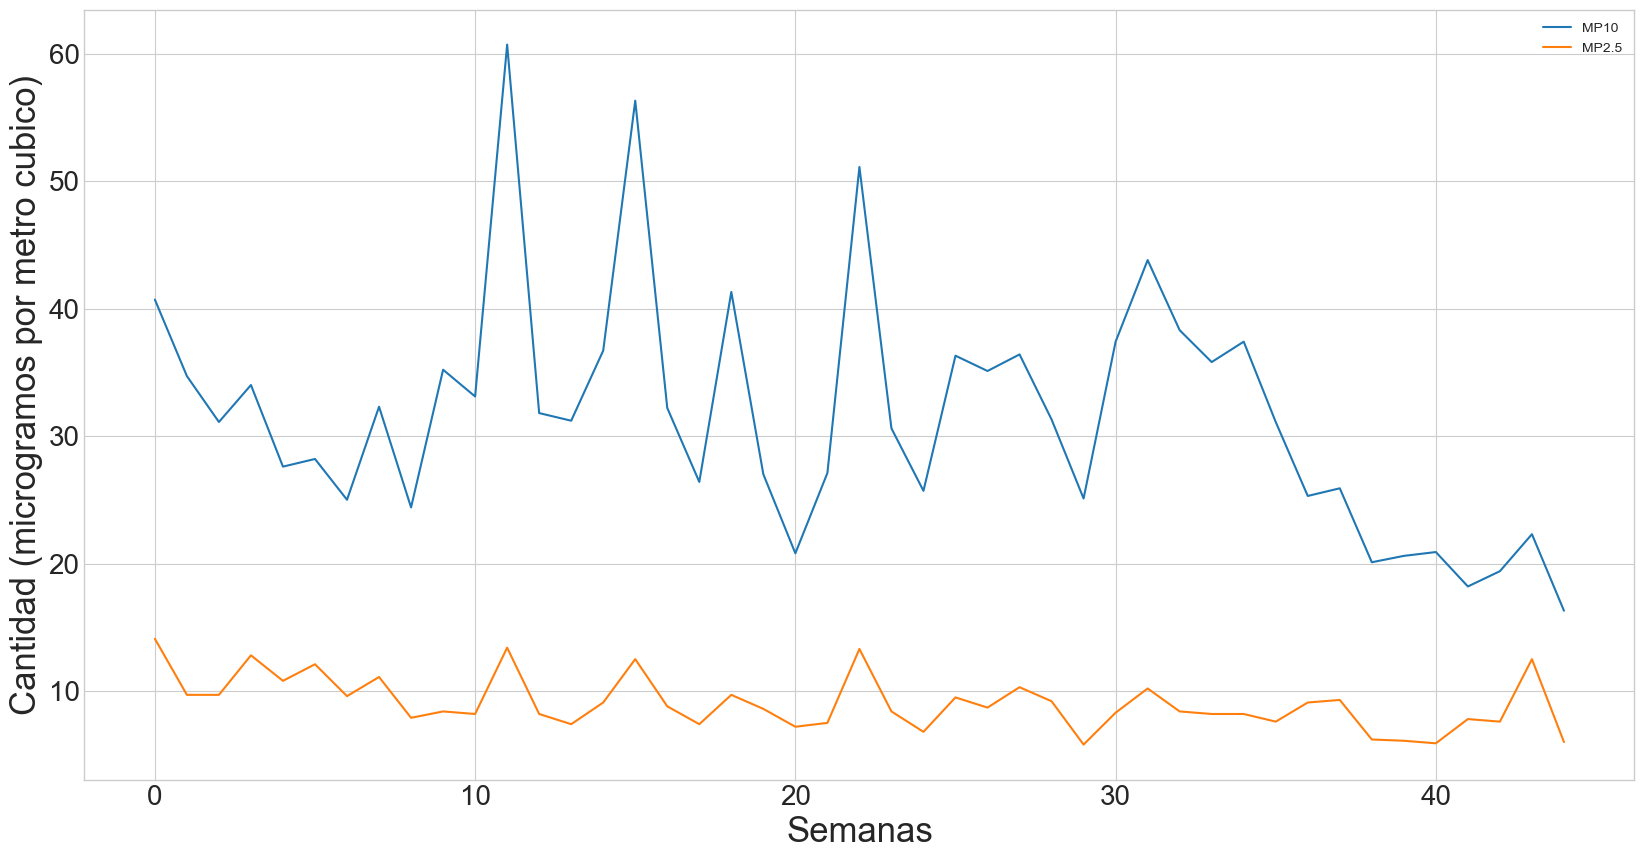

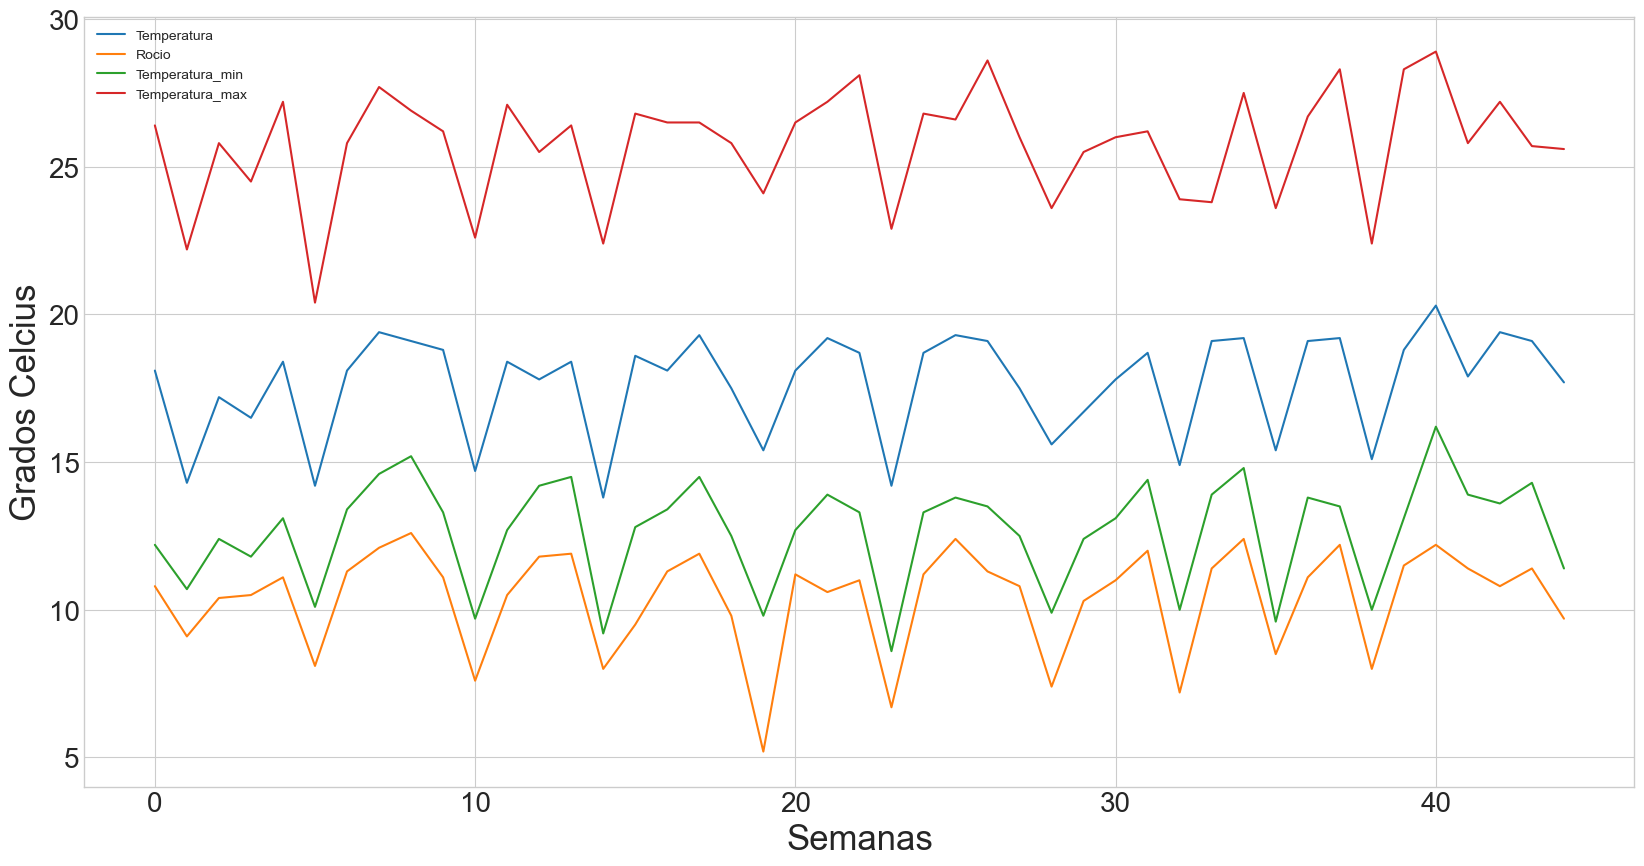

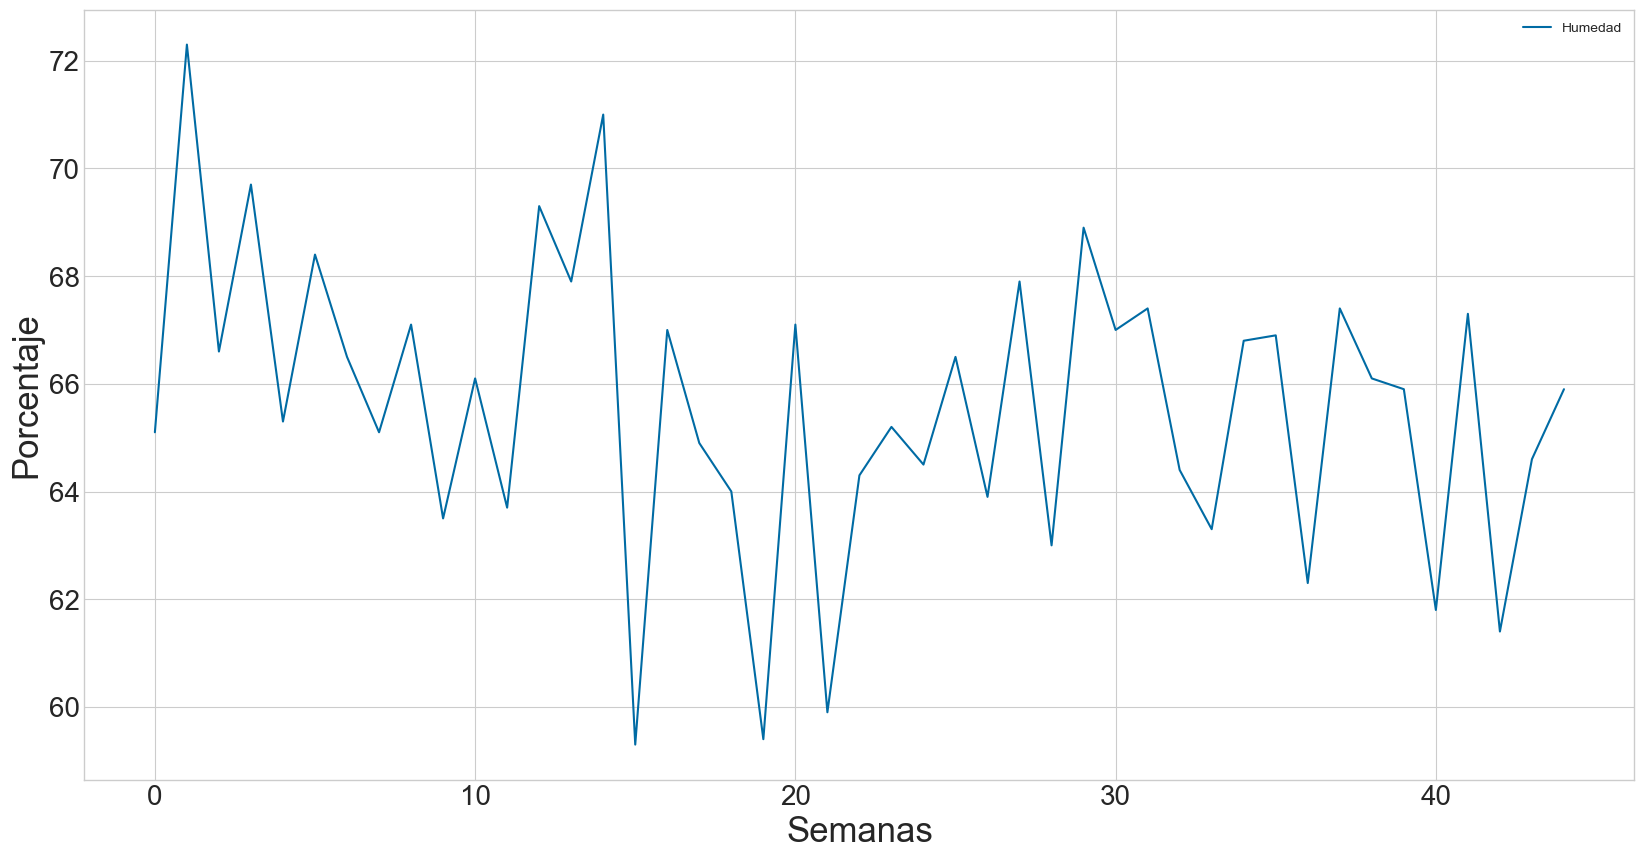

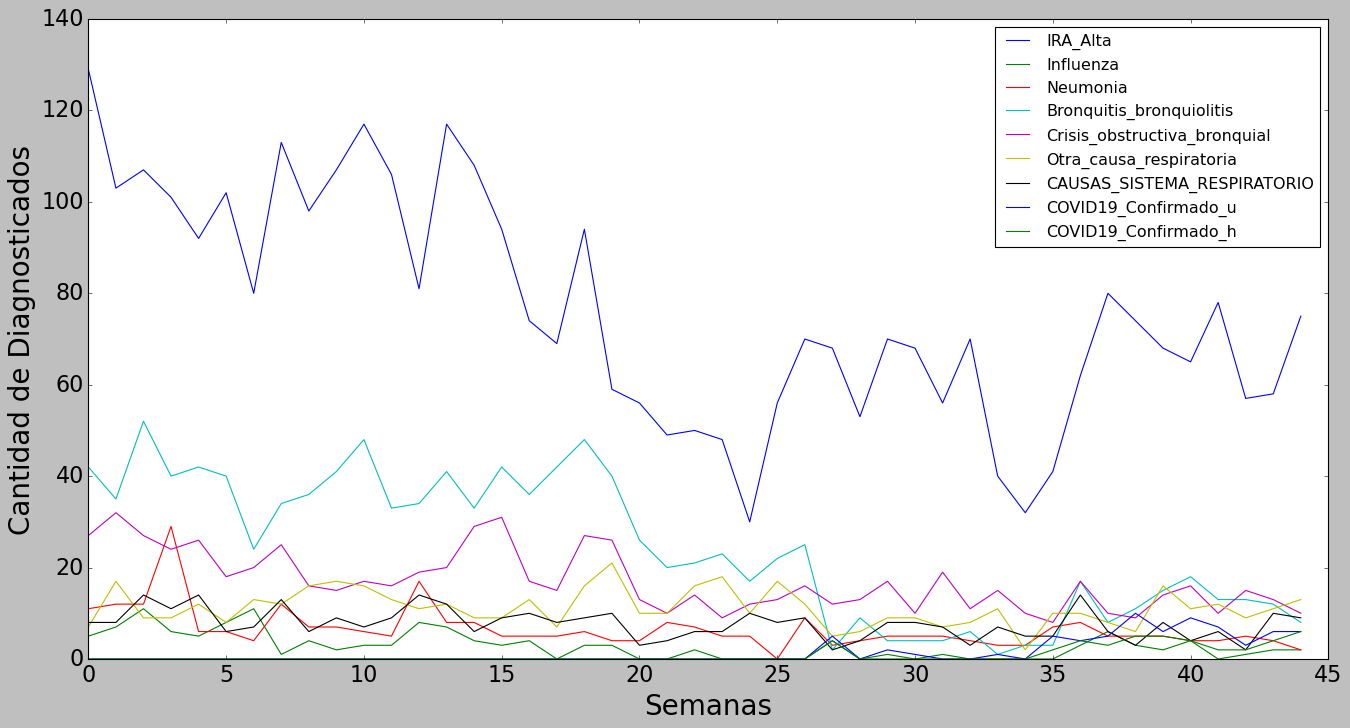

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   2.159002   0.730418  0.986148                  1.177521   
1   1.097644   1.408126  1.206927                  0.715028   
2   1.260930   2.763542  1.206927                  1.838225   
3   1.016001   1.069272  4.960175                  1.045380   
4   0.648608   0.730418 -0.117749                  1.177521   
5   1.056822   1.746980 -0.117749                  1.045380   
6   0.158750   2.763542 -0.559308                 -0.011746   
7   1.505859  -0.624997  1.206927                  0.648958   
8   0.893537   0.391564  0.103030                  0.781099   
9   1.260930  -0.286143  0.103030                  1.111451   
10  1.669145   0.052711 -0.117749                  1.573944   
11  1.220108   0.052711 -0.338528                  0.582888   
12  0.199572   1.746980  2.310823                  0.648958   
13  1.669145   1.408126  0.323810                  1.111451   
14  1.301751   0.391564  0.323810                  0.582888   
15  0.730251   0.052711 -0.338528                  1.177521   
16 -0.086179   0.391564 -0.338528                  0.781099   
17 -0.290286  -0.963851 -0.338528                  1.177521   
18  0.730251   0.052711 -0.117749                  1.573944   
19 -0.698501   0.052711 -0.559308                  1.045380   
20 -0.820965  -0.963851 -0.559308                  0.120395   
21 -1.106715  -0.963851  0.323810                 -0.276027   
22 -1.065894  -0.286143  0.103030                 -0.209957   
23 -1.147537  -0.963851 -0.338528                 -0.077816   
24 -1.882323  -0.963851 -0.338528                 -0.474239   
25 -0.820965  -0.963851 -1.442425                 -0.143887   
26 -0.249465  -0.963851  0.544589                  0.054325   
27 -0.331107   0.391564 -0.780087                 -1.465294   
28 -0.943430  -0.963851 -0.559308                 -1.002802   
29 -0.249465  -0.963851 -0.338528                 -1.333154   
30 -0.331107  -0.963851 -0.338528                 -1.333154   
31 -0.820965  -0.624997 -0.338528                 -1.333154   
32 -0.249465  -0.963851 -0.559308                 -1.201013   
33 -1.474109  -0.963851 -0.780087                 -1.531365   
34 -1.800680  -0.963851 -0.780087                 -1.399224   
35 -1.433287  -0.963851  0.103030                 -1.399224   
36 -0.576036   0.052711  0.323810                 -0.474239   
37  0.158750   1.069272 -0.338528                 -1.068872   
38 -0.086179   0.052711 -0.338528                 -0.870661   
39 -0.331107  -0.286143 -0.338528                 -0.606379   
40 -0.453572   0.391564 -0.559308                 -0.408168   
41  0.077107  -0.963851 -0.559308                 -0.738520   
42 -0.780144  -0.624997 -0.338528                 -0.738520   
43 -0.739322  -0.286143 -0.559308                 -0.804591   
44 -0.045357  -0.286143 -1.000866                 -1.068872   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       1.563219                -1.077439   
1                       2.341369                 1.501537   
2                       1.563219                -0.561644   
3                       1.096328                -0.561644   
4                       1.407588                 0.212049   
5                       0.162547                -0.819541   
6                       0.473807                 0.469947   
7                       1.251958                 0.212049   
8                      -0.148713                 1.243640   
9                      -0.304343                 1.501537   
10                      0.006917                 1.243640   
11                     -0.148713                 0.469947   
12                      0.318177                -0.045848   
13                      0.473807                 0.212049   
14                      1.874479                -0.561644   
15                      2.185739                -0.561644   
16                      0.006917                 0.469947   
17     

'     *** DataFrame con todos los componentes principales PCA ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1   0.334732   0.266647  0.266637                  0.370514   
PC2  -0.076887  -0.074130 -0.094697                 -0.125764   
PC3   0.257652   0.401082  0.229590                  0.052848   
PC4   0.018888  -0.050870 -0.202243                  0.292609   
PC5   0.173052   0.119873 -0.106567                 -0.015363   
PC6  -0.344278  -0.236327  0.648040                 -0.107208   
PC7  -0.109331  -0.165305  0.064106                 -0.269617   
PC8   0.385397  -0.381312  0.523449                  0.213037   
PC9  -0.401487   0.567764  0.234709                 -0.000258   
PC10 -0.294802   0.034963  0.165986                 -0.265275   
PC11 -0.041012  -0.423121 -0.113672                  0.036056   
PC12  0.034626   0.028145  0.110369                 -0.013051   
PC13 -0.504492  -0.097625 -0.062361                  0.740140   
PC14  0.027452   0.015810 -0.070403                 -0.077908   
PC15 -0.006598   0.060607  0.002861                 -0.049552   
PC16  0.007202   0.012201  0.017514                  0.022522   

      Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                       0.366844                 0.119596   
PC2                      -0.114880                -0.006594   
PC3                       0.069121                -0.046477   
PC4                       0.090974                 0.655402   
PC5                       0.148035                -0.146661   
PC6                       0.003352                -0.210497   
PC7                      -0.216914                 0.574760   
PC8                      -0.193381                 0.175328   
PC9                      -0.257214                 0.263587   
PC10                      0.739713                 0.176570   
PC11                      0.330106                 0.052136   
PC12                     -0.050295                 0.079466   
PC13                     -0.013692                -0.129039   
PC14                     -0.035491                -0.013996   
PC15                      0.078356                 0.017881   
PC16                     -0.019526                -0.013368   

      CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                      0.223389             -0.295586             -0.279273   
PC2                     -0.255150              0.094994              0.074223   
PC3                      0.163164              0.397972              0.410559   
PC4                      0.223809              0.055607              0.098682   
PC5                     -0.082211              0.383607              0.419515   
PC6                      0.458150              0.007906              0.060878   
PC7                      0.273337              0.122383              0.189614   
PC8                     -0.514480              0.124953             -0.008724   
PC9                     -0.357915             -0.080424             -0.114154   
PC10                    -0.308640              0.095404              0.035747   
PC11                    -0.099533              0.031992             -0.040341   
PC12                     0.013414              0.286810             -0.134379   
PC13                    -0.033370              0.244916              0.103379   
PC14                     0.131173              0.586846             -0.632394   
PC15                     0.015684              0.238791             -0.268256   
PC16                    -0.014354              0.063849             -0.076863   

       Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1   0.122137 -0.140009    -0.201228        -0.158345        -0.174317   
PC2   0.094055 -0.452567    -0.466178        -0.470812        -0.439234   
PC3   0.351696  0.127216    -0.044947         0.049348        -0.054767   
PC4  -0.426088 -0.198969     0.044677        -0.042684         0.076273   
PC5  -0.432573 -0.181992     0.051274        -0.100087         0.081943   


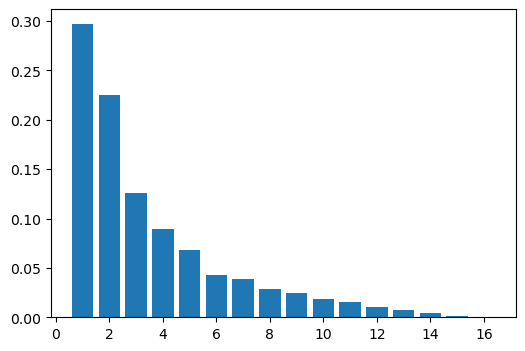

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29703006 0.5219343  0.64821471 0.73719323 0.80483375 0.84769546
 0.8868901  0.91555887 0.94050652 0.95950481 0.97537766 0.98622721
 0.99379709 0.99802263 0.99975426 1.        ]


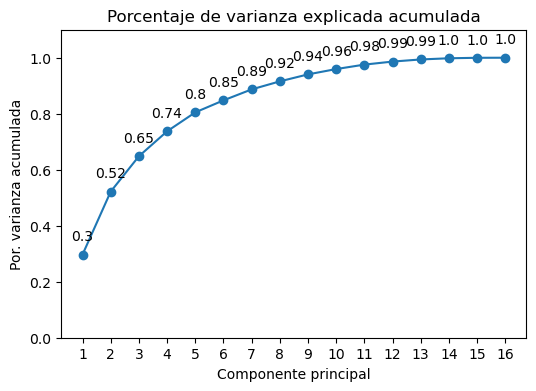

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  0.334732   0.266647  0.266637                  0.370514   
PC2 -0.076887  -0.074130 -0.094697                 -0.125764   
PC3  0.257652   0.401082  0.229590                  0.052848   
PC4  0.018888  -0.050870 -0.202243                  0.292609   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      0.366844                 0.119596   
PC2                     -0.114880                -0.006594   
PC3                      0.069121                -0.046477   
PC4                      0.090974                 0.655402   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     0.223389             -0.295586             -0.279273   
PC2                    -0.255150              0.094994              0.074223   
PC3                     0.163164              0.397972              0.410559   
PC4                     0.223809              0.055607              0.098682   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  0.122137 -0.140009    -0.201228        -0.158345        -0.174317   
PC2  0.094055 -0.452567    -0.466178        -0.470812        -0.439234   
PC3  0.351696  0.127216    -0.044947         0.049348        -0.054767   
PC4 -0.426088 -0.198969     0.044677        -0.042684         0.076273   

         MP10     MP2.5  
PC1  0.211195  0.263168  
PC2 -0.094510 -0.128166  
PC3 -0.426201 -0.166637  
PC4 -0.258609 -0.268570

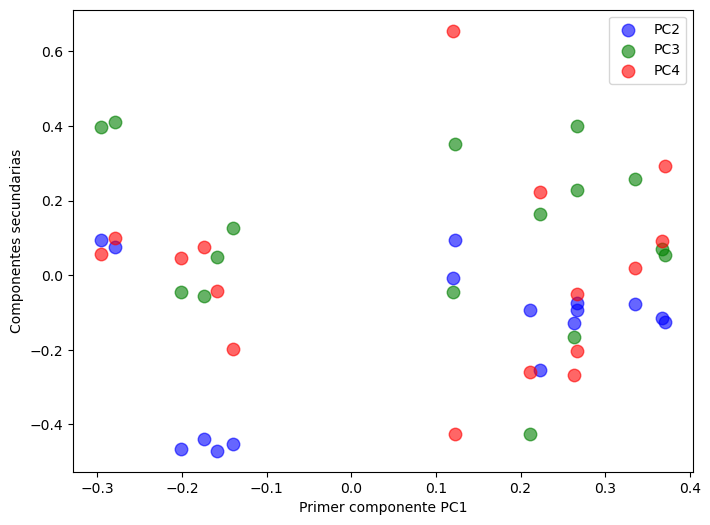

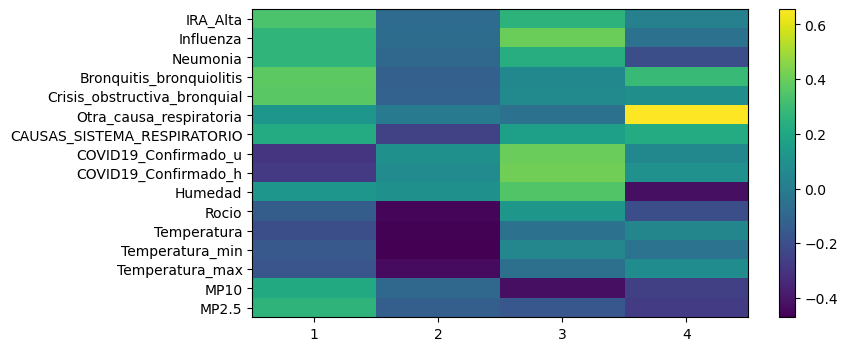

In [45]:
algoritmo_dataframe(diccionario['nov_dicDFtotaltodos'])

### Dentro de este pequeño for esta el describe de cada una de los 36 dataframes (cada periodo y categoria)

In [5]:
#print(list(map(lambda x:diccionario[x].describe(), diccionario)))
for i in diccionario:
    #print('     Periodo y categoria: '+i)
    display(diccionario[i].describe())
#dataframefinal.describe() 
#Count = cantidad de datos
#Mean = promedio 
#std = desviación estandar
#min = mínimo
#max = máximo

     Periodo y categoria: ene_febDFtotaltodos


IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
count   40.000000  40.000000  40.00000                  40.00000   
mean    63.875000   1.850000   6.60000                  13.92500   
std     19.682333   2.154899   2.93345                   7.57319   
min     34.000000   0.000000   1.00000                   1.00000   
25%     53.000000   0.000000   4.00000                   9.00000   
50%     59.000000   1.000000   7.00000                  13.50000   
75%     71.250000   3.000000   8.00000                  19.50000   
max    119.000000   9.000000  13.00000                  30.00000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                      13.100000                 9.500000   
std                        5.285685                 3.658499   
min                        4.000000                 2.000000   
25%                        9.750000                 7.750000   
50%                       13.000000                 9.000000   
75%                       16.000000                11.250000   
max                       25.000000                19.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      7.400000              3.600000   
std                       3.053371              7.631917   
min                       3.000000              0.000000   
25%                       5.000000              0.000000   
50%                       6.500000              0.000000   
75%                      10.250000              0.000000   
max                      13.000000             29.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               2.100000  65.595000  11.415000    18.672500   
std                4.539287   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max               18.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFmenores


IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.00000                 40.000000   
mean    8.950000   0.125000   0.15000                  4.500000   
std     4.755294   0.515777   0.36162                  3.250247   
min     1.000000   0.000000   0.00000                  0.000000   
25%     5.750000   0.000000   0.00000                  2.000000   
50%     8.000000   0.000000   0.00000                  4.500000   
75%    13.000000   0.000000   0.00000                  7.000000   
max    18.000000   3.000000   1.00000                 11.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.050000                 0.625000   
std                        0.220721                 0.867874   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      0.250000              0.025000   
std                       0.543021              0.158114   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       0.000000              0.000000   
max                       2.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.025000  65.595000  11.415000    18.672500   
std                0.158114   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max                1.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean   18.725000   0.350000   0.475000                  5.950000   
std     9.969151   0.769615   0.750641                  3.630003   
min     4.000000   0.000000   0.000000                  0.000000   
25%    12.000000   0.000000   0.000000                  3.000000   
50%    18.000000   0.000000   0.000000                  6.000000   
75%    23.000000   0.000000   1.000000                  8.250000   
max    46.000000   3.000000   3.000000                 13.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.125000                 0.500000   
std                        0.334932                 0.905822   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000                  40.0   
mean                      0.250000                   0.0   
std                       0.630425                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       0.000000                   0.0   
max                       3.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  40.0  40.000000  40.000000    40.000000   
mean                    0.0  65.595000  11.415000    18.672500   
std                     0.0   3.015511   2.522976     2.407466   
min                     0.0  58.100000   5.800000    14.000000   
25%                     0.0  63.825000  10.475000    17.125000   
50%                     0.0  65.750000  11.950000    18.950000   
75%                     0.0  67.500000  13.000000    20.025000   
max                     0.0  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde5a14


IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.00000                 40.000000   
mean   15.650000   0.700000   0.15000                  3.175000   
std     8.125774   0.939176   0.36162                  2.406055   
min     2.000000   0.000000   0.00000                  0.000000   
25%     9.000000   0.000000   0.00000                  1.000000   
50%    15.000000   0.000000   0.00000                  2.500000   
75%    21.000000   2.000000   0.00000                  5.000000   
max    33.000000   3.000000   1.00000                  8.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.575000                 0.800000   
std                        0.594311                 1.362501   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        1.000000                 0.000000   
75%                        1.000000                 1.000000   
max                        2.000000                 6.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000                  40.0   
mean                      0.200000                   0.0   
std                       0.516398                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       0.000000                   0.0   
max                       2.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  40.0  40.000000  40.000000    40.000000   
mean                    0.0  65.595000  11.415000    18.672500   
std                     0.0   3.015511   2.522976     2.407466   
min                     0.0  58.100000   5.800000    14.000000   
25%                     0.0  63.825000  10.475000    17.125000   
50%                     0.0  65.750000  11.950000    18.950000   
75%                     0.0  67.500000  13.000000    20.025000   
max                     0.0  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean   19.025000   0.600000   2.950000                  0.250000   
std     8.939935   1.007663   2.194983                  0.630425   
min     8.000000   0.000000   0.000000                  0.000000   
25%    13.000000   0.000000   1.000000                  0.000000   
50%    16.000000   0.000000   3.000000                  0.000000   
75%    24.000000   1.000000   5.000000                  0.000000   
max    43.000000   4.000000   7.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       7.050000                 4.075000   
std                        3.396454                 1.831176   
min                        1.000000                 0.000000   
25%                        4.750000                 3.000000   
50%                        7.000000                 4.000000   
75%                        9.000000                 5.000000   
max                       18.000000                 8.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      3.150000              2.350000   
std                       2.032429              4.959063   
min                       0.000000              0.000000   
25%                       1.750000              0.000000   
50%                       3.000000              0.000000   
75%                       5.000000              0.000000   
max                       8.000000             18.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               1.250000  65.595000  11.415000    18.672500   
std                2.686624   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max               10.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean    1.525000   0.075000   2.875000                  0.050000   
std     1.601081   0.266747   1.588218                  0.220721   
min     0.000000   0.000000   0.000000                  0.000000   
25%     0.000000   0.000000   2.000000                  0.000000   
50%     1.000000   0.000000   3.000000                  0.000000   
75%     2.000000   0.000000   4.000000                  0.000000   
max     7.000000   1.000000   7.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                     40.0   
mean                       5.300000                      3.5   
std                        2.936944                      2.0   
min                        1.000000                      0.0   
25%                        3.000000                      2.0   
50%                        5.000000                      3.0   
75%                        7.000000                      4.0   
max                       12.000000                      9.0   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      3.550000              1.225000   
std                       1.866712              2.731464   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       4.250000              0.000000   
max                       8.000000             11.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.825000  65.595000  11.415000    18.672500   
std                1.920036   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max                8.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: mar_abrDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    93.155556   3.111111   6.622222                 31.288889   
std     39.773767   3.785272   3.235379                 26.578035   
min     23.000000   0.000000   0.000000                  0.000000   
25%     56.000000   0.000000   4.000000                  4.000000   
50%    102.000000   2.000000   6.000000                 20.000000   
75%    123.000000   5.000000   9.000000                 56.000000   
max    171.000000  15.000000  14.000000                 88.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      16.311111                11.266667   
std                        7.159933                 3.990899   
min                        4.000000                 4.000000   
25%                       11.000000                 8.000000   
50%                       15.000000                11.000000   
75%                       22.000000                13.000000   
max                       30.000000                22.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      7.044444              7.133333   
std                       3.081879             15.564528   
min                       0.000000              0.000000   
25%                       5.000000              0.000000   
50%                       7.000000              0.000000   
75%                       9.000000              0.000000   
max                      14.000000             52.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count              45.00000  45.000000  45.000000    45.000000   
mean                3.80000  68.904444  10.371111    16.728889   
std                 8.47617   3.467443   1.722923     1.637296   
min                 0.00000  61.300000   6.600000    14.000000   
25%                 0.00000  66.700000   9.500000    15.500000   
50%                 0.00000  69.500000  10.300000    16.400000   
75%                 0.00000  70.800000  11.500000    18.100000   
max                30.00000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   12.088889   0.022222   0.177778                  6.666667   
std     8.081467   0.149071   0.490310                  6.131143   
min     0.000000   0.000000   0.000000                  0.000000   
25%     5.000000   0.000000   0.000000                  1.000000   
50%    12.000000   0.000000   0.000000                  6.000000   
75%    18.000000   0.000000   0.000000                 11.000000   
max    36.000000   1.000000   2.000000                 22.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                          45.0                45.000000   
mean                            0.0                 0.822222   
std                             0.0                 1.006544   
min                             0.0                 0.000000   
25%                             0.0                 0.000000   
50%                             0.0                 1.000000   
75%                             0.0                 1.000000   
max                             0.0                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000                  45.0   
mean                      0.288889                   0.0   
std                       0.626034                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       0.000000                   0.0   
max                       3.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  68.904444  10.371111    16.728889   
std                0.149071   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                1.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   27.288889   0.400000   0.400000                 16.088889   
std    20.420157   1.031327   0.863397                 14.986088   
min     1.000000   0.000000   0.000000                  0.000000   
25%     8.000000   0.000000   0.000000                  1.000000   
50%    23.000000   0.000000   0.000000                 10.000000   
75%    43.000000   0.000000   0.000000                 29.000000   
max    89.000000   6.000000   4.000000                 51.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.333333                 0.822222   
std                        0.768706                 1.050733   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        0.000000                 1.000000   
max                        3.000000                 5.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000                  45.0   
mean                      0.355556                   0.0   
std                       0.570309                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       1.000000                   0.0   
max                       2.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  68.904444  10.371111    16.728889   
std                0.149071   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                1.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   21.288889   1.088889   0.311111                  7.888889   
std    13.076040   1.592914   0.668180                  7.046025   
min     2.000000   0.000000   0.000000                  0.000000   
25%     9.000000   0.000000   0.000000                  2.000000   
50%    24.000000   0.000000   0.000000                  6.000000   
75%    30.000000   2.000000   0.000000                 14.000000   
max    45.000000   6.000000   3.000000                 24.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.866667                 0.866667   
std                        1.159937                 0.919486   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        1.000000                 1.000000   
max                        5.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.511111              0.177778   
std                       0.869227              0.534657   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       4.000000              3.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.044444  68.904444  10.371111    16.728889   
std                0.298142   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                2.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    30.577778   1.555556   3.022222                  0.422222   
std     19.719037   3.151879   2.359593                  0.753443   
min     12.000000   0.000000   0.000000                  0.000000   
25%     21.000000   0.000000   2.000000                  0.000000   
50%     25.000000   0.000000   2.000000                  0.000000   
75%     30.000000   1.000000   4.000000                  1.000000   
max    123.000000  15.000000  10.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       9.933333                 5.155556   
std                        5.029007                 3.044784   
min                        1.000000                 1.000000   
25%                        7.000000                 3.000000   
50%                        9.000000                 4.000000   
75%                       13.000000                 6.000000   
max                       22.000000                18.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      2.844444              5.866667   
std                       1.594815             13.028989   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       3.000000              0.000000   
max                       8.000000             43.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               3.000000  68.904444  10.371111    16.728889   
std                6.855655   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max               24.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    1.911111   0.044444   2.711111                  0.222222   
std     1.221441   0.208409   1.575699                  0.471405   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   2.000000                  0.000000   
50%     2.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   3.000000                  0.000000   
max     5.000000   1.000000   7.000000                  2.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       5.177778                 3.600000   
std                        2.846760                 1.737292   
min                        0.000000                 0.000000   
25%                        3.000000                 2.000000   
50%                        5.000000                 4.000000   
75%                        7.000000                 5.000000   
max                       15.000000                 7.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.044444              1.088889   
std                       1.953500              2.391483   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       4.000000              0.000000   
max                       7.000000              9.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.711111  68.904444  10.371111    16.728889   
std                1.659987   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                6.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: may_junDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   40.000000  40.000000  40.000000                 40.000000   
mean   113.475000  10.975000   9.450000                 50.050000   
std     54.904106  11.796322   6.404926                 42.838366   
min     39.000000   0.000000   2.000000                  0.000000   
25%     66.500000   1.750000   5.750000                  3.000000   
50%    114.000000   8.500000   7.000000                 57.000000   
75%    152.000000  15.250000  11.000000                 82.250000   
max    287.000000  49.000000  27.000000                150.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                      24.275000                13.025000   
std                       19.504092                 6.362903   
min                        5.000000                 3.000000   
25%                        9.750000                 9.000000   
50%                       20.500000                12.000000   
75%                       32.000000                17.500000   
max                       96.000000                26.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                     10.825000              8.375000   
std                       5.481379             14.527935   
min                       2.000000              0.000000   
25%                       7.000000              0.000000   
50%                       9.000000              0.000000   
75%                      15.000000              7.000000   
max                      26.000000             42.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               4.775000  65.915000   7.385000    14.675000   
std                8.477686   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                4.000000  68.800000   9.125000    16.100000   
max               25.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                  40.00000   
mean   13.825000   0.125000   0.525000                  11.22500   
std     8.926732   0.404304   1.535687                  10.52832   
min     2.000000   0.000000   0.000000                   0.00000   
25%     6.000000   0.000000   0.000000                   0.75000   
50%    13.500000   0.000000   0.000000                  11.00000   
75%    22.000000   0.000000   0.000000                  19.25000   
max    29.000000   2.000000   8.000000                  39.00000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.075000                 0.850000   
std                        0.266747                 1.098951   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.250000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      1.375000              0.100000   
std                       2.108438              0.303822   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.500000              0.000000   
75%                       2.250000              0.000000   
max                       9.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.050000  65.915000   7.385000    14.675000   
std                0.220721   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                0.000000  68.800000   9.125000    16.100000   
max                1.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                  40.00000   
mean   33.975000   2.000000   1.025000                  25.65000   
std    23.907393   3.544588   2.056728                  22.28205   
min     1.000000   0.000000   0.000000                   0.00000   
25%    11.000000   0.000000   0.000000                   1.00000   
50%    38.500000   0.000000   0.000000                  29.00000   
75%    52.250000   2.250000   1.000000                  44.00000   
max    78.000000  15.000000  10.000000                  69.00000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.250000                 0.950000   
std                        0.630425                 1.036513   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        0.000000                 1.000000   
max                        3.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000                  40.0   
mean                      0.925000                   0.0   
std                       1.268706                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       1.000000                   0.0   
75%                       1.000000                   0.0   
max                       5.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  40.0  40.000000  40.000000    40.000000   
mean                    0.0  65.915000   7.385000    14.675000   
std                     0.0   5.497811   2.379674     1.758897   
min                     0.0  51.200000   0.700000    11.100000   
25%                     0.0  63.425000   6.450000    13.275000   
50%                     0.0  66.850000   7.850000    14.450000   
75%                     0.0  68.800000   9.125000    16.100000   
max                     0.0  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   40.000000  40.000000  40.000000                 40.000000   
mean    27.650000   4.375000   0.500000                 12.425000   
std     22.517856   7.564043   1.176697                 11.390251   
min      1.000000   0.000000   0.000000                  0.000000   
25%      8.000000   0.000000   0.000000                  2.000000   
50%     26.500000   1.500000   0.000000                 13.000000   
75%     41.250000   4.250000   0.000000                 18.250000   
max    102.000000  36.000000   5.000000                 48.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                      40.00000                40.000000   
mean                        1.45000                 0.925000   
std                         1.69388                 1.185111   
min                         0.00000                 0.000000   
25%                         0.00000                 0.000000   
50%                         1.00000                 0.000000   
75%                         2.00000                 2.000000   
max                         7.00000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      0.575000              0.125000   
std                       0.812956              0.334932   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.075000  65.915000   7.385000    14.675000   
std                0.266747   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                0.000000  68.800000   9.125000    16.100000   
max                1.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean   35.725000   4.350000   4.125000                  0.675000   
std    14.783892   6.908004   2.728647                  2.004962   
min    15.000000   0.000000   0.000000                  0.000000   
25%    25.000000   0.000000   2.000000                  0.000000   
50%    32.500000   1.000000   3.500000                  0.000000   
75%    42.500000   3.500000   5.250000                  0.250000   
max    81.000000  24.000000  11.000000                 12.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                      15.075000                 5.925000   
std                       13.303918                 3.392204   
min                        3.000000                 1.000000   
25%                        6.750000                 3.000000   
50%                       12.000000                 5.500000   
75%                       19.250000                 8.000000   
max                       68.000000                17.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      3.700000              6.400000   
std                       1.727604             11.010019   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       4.000000              0.000000   
75%                       5.000000              6.250000   
max                       8.000000             33.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               3.375000  65.915000   7.385000    14.675000   
std                6.002937   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                3.750000  68.800000   9.125000    16.100000   
max               18.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean    2.300000   0.125000   3.275000                  0.075000   
std     1.842518   0.404304   2.364128                  0.266747   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   1.750000                  0.000000   
50%     2.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   5.000000                  0.000000   
max     7.000000   2.000000  10.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       7.425000                 4.375000   
std                        5.930743                 2.958582   
min                        1.000000                 0.000000   
25%                        3.000000                 2.750000   
50%                        6.000000                 4.000000   
75%                       10.000000                 6.000000   
max                       25.000000                13.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      4.250000              1.750000   
std                       2.888971              3.432499   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       4.000000              0.000000   
75%                       6.000000              1.000000   
max                      10.000000             11.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               1.275000  65.915000   7.385000    14.675000   
std                2.611488   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                0.250000  68.800000   9.125000    16.100000   
max                9.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: jul_agoDFtotaltodos


IRA_Alta   Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000   45.000000  45.000000                 45.000000   
mean   121.488889   19.555556  13.400000                 59.088889   
std     77.986777   24.032701   9.691608                 53.343579   
min     39.000000    0.000000   0.000000                  0.000000   
25%     66.000000    6.000000   7.000000                  5.000000   
50%     94.000000   13.000000  10.000000                 67.000000   
75%    155.000000   26.000000  16.000000                 89.000000   
max    397.000000  133.000000  42.000000                193.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      30.422222                14.222222   
std                       20.487789                 8.298107   
min                        4.000000                 2.000000   
25%                       13.000000                 9.000000   
50%                       28.000000                12.000000   
75%                       41.000000                19.000000   
max                      102.000000                35.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                     45.00000             45.000000   
mean                      15.60000              7.088889   
std                        8.81476             11.833739   
min                        0.00000              0.000000   
25%                        8.00000              0.000000   
50%                       14.00000              0.000000   
75%                       23.00000             11.000000   
max                       33.00000             46.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               3.688889  66.402222   7.342222    14.486667   
std                6.189515   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                5.000000  69.400000   8.400000    15.600000   
max               22.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   15.044444   0.288889   0.955556                 16.933333   
std    10.101655   0.626034   1.623066                 16.410086   
min     0.000000   0.000000   0.000000                  0.000000   
25%     6.000000   0.000000   0.000000                  1.000000   
50%    14.000000   0.000000   0.000000                 15.000000   
75%    22.000000   0.000000   1.000000                 28.000000   
max    40.000000   3.000000   8.000000                 53.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                          45.0                45.000000   
mean                            0.0                 0.866667   
std                             0.0                 1.057441   
min                             0.0                 0.000000   
25%                             0.0                 0.000000   
50%                             0.0                 1.000000   
75%                             0.0                 1.000000   
max                             0.0                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.355556              0.044444   
std                       3.536534              0.208409   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       2.000000              0.000000   
75%                       6.000000              0.000000   
max                      11.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  66.402222   7.342222    14.486667   
std                0.149071   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                0.000000  69.400000   8.400000    15.600000   
max                1.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    31.688889   3.311111   1.911111                 28.666667   
std     26.261640   5.636013   2.826998                 26.224555   
min      1.000000   0.000000   0.000000                  0.000000   
25%      8.000000   0.000000   0.000000                  2.000000   
50%     30.000000   1.000000   1.000000                 29.000000   
75%     48.000000   5.000000   3.000000                 47.000000   
max    113.000000  28.000000  12.000000                 82.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.222222                 0.555556   
std                        0.559581                 1.098668   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        2.000000                 5.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      1.733333              0.022222   
std                       2.071451              0.149071   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       1.000000              0.000000   
75%                       3.000000              0.000000   
max                       7.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.402222   7.342222    14.486667   
std                     0.0   4.659911   1.779873     1.565915   
min                     0.0  53.700000   1.900000    11.600000   
25%                     0.0  63.500000   6.600000    13.600000   
50%                     0.0  66.700000   7.500000    14.300000   
75%                     0.0  69.400000   8.400000    15.600000   
max                     0.0  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    31.488889   8.911111   0.577778                 12.688889   
std     41.502805  16.651266   1.033284                 14.075805   
min      2.000000   0.000000   0.000000                  0.000000   
25%      8.000000   0.000000   0.000000                  1.000000   
50%     17.000000   3.000000   0.000000                  8.000000   
75%     41.000000  11.000000   1.000000                 20.000000   
max    195.000000  94.000000   4.000000                 56.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       1.244444                 0.955556   
std                        1.568954                 1.296070   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        1.000000                 1.000000   
75%                        2.000000                 2.000000   
max                        8.000000                 7.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.555556              0.022222   
std                       0.813398              0.149071   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.402222   7.342222    14.486667   
std                     0.0   4.659911   1.779873     1.565915   
min                     0.0  53.700000   1.900000    11.600000   
25%                     0.0  63.500000   6.600000    13.600000   
50%                     0.0  66.700000   7.500000    14.300000   
75%                     0.0  69.400000   8.400000    15.600000   
max                     0.0  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   40.444444   6.444444   4.555556                  0.711111   
std    14.782600   6.753974   2.996631                  0.968181   
min    16.000000   0.000000   0.000000                  0.000000   
25%    28.000000   1.000000   3.000000                  0.000000   
50%    40.000000   4.000000   4.000000                  0.000000   
75%    51.000000  10.000000   5.000000                  1.000000   
max    69.000000  24.000000  15.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      17.977778                 5.866667   
std                       12.364702                 3.858874   
min                        2.000000                 0.000000   
25%                        9.000000                 3.000000   
50%                       17.000000                 5.000000   
75%                       24.000000                 8.000000   
max                       73.000000                20.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.844444              5.222222   
std                       2.235616              8.933820   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       4.000000              0.000000   
75%                       5.000000              9.000000   
max                       8.000000             33.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               2.555556  66.402222   7.342222    14.486667   
std                4.293523   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                4.000000  69.400000   8.400000    15.600000   
max               14.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    2.822222   0.600000   5.400000                  0.088889   
std     2.433562   1.074498   4.030565                  0.358166   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   2.000000                  0.000000   
50%     2.000000   0.000000   4.000000                  0.000000   
75%     4.000000   1.000000   8.000000                  0.000000   
max    12.000000   4.000000  17.000000                  2.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      10.977778                 5.977778   
std                        8.539983                 3.822713   
min                        0.000000                 1.000000   
25%                        4.000000                 3.000000   
50%                        9.000000                 5.000000   
75%                       16.000000                 8.000000   
max                       33.000000                18.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      6.111111              1.777778   
std                       3.984186              3.103436   
min                       0.000000              0.000000   
25%                       3.000000              0.000000   
50%                       6.000000              0.000000   
75%                       8.000000              3.000000   
max                      16.000000             12.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               1.111111  66.402222   7.342222    14.486667   
std                2.123700   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                1.000000  69.400000   8.400000    15.600000   
max                9.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: sep_octDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean   103.288889   7.977778  10.133333                 45.933333   
std     63.833456  12.721651   5.998485                 37.895430   
min     22.000000   0.000000   1.000000                  1.000000   
25%     52.000000   2.000000   5.000000                  7.000000   
50%     97.000000   5.000000  10.000000                 50.000000   
75%    143.000000  10.000000  15.000000                 70.000000   
max    324.000000  84.000000  25.000000                148.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      23.133333                13.600000   
std                       13.198829                 5.424691   
min                        3.000000                 2.000000   
25%                       10.000000                10.000000   
50%                       24.000000                14.000000   
75%                       34.000000                17.000000   
max                       51.000000                24.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                     11.066667              2.355556   
std                       4.928581              3.778862   
min                       3.000000              0.000000   
25%                       8.000000              0.000000   
50%                      10.000000              0.000000   
75%                      14.000000              4.000000   
max                      23.000000             14.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               1.200000  66.411111   8.622222    15.677778   
std                1.949359   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                2.000000  68.500000   9.400000    16.300000   
max                8.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   12.888889   0.133333   0.466667                 11.311111   
std     8.581752   0.343776   0.726135                  9.739382   
min     0.000000   0.000000   0.000000                  0.000000   
25%     6.000000   0.000000   0.000000                  1.000000   
50%    12.000000   0.000000   0.000000                 14.000000   
75%    20.000000   0.000000   1.000000                 17.000000   
max    34.000000   1.000000   2.000000                 34.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.044444                 1.088889   
std                        0.208409                 1.104170   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        0.000000                 2.000000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      1.311111              0.044444   
std                       1.458864              0.208409   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       1.000000              0.000000   
75%                       2.000000              0.000000   
max                       6.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.411111   8.622222    15.677778   
std                     0.0   3.159705   1.013744     1.049868   
min                     0.0  59.400000   6.300000    12.400000   
25%                     0.0  64.600000   7.900000    15.000000   
50%                     0.0  66.900000   8.700000    15.800000   
75%                     0.0  68.500000   9.400000    16.300000   
max                     0.0  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   33.288889   1.600000   1.511111                 21.933333   
std    23.068694   2.387467   1.713877                 17.429599   
min     2.000000   0.000000   0.000000                  0.000000   
25%    11.000000   0.000000   0.000000                  5.000000   
50%    39.000000   0.000000   1.000000                 22.000000   
75%    51.000000   3.000000   3.000000                 33.000000   
max    76.000000   9.000000   6.000000                 61.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.222222                 0.466667   
std                        0.420437                 0.694131   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000                  45.0   
mean                      1.177778                   0.0   
std                       1.599558                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       2.000000                   0.0   
max                       5.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.411111   8.622222    15.677778   
std                     0.0   3.159705   1.013744     1.049868   
min                     0.0  59.400000   6.300000    12.400000   
25%                     0.0  64.600000   7.900000    15.000000   
50%                     0.0  66.900000   8.700000    15.800000   
75%                     0.0  68.500000   9.400000    16.300000   
max                     0.0  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    27.311111   3.200000   0.711111                 12.177778   
std     26.072297  10.100855   1.057919                 12.175402   
min      2.000000   0.000000   0.000000                  0.000000   
25%      7.000000   0.000000   0.000000                  2.000000   
50%     24.000000   1.000000   0.000000                 12.000000   
75%     36.000000   3.000000   1.000000                 18.000000   
max    144.000000  68.000000   4.000000                 59.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       1.466667                 0.955556   
std                        1.341641                 1.065056   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        1.000000                 1.000000   
75%                        3.000000                 2.000000   
max                        4.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.533333              0.066667   
std                       0.814639              0.252262   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  66.411111   8.622222    15.677778   
std                0.149071   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                0.000000  68.500000   9.400000    16.300000   
max                1.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   27.866667   2.733333   3.755556                  0.355556   
std    14.386863   4.196319   2.337010                  0.679423   
min    11.000000   0.000000   0.000000                  0.000000   
25%    19.000000   0.000000   2.000000                  0.000000   
50%    24.000000   1.000000   3.000000                  0.000000   
75%    35.000000   3.000000   5.000000                  1.000000   
max    82.000000  21.000000   9.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      13.288889                 5.644444   
std                        8.052730                 3.083354   
min                        1.000000                 1.000000   
25%                        7.000000                 3.000000   
50%                       12.000000                 5.000000   
75%                       19.000000                 8.000000   
max                       35.000000                13.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.333333              1.266667   
std                       2.044949              2.415857   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       4.000000              2.000000   
max                       9.000000             13.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.644444  66.411111   8.622222    15.677778   
std                1.281965   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                1.000000  68.500000   9.400000    16.300000   
max                7.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    1.933333   0.311111   3.688889                  0.155556   
std     1.601136   0.763432   2.626977                  0.366529   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   2.000000                  0.000000   
50%     2.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   5.000000                  0.000000   
max     6.000000   4.000000  10.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       8.111111                 5.444444   
std                        4.777895                 2.935330   
min                        1.000000                 0.000000   
25%                        4.000000                 3.000000   
50%                        8.000000                 5.000000   
75%                       12.000000                 8.000000   
max                       18.000000                10.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      4.711111              0.977778   
std                       2.464495              1.738454   
min                       1.000000              0.000000   
25%                       3.000000              0.000000   
50%                       4.000000              0.000000   
75%                       6.000000              1.000000   
max                      11.000000              7.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.533333  66.411111   8.622222    15.677778   
std                1.013545   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                1.000000  68.500000   9.400000    16.300000   
max                4.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: nov_dicDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    76.111111   2.844444   6.533333                 24.177778   
std     24.773723   2.984472   4.580591                 15.306399   
min     30.000000   0.000000   0.000000                  1.000000   
25%     57.000000   0.000000   4.000000                 11.000000   
50%     70.000000   2.000000   5.000000                 23.000000   
75%     98.000000   4.000000   7.000000                 40.000000   
max    129.000000  11.000000  29.000000                 52.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      16.955556                11.177778   
std                        6.498096                 3.921322   
min                        8.000000                 2.000000   
25%                       12.000000                 9.000000   
50%                       16.000000                11.000000   
75%                       20.000000                13.000000   
max                       32.000000                21.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      7.711111              1.555556   
std                       3.223650              2.759739   
min                       2.000000              0.000000   
25%                       6.000000              0.000000   
50%                       8.000000              0.000000   
75%                       9.000000              2.000000   
max                      14.000000             10.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.933333  65.597778  10.406667    17.664444   
std                1.737292   2.795165   1.741655     1.752810   
min                0.000000  59.300000   5.200000    13.800000   
25%                0.000000  64.000000   9.700000    16.700000   
50%                0.000000  65.900000  11.000000    18.100000   
75%                1.000000  67.100000  11.400000    19.100000   
max                6.000000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    9.844444   0.133333   0.288889                  6.600000   
std     4.790879   0.343776   0.842675                  5.284626   
min     3.000000   0.000000   0.000000                  0.000000   
25%     6.000000   0.000000   0.000000                  3.000000   
50%     9.000000   0.000000   0.000000                  6.000000   
75%    13.000000   0.000000   0.000000                 10.000000   
max    23.000000   1.000000   5.000000                 18.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.022222                 0.711111   
std                        0.149071                 0.968181   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.733333              0.022222   
std                       1.031327              0.149071   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       4.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  65.597778  10.406667    17.664444   
std                     0.0   2.795165   1.741655     1.752810   
min                     0.0  59.300000   5.200000    13.800000   
25%                     0.0  64.000000   9.700000    16.700000   
50%                     0.0  65.900000  11.000000    18.100000   
75%                     0.0  67.100000  11.400000    19.100000   
max                     0.0  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   25.555556   0.755556   0.711111                 11.444444   
std    13.740378   1.170772   1.198905                  7.281844   
min     3.000000   0.000000   0.000000                  1.000000   
25%    14.000000   0.000000   0.000000                  4.000000   
50%    25.000000   0.000000   0.000000                 11.000000   
75%    37.000000   1.000000   1.000000                 18.000000   
max    55.000000   5.000000   6.000000                 27.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.244444                 0.777778   
std                        0.484090                 1.084789   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        2.000000                 5.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                     45.00000                  45.0   
mean                       0.60000                   0.0   
std                        0.83666                   0.0   
min                        0.00000                   0.0   
25%                        0.00000                   0.0   
50%                        0.00000                   0.0   
75%                        1.00000                   0.0   
max                        3.00000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  65.597778  10.406667    17.664444   
std                     0.0   2.795165   1.741655     1.752810   
min                     0.0  59.300000   5.200000    13.800000   
25%                     0.0  64.000000   9.700000    16.700000   
50%                     0.0  65.900000  11.000000    18.100000   
75%                     0.0  67.100000  11.400000    19.100000   
max                     0.0  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   16.866667   1.244444   0.622222                  5.844444   
std     9.930669   1.944170   1.301902                  5.160847   
min     2.000000   0.000000   0.000000                  0.000000   
25%     9.000000   0.000000   0.000000                  2.000000   
50%    15.000000   0.000000   0.000000                  4.000000   
75%    24.000000   1.000000   1.000000                  9.000000   
max    37.000000   8.000000   5.000000                 19.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       1.000000                 1.111111   
std                        1.224745                 1.091751   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        2.000000                 2.000000   
max                        4.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.466667              0.044444   
std                       0.756787              0.298142   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              2.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  65.597778  10.406667    17.664444   
std                0.149071   2.795165   1.741655     1.752810   
min                0.000000  59.300000   5.200000    13.800000   
25%                0.000000  64.000000   9.700000    16.700000   
50%                0.000000  65.900000  11.000000    18.100000   
75%                0.000000  67.100000  11.400000    19.100000   
max                1.000000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   22.266667   0.666667   1.888889                  0.200000   
std    11.414504   1.187051   1.283146                  0.504525   
min     3.000000   0.000000   0.000000                  0.000000   
25%    14.000000   0.000000   1.000000                  0.000000   
50%    21.000000   0.000000   2.000000                  0.000000   
75%    26.000000   1.000000   2.000000                  0.000000   
max    54.000000   6.000000   5.000000                  2.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       9.111111                 4.488889   
std                        3.821127                 2.201469   
min                        2.000000                 0.000000   
25%                        6.000000                 3.000000   
50%                        9.000000                 5.000000   
75%                       11.000000                 6.000000   
max                       20.000000                 9.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      2.577778              0.888889   
std                       1.405976              1.909572   
min                       0.000000              0.000000   
25%                       1.000000              0.000000   
50%                       3.000000              0.000000   
75%                       3.000000              1.000000   
max                       6.000000              8.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.511111  65.597778  10.406667    17.664444   
std                1.179796   2.795165   1.741655     1.752810   
min                0.000000  59.300000   5.200000    13.800000   
25%                0.000000  64.000000   9.700000    16.700000   
50%                0.000000  65.900000  11.000000    18.100000   
75%                0.000000  67.100000  11.400000    19.100000   
max                5.000000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    1.577778   0.044444   3.022222                  0.088889   
std     1.529838   0.208409   1.971258                  0.287799   
min     0.000000   0.000000   0.000000                  0.000000   
25%     0.000000   0.000000   2.000000                  0.000000   
50%     1.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   4.000000                  0.000000   
max     6.000000   1.000000   8.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       6.577778                 4.088889   
std                        3.421117                 2.234260   
min                        1.000000                 0.000000   
25%                        4.000000                 2.000000   
50%                        6.000000                 4.000000   
75%                        9.000000                 5.000000   
max                       14.000000                11.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.333333              0.600000   
std                       1.745123              1.232145   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       5.000000              0.000000   
max                       7.000000              4.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count              45.00000  45.000000  45.000000    45.000000   
mean                0.40000  65.597778  10.406667    17.664444   
std                 0.83666   2.795165   1.741655     1.752810   
min                 0.00000  59.300000   5.200000    13.800000   
25%                 0.00000  64.000000   9.700000    16.700000   
50%                 0.00000  65.900000  11.000000    18.100000   
75%                 0.00000  67.100000  11.400000    19.100000   
max                 4.00000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

In [16]:
#dfcategorico2 = diccionario['ene_febDFtotaltodos']
#este for permite convertir los datos numericos en cadenas de texto que representan las categorias, solo se ejecuta una vez
#for clave in dfcategorico2:
#    minimo = dfcategorico2.describe()[clave]['min'] # obtengo el minimo y maximo
#    maximo = dfcategorico2.describe()[clave]['max']
#    quinto = ( maximo - minimo ) / 5 # obtengo un quinto de la diferencia#
#
#    dfcategorico2[clave] = pd.cut(x=dfcategorico2[clave], bins=[ minimo - 1 , minimo + quinto, minimo + quinto*2 , minimo + quinto*3, minimo + quinto*4 , maximo ] ,
#                               labels=[clave +'_Muy_Bajo', clave +'_Bajo', clave +'_Medio', clave +'_Alto',clave +'_Muy_Alto'])
#

In [6]:
#dfcategorico2 = diccionario['ene_febDFtotaltodos']
#A partir de aqui implemento apriori
from mlxtend.frequent_patterns import apriori, association_rules 


def funcion_apriori(dfcategorico2):
    dfapriori = pd.DataFrame(
        data=False,
        index=np.arange(dfcategorico2.shape[0]),
        columns = ['IRA_Alta_Bajo','IRA_Alta_Medio','IRA_Alta_Alto',
                   'Influenza_Bajo','Influenza_Medio', 'Influenza_Alto',
                   'Neumonia_Bajo', 'Neumonia_Medio', 'Neumonia_Alto', 
                   'Bronquitis_bronquiolitis_Bajo', 'Bronquitis_bronquiolitis_Medio', 'Bronquitis_bronquiolitis_Alto',
                   'Crisis_obstructiva_bronquial_Bajo', 'Crisis_obstructiva_bronquial_Medio', 'Crisis_obstructiva_bronquial_Alto',
                   'Otra_causa_respiratoria_Bajo', 'Otra_causa_respiratoria_Medio', 'Otra_causa_respiratoria_Alto',
                   'CAUSAS_SISTEMA_RESPIRATORIO_Bajo', 'CAUSAS_SISTEMA_RESPIRATORIO_Medio', 'CAUSAS_SISTEMA_RESPIRATORIO_Alto',
                   'COVID19_Confirmado_u_Bajo', 'COVID19_Confirmado_u_Medio', 'COVID19_Confirmado_u_Alto',
                   'COVID19_Confirmado_h_Bajo', 'COVID19_Confirmado_h_Medio', 'COVID19_Confirmado_h_Alto',
                   'Humedad_Bajo', 'Humedad_Medio', 'Humedad_Alto', 
                   'Rocio_Bajo', 'Rocio_Medio', 'Rocio_Alto', 
                   'Temperatura_Bajo', 'Temperatura_Medio', 'Temperatura_Alto',
                   'Temperatura_min_Bajo', 'Temperatura_min_Medio', 'Temperatura_min_Alto', 
                   'Temperatura_max_Bajo', 'Temperatura_max_Medio', 'Temperatura_max_Alto',
                   'MP10_Bajo', 'MP10_Medio', 'MP10_Alto', 
                   'MP2.5_Bajo' ,'MP2.5_Medio', 'MP2.5_Alto']
    )

    for clave in dfcategorico2:
        minimo = dfcategorico2.describe()[clave]['min'] # obtengo el minimo y maximo
        maximo = dfcategorico2.describe()[clave]['max']
        tercio = ( maximo - minimo ) / 3 # obtengo un tercio de la diferencia

        for indice in range(0, dfcategorico2.shape[0]):
            
            if(dfcategorico2[clave][indice] + maximo == 0):
                dfapriori[clave+'_Bajo'][indice],dfapriori[clave+'_Medio'][indice],dfapriori[clave+'_Alto'][indice] = False,False,False
                #pass
            elif(dfcategorico2[clave][indice] < minimo+ tercio):
                dfapriori[clave+'_Bajo'][indice] = True
            elif( minimo + tercio <= dfcategorico2[clave][indice] and dfcategorico2[clave][indice] < minimo+ tercio*2):
                dfapriori[clave+'_Medio'][indice] = True
            else:
                dfapriori[clave+'_Alto'][indice] = True
                
                
                
    """            
    dfapriori.rename(columns={ 
        'IRA_Alta_Bajo':'IRASu_B',
        'IRA_Alta_Medio':'IRASu_M',
        'IRA_Alta_Alto':'IRASu_A',
        'Influenza_Bajo':'INFu_B',
        'Influenza_Medio':'INFu_M',
        'Influenza_Alto':'INFu_A',
        'Neumonia_Bajo':'NNIAu_B', 
        'Neumonia_Medio':'NNIAu_M',
        'Neumonia_Alto':'NNIAu_A',
       'Bronquitis_bronquiolitis_Bajo':'BROIu_B',
        'Bronquitis_bronquiolitis_Medio':'BROIu_M',
       'Bronquitis_bronquiolitis_Alto':'BROIu_A', 
       'Crisis_obstructiva_bronquial_Bajo':'COBu_B',
       'Crisis_obstructiva_bronquial_Medio':'COBu_M',
       'Crisis_obstructiva_bronquial_Alto':'COBu_A',
        'Otra_causa_respiratoria_Bajo':'OCRu_B',
       'Otra_causa_respiratoria_Medio':'OCRu_M', 
        'Otra_causa_respiratoria_Alto':'OCRu_A',
       'CAUSAS_SISTEMA_RESPIRATORIO_Bajo':'CSRh_B',
        'CAUSAS_SISTEMA_RESPIRATORIO_Medio':'CSRh_M',
       'CAUSAS_SISTEMA_RESPIRATORIO_Alto':'CSRh_A',
       'COVID19_Confirmado_u_Bajo':'COVIDu_B', 
        'COVID19_Confirmado_u_Medio':'COVIDu_M',
       'COVID19_Confirmado_u_Alto':'COVIDu_A', 
        'COVID19_Confirmado_h_Bajo':'COVIDh_B',
       'COVID19_Confirmado_h_Medio':'COVIDh_M', 
        'COVID19_Confirmado_h_Alto':'COVIDh_A',
        'Humedad_Bajo':'H_B',
       'Humedad_Medio':'H_M',
        'Humedad_Alto':'H_A',        
       'Rocio_Bajo':'R_B', 
        'Rocio_Medio':'R_M', 
        'Rocio_Alto':'R_A',
        'Temperatura_Bajo':'T_B', 
        'Temperatura_Medio':'T_M',
       'Temperatura_Alto':'T_A',
       'Temperatura_min_Bajo':'Tmin_B',
        'Temperatura_min_Medio':'Tmin_M', 
        'Temperatura_min_Alto':'Tmin_A',
       'Temperatura_max_Bajo':'Tmax_B',
        'Temperatura_max_Medio':'Tmax_M', 
        'Temperatura_max_Alto':'Tmax_A',
        'MP10_Bajo':'MP10_B', 
        'MP10_Medio':'MP10_M',
       'MP10_Alto':'MP10_A', 
        'MP2.5_Bajo':'MP25_B',
       'MP2.5_Medio':'MP25_M',
        'MP2.5_Alto':'MP25_A',
        }, inplace = True)
    """
    return dfapriori


   

In [7]:
def rangosdedatos(diccionariocontodo):
    
    dfcategorias = pd.DataFrame(
        data="",
        index=np.arange(0,1,1),
        columns = ['IRA_Alta_Bajo','IRA_Alta_Medio','IRA_Alta_Alto',
                   'Influenza_Bajo','Influenza_Medio', 'Influenza_Alto',
                   'Neumonia_Bajo', 'Neumonia_Medio', 'Neumonia_Alto', 
                   'Bronquitis_bronquiolitis_Bajo', 'Bronquitis_bronquiolitis_Medio', 'Bronquitis_bronquiolitis_Alto',
                   'Crisis_obstructiva_bronquial_Bajo', 'Crisis_obstructiva_bronquial_Medio', 'Crisis_obstructiva_bronquial_Alto',
                   'Otra_causa_respiratoria_Bajo', 'Otra_causa_respiratoria_Medio', 'Otra_causa_respiratoria_Alto',
                   'CAUSAS_SISTEMA_RESPIRATORIO_Bajo', 'CAUSAS_SISTEMA_RESPIRATORIO_Medio', 'CAUSAS_SISTEMA_RESPIRATORIO_Alto',
                   'COVID19_Confirmado_u_Bajo', 'COVID19_Confirmado_u_Medio', 'COVID19_Confirmado_u_Alto',
                   'COVID19_Confirmado_h_Bajo', 'COVID19_Confirmado_h_Medio', 'COVID19_Confirmado_h_Alto',
                   'Humedad_Bajo', 'Humedad_Medio', 'Humedad_Alto', 
                   'Rocio_Bajo', 'Rocio_Medio', 'Rocio_Alto', 
                   'Temperatura_Bajo', 'Temperatura_Medio', 'Temperatura_Alto',
                   'Temperatura_min_Bajo', 'Temperatura_min_Medio', 'Temperatura_min_Alto', 
                   'Temperatura_max_Bajo', 'Temperatura_max_Medio', 'Temperatura_max_Alto',
                   'MP10_Bajo', 'MP10_Medio', 'MP10_Alto', 
                   'MP2.5_Bajo' ,'MP2.5_Medio', 'MP2.5_Alto']
    )
    
    for clave in diccionariocontodo:
        minimo = diccionariocontodo.describe()[clave]['min'] # obtengo el minimo y maximo
        maximo = diccionariocontodo.describe()[clave]['max']
        tercio = round(( maximo - minimo ) / 3, 2) # obtengo un tercio de la diferencia eedondeado a 2 decimales

        dfcategorias[clave+'_Bajo'][0] = str(minimo) + " - " + str(minimo + tercio)
        dfcategorias[clave+'_Medio'][0] = str(minimo + tercio) + " - " + str(minimo + tercio*2)
        dfcategorias[clave+'_Alto'][0] = str(minimo + tercio*2) + " - " + str(maximo)
    
    return(dfcategorias)

In [13]:
#rangos = rangosdedatos(diccionario['ene_febDFtotaltodos'])
#contador=0
#for i in diccionario:
#    rangos = rangos.append(rangosdedatos(diccionario[i]))
#    print(i)
#rangos.to_csv("rangoscadavalor.csv")
#celda usada una vez para crear el dataframe de rangos en float

###aqui abajo solo hago pruebas
pd.set_option('display.max_columns', None)
df_aprioritemp = funcion_apriori(diccionario['mar_abrDFmenores'])
df_aprioritemp

IRA_Alta_Bajo  IRA_Alta_Medio  IRA_Alta_Alto  Influenza_Bajo  \
0           False            True          False            True   
1            True           False          False            True   
2           False            True          False            True   
3           False            True          False            True   
4           False            True          False            True   
5           False            True          False           False   
6            True           False          False            True   
7           False            True          False            True   
8           False            True          False            True   
9           False            True          False            True   
10          False            True          False            True   
11          False            True          False            True   
12          False           False           True            True   
13          False            True          False            True   
14          False           False           True            True   
15          False            True          False            True   
16          False            True          False            True   
17          False            True          False            True   
18           True           False          False            True   
19           True           False          False            True   
20          False            True          False            True   
21          False            True          False            True   
22          False            True          False            True   
23          False            True          False            True   
24          False            True          False            True   
25          False            True          False            True   
26          False            True          False            True   
27           True           False          False            True   
28           True           False          False            True   
29           True           False          False            True   
30           True           False          False            True   
31           True           False          False            True   
32           True           False          False            True   
33           True           False          False            True   
34           True           False          False            True   
35           True           False          False            True   
36           True           False          False            True   
37           True           False          False            True   
38           True           False          False            True   
39           True           False          False            True   
40           True           False          False            True   
41           True           False          False            True   
42           True           False          False            True   
43           True           False          False            True   
44           True           False          False            True   

    Influenza_Medio  Influenza_Alto  Neumonia_Bajo  Neumonia_Medio  \
0             False           False           True           False   
1             False           False          False           False   
2             False           False           True           False   
3             False           False           True           False   
4             False           False           True           False   
5             False            True           True           False   
6             False           False          False           False   
7             False           False          False            True   
8             False           False           True           False   
9             False           False           True           False   
10            False           False           True           False   
11            False           False

## El proximo for muestra las reglas de asociacion
### Ajustadas con los parametros de la celda anterior (actualmente 25% minimo de soporte), ademas genera los archivos .csv que se encuentran en la carpeta "reglas_de_asociacion" ubicada en la raiz de este repositorio, *OJO* cada vez que se cambie los parametros de la celda anterior se sobreescribiran estos archivos, pero puede ejecutarse las veces que sean. Esta es la ultima celda que muestra informacion relevante.

In [8]:
def reglas_asociacion(dfaprio,i):
    frq_items = apriori(dfaprio, min_support=0.20, use_colnames=True)
    rules = association_rules(frq_items, metric ="lift", min_threshold = 2)
    rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
    rules.to_csv('reglas_de_asociacion/reglas'+i+'.csv')
    display(rules)

In [9]:
for i in diccionario:
    df_apriori = funcion_apriori(diccionario[i])
    print(i,"\n")
    reglas_asociacion(df_apriori, i)

ene_febDFtotaltodos 



antecedents  \
316   (COVID19_Confirmado_u_Bajo, Temperatura_min_Bajo)   
317   (COVID19_Confirmado_h_Bajo, Temperatura_min_Bajo)   
2                                          (Rocio_Bajo)   
48                       (Temperatura_Bajo, Rocio_Bajo)   
52                                         (Rocio_Bajo)   
...                                                 ...   
2433            (Influenza_Bajo, Temperatura_min_Medio)   
2914            (Influenza_Bajo, Temperatura_min_Medio)   
3000            (Influenza_Bajo, Temperatura_min_Medio)   
3070            (Influenza_Bajo, Temperatura_min_Medio)   
3211            (Influenza_Bajo, Temperatura_min_Medio)   

                                            consequents  antecedent support  \
316       (Temperatura_Bajo, COVID19_Confirmado_h_Bajo)                 0.2   
317       (Temperatura_Bajo, COVID19_Confirmado_u_Bajo)                 0.2   
2                                (Temperatura_min_Bajo)                 0.2   
48                               (Temperatura_min_Bajo)                 0.2   
52             (Temperatura_Bajo, Temperatura_min_Bajo)                 0.2   
...                                                 ...                 ...   
2433  (Temperatura_Medio, COVID19_Confirmado_h_Bajo,...                 0.5   
2914  (Bronquitis_bronquiolitis_Medio, COVID19_Confi...                 0.5   
3000  (Temperatura_max_Alto, Bronquitis_bronquioliti...                 0.5   
3070  (COVID19_Confirmado_h_Bajo, Otra_causa_respira...                 0.5   
3211  (COVID19_Confirmado_h_Bajo, Otra_causa_respira...                 0.5   

      consequent support  support  confidence      lift  leverage  conviction  
316                0.225      0.2         1.0  4.444444     0.155         inf  
317                0.225      0.2         1.0  4.444444     0.155         inf  
2                  0.250      0.2         1.0  4.000000     0.150         inf  
48                 0.250      0.2         1.0  4.000000     0.150         inf  
52                 0.250      0.2         1.0  4.000000     0.150         inf  
...                  ...      ...         ...       ...       ...         ...  
2433               0.200      0.2         0.4  2.000000     0.100    1.333333  
2914               0.200      0.2         0.4  2.000000     0.100    1.333333  
3000               0.200      0.2         0.4  2.000000     0.100    1.333333  
3070               0.200      0.2         0.4  2.000000     0.100    1.333333  
3211               0.200      0.2         0.4  2.000000     0.100    1.333333  

[3222 rows x 9 columns]

ene_febDFmenores 



antecedents  \
2                                           (Rocio_Bajo)   
34       (Crisis_obstructiva_bronquial_Bajo, Rocio_Bajo)   
36                                          (Rocio_Bajo)   
49                                          (Rocio_Bajo)   
50            (Otra_causa_respiratoria_Bajo, Rocio_Bajo)   
...                                                  ...   
26537  (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
26539             (Neumonia_Bajo, Temperatura_min_Medio)   
26544  (Otra_causa_respiratoria_Bajo, Temperatura_min...   
26550   (Crisis_obstructiva_bronquial_Bajo, Rocio_Medio)   
26551                                      (Rocio_Medio)   

                                             consequents  antecedent support  \
2                                 (Temperatura_min_Bajo)                 0.2   
34                                (Temperatura_min_Bajo)                 0.2   
36     (Crisis_obstructiva_bronquial_Bajo, Temperatur...                 0.2   
49      (Temperatura_Bajo, Otra_causa_respiratoria_Bajo)                 0.2   
50                                (Temperatura_min_Bajo)                 0.2   
...                                                  ...                 ...   
26537  (Neumonia_Bajo, Temperatura_max_Medio, Otra_ca...                 0.5   
26539  (Temperatura_max_Medio, Otra_causa_respiratori...                 0.5   
26544  (Neumonia_Bajo, Temperatura_max_Medio, Influen...                 0.5   
26550  (Neumonia_Bajo, Temperatura_max_Medio, Otra_ca...                 0.5   
26551  (Neumonia_Bajo, Temperatura_max_Medio, Otra_ca...                 0.5   

       consequent support  support  confidence  lift  leverage  conviction  
2                    0.25      0.2         1.0   4.0      0.15         inf  
34                   0.25      0.2         1.0   4.0      0.15         inf  
36                   0.25      0.2         1.0   4.0      0.15         inf  
49                   0.25      0.2         1.0   4.0      0.15         inf  
50                   0.25      0.2         1.0   4.0      0.15         inf  
...                   ...      ...         ...   ...       ...         ...  
26537                0.20      0.2         0.4   2.0      0.10    1.333333  
26539                0.20      0.2         0.4   2.0      0.10    1.333333  
26544                0.20      0.2         0.4   2.0      0.10    1.333333  
26550                0.20      0.2         0.4   2.0      0.10    1.333333  
26551                0.20      0.2         0.4   2.0      0.10    1.333333  

[26552 rows x 9 columns]

ene_febDFde1a4 



antecedents  \
187   (Temperatura_Bajo, CAUSAS_SISTEMA_RESPIRATORIO...   
189   (CAUSAS_SISTEMA_RESPIRATORIO_Bajo, Temperatura...   
2                                          (Rocio_Bajo)   
20                    (Temperatura_Bajo, Neumonia_Bajo)   
48    (Temperatura_Bajo, CAUSAS_SISTEMA_RESPIRATORIO...   
...                                                 ...   
1807  (Otra_causa_respiratoria_Bajo, Temperatura_Med...   
1823                                      (Rocio_Medio)   
1844  (Otra_causa_respiratoria_Bajo, Temperatura_Med...   
1943                                      (Rocio_Medio)   
2032  (Crisis_obstructiva_bronquial_Bajo, Temperatur...   

                                            consequents  antecedent support  \
187               (Neumonia_Bajo, Temperatura_min_Bajo)               0.200   
189                   (Temperatura_Bajo, Neumonia_Bajo)               0.200   
2                                (Temperatura_min_Bajo)               0.200   
20                               (Temperatura_min_Bajo)               0.225   
48                               (Temperatura_min_Bajo)               0.200   
...                                                 ...                 ...   
1807  (Crisis_obstructiva_bronquial_Bajo, Rocio_Medi...               0.500   
1823  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...               0.500   
1844  (Rocio_Medio, Influenza_Bajo, CAUSAS_SISTEMA_R...               0.500   
1943  (Otra_causa_respiratoria_Bajo, Temperatura_min...               0.500   
2032  (Neumonia_Bajo, Otra_causa_respiratoria_Bajo, ...               0.500   

      consequent support  support  confidence      lift  leverage  conviction  
187                0.225    0.200         1.0  4.444444   0.15500         inf  
189                0.225    0.200         1.0  4.444444   0.15500         inf  
2                  0.250    0.200         1.0  4.000000   0.15000         inf  
20                 0.250    0.225         1.0  4.000000   0.16875         inf  
48                 0.250    0.200         1.0  4.000000   0.15000         inf  
...                  ...      ...         ...       ...       ...         ...  
1807               0.200    0.200         0.4  2.000000   0.10000    1.333333  
1823               0.200    0.200         0.4  2.000000   0.10000    1.333333  
1844               0.200    0.200         0.4  2.000000   0.10000    1.333333  
1943               0.200    0.200         0.4  2.000000   0.10000    1.333333  
2032               0.200    0.200         0.4  2.000000   0.10000    1.333333  

[2034 rows x 9 columns]

ene_febDFde5a14 



antecedents  \
2                      (Rocio_Bajo)   
40   (Temperatura_Bajo, Rocio_Bajo)   
44                     (Rocio_Bajo)   
1                      (Rocio_Bajo)   
5            (Temperatura_min_Bajo)   
..                              ...   
429                   (Rocio_Medio)   
525                   (Rocio_Medio)   
533                   (Rocio_Medio)   
591                   (Rocio_Medio)   
719                   (Rocio_Medio)   

                                           consequents  antecedent support  \
2                               (Temperatura_min_Bajo)                0.20   
40                              (Temperatura_min_Bajo)                0.20   
44            (Temperatura_Bajo, Temperatura_min_Bajo)                0.20   
1                                   (Temperatura_Bajo)                0.20   
5                                   (Temperatura_Bajo)                0.25   
..                                                 ...                 ...   
429  (Temperatura_Medio, Temperatura_max_Medio, Tem...                0.50   
525  (Neumonia_Bajo, Otra_causa_respiratoria_Bajo, ...                0.50   
533  (Neumonia_Bajo, Otra_causa_respiratoria_Bajo, ...                0.50   
591  (Neumonia_Bajo, Temperatura_max_Medio, Tempera...                0.50   
719  (Neumonia_Bajo, Otra_causa_respiratoria_Bajo, ...                0.50   

     consequent support  support  confidence      lift  leverage  conviction  
2                 0.250     0.20         1.0  4.000000   0.15000         inf  
40                0.250     0.20         1.0  4.000000   0.15000         inf  
44                0.250     0.20         1.0  4.000000   0.15000         inf  
1                 0.275     0.20         1.0  3.636364   0.14500         inf  
5                 0.275     0.25         1.0  3.636364   0.18125         inf  
..                  ...      ...         ...       ...       ...         ...  
429               0.200     0.20         0.4  2.000000   0.10000    1.333333  
525               0.200     0.20         0.4  2.000000   0.10000    1.333333  
533               0.200     0.20         0.4  2.000000   0.10000    1.333333  
591               0.200     0.20         0.4  2.000000   0.10000    1.333333  
719               0.200     0.20         0.4  2.000000   0.10000    1.333333  

[720 rows x 9 columns]

ene_febDFde15a64 



antecedents  \
128                   (Temperatura_Bajo, IRA_Alta_Bajo)   
131   (COVID19_Confirmado_u_Bajo, Temperatura_min_Bajo)   
154                   (Temperatura_Bajo, IRA_Alta_Bajo)   
157   (COVID19_Confirmado_h_Bajo, Temperatura_min_Bajo)   
766   (COVID19_Confirmado_h_Bajo, COVID19_Confirmado...   
...                                                 ...   
1385                (Temperatura_Medio, Influenza_Bajo)   
1459                (Temperatura_Medio, Influenza_Bajo)   
2526                                    (Humedad_Medio)   
2527                                      (Rocio_Medio)   
2653                (Temperatura_Medio, Influenza_Bajo)   

                                            consequents  antecedent support  \
128   (COVID19_Confirmado_u_Bajo, Temperatura_min_Bajo)                 0.2   
131                   (Temperatura_Bajo, IRA_Alta_Bajo)                 0.2   
154   (COVID19_Confirmado_h_Bajo, Temperatura_min_Bajo)                 0.2   
157                   (Temperatura_Bajo, IRA_Alta_Bajo)                 0.2   
766                   (Temperatura_Bajo, IRA_Alta_Bajo)                 0.2   
...                                                 ...                 ...   
1385  (IRA_Alta_Bajo, Neumonia_Bajo, COVID19_Confirm...                 0.5   
1459  (IRA_Alta_Bajo, Neumonia_Bajo, Temperatura_min...                 0.5   
2526  (Bronquitis_bronquiolitis_Bajo, Temperatura_mi...                 0.5   
2527  (Bronquitis_bronquiolitis_Bajo, Temperatura_mi...                 0.5   
2653  (Neumonia_Bajo, IRA_Alta_Bajo, Temperatura_min...                 0.5   

      consequent support  support  confidence  lift  leverage  conviction  
128                  0.2      0.2         1.0   5.0      0.16         inf  
131                  0.2      0.2         1.0   5.0      0.16         inf  
154                  0.2      0.2         1.0   5.0      0.16         inf  
157                  0.2      0.2         1.0   5.0      0.16         inf  
766                  0.2      0.2         1.0   5.0      0.16         inf  
...                  ...      ...         ...   ...       ...         ...  
1385                 0.2      0.2         0.4   2.0      0.10    1.333333  
1459                 0.2      0.2         0.4   2.0      0.10    1.333333  
2526                 0.2      0.2         0.4   2.0      0.10    1.333333  
2527                 0.2      0.2         0.4   2.0      0.10    1.333333  
2653                 0.2      0.2         0.4   2.0      0.10    1.333333  

[3196 rows x 9 columns]

ene_febDFde65ymas 



antecedents  \
819   (Temperatura_Bajo, Influenza_Bajo, COVID19_Con...   
820   (Temperatura_Bajo, Influenza_Bajo, COVID19_Con...   
823   (COVID19_Confirmado_h_Bajo, Temperatura_min_Bajo)   
824   (COVID19_Confirmado_u_Bajo, Temperatura_min_Bajo)   
2102  (Temperatura_Bajo, Influenza_Bajo, Bronquitis_...   
...                                                 ...   
3873  (Temperatura_Medio, Bronquitis_bronquiolitis_B...   
3948  (Temperatura_min_Medio, COVID19_Confirmado_h_B...   
4206  (Temperatura_min_Medio, COVID19_Confirmado_h_B...   
4374                 (IRA_Alta_Bajo, Temperatura_Medio)   
4375  (Temperatura_Medio, Bronquitis_bronquiolitis_B...   

                                            consequents  antecedent support  \
819   (COVID19_Confirmado_u_Bajo, Temperatura_min_Bajo)                 0.2   
820   (COVID19_Confirmado_h_Bajo, Temperatura_min_Bajo)                 0.2   
823   (Temperatura_Bajo, Influenza_Bajo, COVID19_Con...                 0.2   
824   (Temperatura_Bajo, Influenza_Bajo, COVID19_Con...                 0.2   
2102  (COVID19_Confirmado_u_Bajo, Temperatura_min_Bajo)                 0.2   
...                                                 ...                 ...   
3873  (Temperatura_max_Medio, Influenza_Bajo, Temper...                 0.5   
3948  (Neumonia_Bajo, IRA_Alta_Bajo, Influenza_Bajo,...                 0.5   
4206  (Neumonia_Bajo, IRA_Alta_Bajo, Influenza_Bajo,...                 0.5   
4374  (Temperatura_max_Medio, Influenza_Bajo, Bronqu...                 0.5   
4375  (Temperatura_max_Medio, IRA_Alta_Bajo, Influen...                 0.5   

      consequent support  support  confidence  lift  leverage  conviction  
819                  0.2      0.2         1.0   5.0      0.16         inf  
820                  0.2      0.2         1.0   5.0      0.16         inf  
823                  0.2      0.2         1.0   5.0      0.16         inf  
824                  0.2      0.2         1.0   5.0      0.16         inf  
2102                 0.2      0.2         1.0   5.0      0.16         inf  
...                  ...      ...         ...   ...       ...         ...  
3873                 0.2      0.2         0.4   2.0      0.10    1.333333  
3948                 0.2      0.2         0.4   2.0      0.10    1.333333  
4206                 0.2      0.2         0.4   2.0      0.10    1.333333  
4374                 0.2      0.2         0.4   2.0      0.10    1.333333  
4375                 0.2      0.2         0.4   2.0      0.10    1.333333  

[4396 rows x 9 columns]

mar_abrDFtotaltodos 



antecedents  \
435             (MP10_Bajo, Temperatura_max_Alto)   
229                   (IRA_Alta_Bajo, MP2.5_Bajo)   
820    (IRA_Alta_Bajo, Influenza_Bajo, MP10_Bajo)   
824   (IRA_Alta_Bajo, Influenza_Bajo, MP2.5_Bajo)   
910           (MP2.5_Medio, Temperatura_max_Alto)   
...                                           ...   
105                            (Temperatura_Bajo)   
171                            (Temperatura_Bajo)   
532                            (Temperatura_Bajo)   
546                            (Temperatura_Bajo)   
1662                           (Temperatura_Bajo)   

                                            consequents  antecedent support  \
435                        (MP2.5_Bajo, Influenza_Bajo)            0.200000   
229          (Bronquitis_bronquiolitis_Bajo, MP10_Bajo)            0.244444   
820         (MP2.5_Bajo, Bronquitis_bronquiolitis_Bajo)            0.200000   
824          (Bronquitis_bronquiolitis_Bajo, MP10_Bajo)            0.200000   
910   (Influenza_Bajo, COVID19_Confirmado_u_Bajo, Ne...            0.200000   
...                                                 ...                 ...   
105   (Temperatura_max_Bajo, CAUSAS_SISTEMA_RESPIRAT...            0.488889   
171       (Temperatura_max_Bajo, Temperatura_min_Medio)            0.488889   
532   (Temperatura_max_Bajo, Crisis_obstructiva_bron...            0.488889   
546   (Temperatura_max_Bajo, Crisis_obstructiva_bron...            0.488889   
1662  (Temperatura_max_Bajo, Crisis_obstructiva_bron...            0.488889   

      consequent support   support  confidence      lift  leverage  conviction  
435             0.311111  0.200000    1.000000  3.214286  0.137778         inf  
229             0.333333  0.244444    1.000000  3.000000  0.162963         inf  
820             0.333333  0.200000    1.000000  3.000000  0.133333         inf  
824             0.333333  0.200000    1.000000  3.000000  0.133333         inf  
910             0.333333  0.200000    1.000000  3.000000  0.133333         inf  
...                  ...       ...         ...       ...       ...         ...  
105             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
171             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
532             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
546             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
1662            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  

[3246 rows x 9 columns]

mar_abrDFmenores 



antecedents  \
2923  (Temperatura_min_Alto, CAUSAS_SISTEMA_RESPIRAT...   
5406  (Temperatura_min_Alto, Influenza_Bajo, CAUSAS_...   
5421  (Temperatura_min_Alto, CAUSAS_SISTEMA_RESPIRAT...   
5971  (Temperatura_min_Alto, Neumonia_Bajo, CAUSAS_S...   
5992  (Temperatura_min_Alto, CAUSAS_SISTEMA_RESPIRAT...   
...                                                 ...   
3171  (CAUSAS_SISTEMA_RESPIRATORIO_Bajo, Bronquitis_...   
3175                    (IRA_Alta_Bajo, Influenza_Bajo)   
3179                                    (IRA_Alta_Bajo)   
4156                                 (Temperatura_Bajo)   
5094                                 (Temperatura_Bajo)   

                                            consequents  antecedent support  \
2923                        (Rocio_Alto, Humedad_Medio)            0.200000   
5406                        (Rocio_Alto, Humedad_Medio)            0.200000   
5421        (Rocio_Alto, Influenza_Bajo, Humedad_Medio)            0.200000   
5971                        (Rocio_Alto, Humedad_Medio)            0.200000   
5992         (Neumonia_Bajo, Rocio_Alto, Humedad_Medio)            0.200000   
...                                                 ...                 ...   
3171      (Humedad_Bajo, IRA_Alta_Bajo, Influenza_Bajo)            0.488889   
3175  (Humedad_Bajo, CAUSAS_SISTEMA_RESPIRATORIO_Baj...            0.488889   
3179  (Humedad_Bajo, Influenza_Bajo, Bronquitis_bron...            0.488889   
4156  (Neumonia_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   
5094  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...            0.488889   

      consequent support  support  confidence      lift  leverage  conviction  
2923            0.288889      0.2    1.000000  3.461538  0.142222         inf  
5406            0.288889      0.2    1.000000  3.461538  0.142222         inf  
5421            0.288889      0.2    1.000000  3.461538  0.142222         inf  
5971            0.288889      0.2    1.000000  3.461538  0.142222         inf  
5992            0.288889      0.2    1.000000  3.461538  0.142222         inf  
...                  ...      ...         ...       ...       ...         ...  
3171            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
3175            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
3179            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
4156            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
5094            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[10760 rows x 9 columns]

mar_abrDFde1a4 



antecedents  \
320      (Neumonia_Bajo, Bronquitis_bronquiolitis_Medio)   
1708   (Neumonia_Bajo, Influenza_Bajo, Bronquitis_bro...   
1713     (Neumonia_Bajo, Bronquitis_bronquiolitis_Medio)   
1778   (Neumonia_Bajo, Bronquitis_bronquiolitis_Medio...   
1783     (Neumonia_Bajo, Bronquitis_bronquiolitis_Medio)   
...                                                  ...   
15652     (IRA_Alta_Bajo, Neumonia_Bajo, Influenza_Bajo)   
15658  (Neumonia_Bajo, Bronquitis_bronquiolitis_Bajo,...   
15662  (IRA_Alta_Bajo, Influenza_Bajo, COVID19_Confir...   
15678                     (IRA_Alta_Bajo, Neumonia_Bajo)   
15680         (IRA_Alta_Bajo, COVID19_Confirmado_h_Bajo)   

                                             consequents  antecedent support  \
320                         (MP10_Medio, IRA_Alta_Medio)            0.200000   
1708                        (MP10_Medio, IRA_Alta_Medio)            0.200000   
1713        (MP10_Medio, IRA_Alta_Medio, Influenza_Bajo)            0.200000   
1778                        (MP10_Medio, IRA_Alta_Medio)            0.200000   
1783   (MP10_Medio, IRA_Alta_Medio, COVID19_Confirmad...            0.200000   
...                                                  ...                 ...   
15652  (Bronquitis_bronquiolitis_Bajo, Temperatura_mi...            0.488889   
15658  (IRA_Alta_Bajo, Influenza_Bajo, Temperatura_mi...            0.488889   
15662  (Neumonia_Bajo, Bronquitis_bronquiolitis_Bajo,...            0.488889   
15678  (Influenza_Bajo, Bronquitis_bronquiolitis_Bajo...            0.488889   
15680  (Neumonia_Bajo, Influenza_Bajo, Bronquitis_bro...            0.488889   

       consequent support  support  confidence      lift  leverage  conviction  
320              0.266667      0.2    1.000000  3.750000  0.146667         inf  
1708             0.266667      0.2    1.000000  3.750000  0.146667         inf  
1713             0.266667      0.2    1.000000  3.750000  0.146667         inf  
1778             0.266667      0.2    1.000000  3.750000  0.146667         inf  
1783             0.266667      0.2    1.000000  3.750000  0.146667         inf  
...                   ...      ...         ...       ...       ...         ...  
15652            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
15658            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
15662            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
15678            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
15680            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[25352 rows x 9 columns]

mar_abrDFde5a14 



antecedents  \
14075  (Crisis_obstructiva_bronquial_Bajo, Otra_causa...   
20846  (Temperatura_max_Alto, Otra_causa_respiratoria...   
20880  (Crisis_obstructiva_bronquial_Bajo, Otra_causa...   
221                          (IRA_Alta_Bajo, MP2.5_Bajo)   
1406         (IRA_Alta_Bajo, Influenza_Bajo, MP2.5_Bajo)   
...                                                  ...   
20905  (Neumonia_Bajo, Influenza_Bajo, COVID19_Confir...   
21581  (Neumonia_Bajo, Influenza_Bajo, COVID19_Confir...   
21613  (Neumonia_Bajo, Influenza_Bajo, COVID19_Confir...   
21720  (Neumonia_Bajo, Influenza_Bajo, COVID19_Confir...   
21759  (Neumonia_Bajo, Influenza_Bajo, COVID19_Confir...   

                                             consequents  antecedent support  \
14075        (Neumonia_Bajo, Rocio_Alto, Influenza_Bajo)            0.200000   
20846        (Neumonia_Bajo, Rocio_Alto, Influenza_Bajo)            0.200000   
20880  (Neumonia_Bajo, Rocio_Alto, Influenza_Bajo, CO...            0.200000   
221           (Bronquitis_bronquiolitis_Bajo, MP10_Bajo)            0.222222   
1406          (Bronquitis_bronquiolitis_Bajo, MP10_Bajo)            0.200000   
...                                                  ...                 ...   
20905  (Temperatura_max_Alto, Otra_causa_respiratoria...            0.488889   
21581  (Otra_causa_respiratoria_Bajo, Rocio_Alto, CAU...            0.488889   
21613  (Temperatura_max_Alto, Otra_causa_respiratoria...            0.488889   
21720  (Otra_causa_respiratoria_Bajo, Humedad_Medio, ...            0.488889   
21759  (Temperatura_max_Alto, Otra_causa_respiratoria...            0.488889   

       consequent support   support  confidence      lift  leverage  \
14075            0.288889  0.200000    1.000000  3.461538  0.142222   
20846            0.288889  0.200000    1.000000  3.461538  0.142222   
20880            0.288889  0.200000    1.000000  3.461538  0.142222   
221              0.311111  0.222222    1.000000  3.214286  0.153086   
1406             0.311111  0.200000    1.000000  3.214286  0.137778   
...                   ...       ...         ...       ...       ...   
20905            0.200000  0.200000    0.409091  2.045455  0.102222   
21581            0.200000  0.200000    0.409091  2.045455  0.102222   
21613            0.200000  0.200000    0.409091  2.045455  0.102222   
21720            0.200000  0.200000    0.409091  2.045455  0.102222   
21759            0.200000  0.200000    0.409091  2.045455  0.102222   

       conviction  
14075         inf  
20846         inf  
20880         inf  
221           inf  
1406          inf  
...           ...  
20905    1.353846  
21581    1.353846  
21613    1.353846  
21720    1.353846  
21759    1.353846  

[23172 rows x 9 columns]

mar_abrDFde15a64 



antecedents  \
9662   (Neumonia_Bajo, Bronquitis_bronquiolitis_Bajo,...   
13741  (IRA_Alta_Bajo, Neumonia_Bajo, Bronquitis_bron...   
15234  (Neumonia_Bajo, Influenza_Bajo, Bronquitis_bro...   
15262  (Neumonia_Bajo, Bronquitis_bronquiolitis_Bajo,...   
17626  (Otra_causa_respiratoria_Bajo, Neumonia_Bajo, ...   
...                                                  ...   
24396  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...   
24529  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...   
25137  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...   
25488  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...   
27875  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...   

                                             consequents  antecedent support  \
9662   (Rocio_Alto, COVID19_Confirmado_u_Bajo, Humeda...            0.222222   
13741  (Rocio_Alto, COVID19_Confirmado_u_Bajo, Humeda...            0.200000   
15234  (Rocio_Alto, COVID19_Confirmado_u_Bajo, Humeda...            0.222222   
15262  (Rocio_Alto, Influenza_Bajo, COVID19_Confirmad...            0.222222   
17626  (Rocio_Alto, COVID19_Confirmado_u_Bajo, Humeda...            0.222222   
...                                                  ...                 ...   
24396  (Neumonia_Bajo, IRA_Alta_Bajo, Rocio_Alto, Bro...            0.488889   
24529  (Neumonia_Bajo, Temperatura_max_Alto, IRA_Alta...            0.488889   
25137  (Neumonia_Bajo, Temperatura_max_Alto, IRA_Alta...            0.488889   
25488  (Neumonia_Bajo, Temperatura_max_Alto, IRA_Alta...            0.488889   
27875  (Neumonia_Bajo, Temperatura_max_Alto, IRA_Alta...            0.488889   

       consequent support   support  confidence      lift  leverage  \
9662             0.266667  0.222222    1.000000  3.750000  0.162963   
13741            0.266667  0.200000    1.000000  3.750000  0.146667   
15234            0.266667  0.222222    1.000000  3.750000  0.162963   
15262            0.266667  0.222222    1.000000  3.750000  0.162963   
17626            0.266667  0.222222    1.000000  3.750000  0.162963   
...                   ...       ...         ...       ...       ...   
24396            0.200000  0.200000    0.409091  2.045455  0.102222   
24529            0.200000  0.200000    0.409091  2.045455  0.102222   
25137            0.200000  0.200000    0.409091  2.045455  0.102222   
25488            0.200000  0.200000    0.409091  2.045455  0.102222   
27875            0.200000  0.200000    0.409091  2.045455  0.102222   

       conviction  
9662          inf  
13741         inf  
15234         inf  
15262         inf  
17626         inf  
...           ...  
24396    1.353846  
24529    1.353846  
25137    1.353846  
25488    1.353846  
27875    1.353846  

[27910 rows x 9 columns]

mar_abrDFde65ymas 



antecedents  \
1592  (Temperatura_min_Alto, Humedad_Medio, COVID19_...   
1594  (Temperatura_min_Alto, COVID19_Confirmado_u_Ba...   
416   (COVID19_Confirmado_u_Bajo, Temperatura_min_Alto)   
417   (COVID19_Confirmado_h_Bajo, Temperatura_min_Alto)   
547               (Humedad_Medio, Temperatura_min_Alto)   
...                                                 ...   
129                                  (Temperatura_Bajo)   
220                                  (Temperatura_Bajo)   
299                                  (Temperatura_Bajo)   
379                                  (Temperatura_Bajo)   
719                                  (Temperatura_Bajo)   

                                            consequents  antecedent support  \
1592  (Rocio_Alto, COVID19_Confirmado_u_Bajo, Temper...            0.200000   
1594  (COVID19_Confirmado_h_Bajo, Rocio_Alto, Temper...            0.200000   
416             (Rocio_Alto, COVID19_Confirmado_h_Bajo)            0.266667   
417             (Rocio_Alto, COVID19_Confirmado_u_Bajo)            0.266667   
547                  (Rocio_Alto, Temperatura_max_Alto)            0.222222   
...                                                 ...                 ...   
129       (Temperatura_max_Bajo, Temperatura_min_Medio)            0.488889   
220   (Influenza_Bajo, Rocio_Bajo, COVID19_Confirmad...            0.488889   
299   (Temperatura_max_Bajo, Influenza_Bajo, Tempera...            0.488889   
379   (Temperatura_max_Bajo, Temperatura_min_Medio, ...            0.488889   
719   (Bronquitis_bronquiolitis_Bajo, Influenza_Bajo...            0.488889   

      consequent support   support  confidence      lift  leverage  conviction  
1592            0.333333  0.200000    1.000000  3.000000  0.133333         inf  
1594            0.333333  0.200000    1.000000  3.000000  0.133333         inf  
416             0.355556  0.266667    1.000000  2.812500  0.171852         inf  
417             0.355556  0.266667    1.000000  2.812500  0.171852         inf  
547             0.355556  0.222222    1.000000  2.812500  0.143210         inf  
...                  ...       ...         ...       ...       ...         ...  
129             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
220             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
299             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
379             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
719             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  

[1670 rows x 9 columns]

may_junDFtotaltodos 



antecedents  \
6684  (Temperatura_min_Alto, Humedad_Medio, COVID19_...   
6686  (Temperatura_min_Alto, COVID19_Confirmado_u_Ba...   
7561  (Temperatura_min_Alto, Humedad_Medio, Influenz...   
7563  (Temperatura_min_Alto, Influenza_Bajo, COVID19...   
7595  (Temperatura_min_Alto, Humedad_Medio, COVID19_...   
...                                                 ...   
7402                       (Rocio_Alto, Influenza_Bajo)   
7499                       (Rocio_Alto, Influenza_Bajo)   
7827                       (Rocio_Alto, Influenza_Bajo)   
7937                       (Rocio_Alto, Influenza_Bajo)   
8274                       (Rocio_Alto, Influenza_Bajo)   

                                            consequents  antecedent support  \
6684  (Temperatura_Alto, COVID19_Confirmado_u_Bajo, ...                 0.2   
6686  (Temperatura_Alto, COVID19_Confirmado_h_Bajo, ...                 0.2   
7561  (Temperatura_Alto, COVID19_Confirmado_u_Bajo, ...                 0.2   
7563  (Temperatura_Alto, COVID19_Confirmado_h_Bajo, ...                 0.2   
7595  (Temperatura_Alto, Influenza_Bajo, COVID19_Con...                 0.2   
...                                                 ...                 ...   
7402  (Temperatura_Alto, Temperatura_max_Alto, COVID...                 0.5   
7499  (Temperatura_max_Alto, Humedad_Medio, COVID19_...                 0.5   
7827  (Temperatura_Alto, Temperatura_max_Alto, Humed...                 0.5   
7937  (Temperatura_Alto, Temperatura_max_Alto, COVID...                 0.5   
8274  (Temperatura_Alto, Temperatura_max_Alto, COVID...                 0.5   

      consequent support  support  confidence      lift  leverage  conviction  
6684               0.225      0.2         1.0  4.444444     0.155         inf  
6686               0.225      0.2         1.0  4.444444     0.155         inf  
7561               0.225      0.2         1.0  4.444444     0.155         inf  
7563               0.225      0.2         1.0  4.444444     0.155         inf  
7595               0.225      0.2         1.0  4.444444     0.155         inf  
...                  ...      ...         ...       ...       ...         ...  
7402               0.200      0.2         0.4  2.000000     0.100    1.333333  
7499               0.200      0.2         0.4  2.000000     0.100    1.333333  
7827               0.200      0.2         0.4  2.000000     0.100    1.333333  
7937               0.200      0.2         0.4  2.000000     0.100    1.333333  
8274               0.200      0.2         0.4  2.000000     0.100    1.333333  

[8288 rows x 9 columns]

may_junDFmenores 



antecedents  \
31800  (Temperatura_min_Alto, Otra_causa_respiratoria...   
31804  (Temperatura_min_Alto, Influenza_Bajo, Humedad...   
47186  (Temperatura_min_Alto, Otra_causa_respiratoria...   
47190  (Temperatura_min_Alto, Neumonia_Bajo, Influenz...   
47254  (Temperatura_min_Alto, Otra_causa_respiratoria...   
...                                                  ...   
54453                       (Rocio_Alto, Influenza_Bajo)   
54455    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)   
54888                        (Neumonia_Bajo, Rocio_Alto)   
54898                       (Rocio_Alto, Influenza_Bajo)   
54901    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)   

                                             consequents  antecedent support  \
31800  (Temperatura_Alto, Rocio_Alto, Influenza_Bajo,...                 0.2   
31804  (Temperatura_Alto, Rocio_Alto, Otra_causa_resp...                 0.2   
47186  (Temperatura_Alto, Rocio_Alto, Influenza_Bajo,...                 0.2   
47190  (Temperatura_Alto, Rocio_Alto, Otra_causa_resp...                 0.2   
47254  (Temperatura_Alto, Neumonia_Bajo, Temperatura_...                 0.2   
...                                                  ...                 ...   
54453  (Temperatura_Alto, Neumonia_Bajo, Temperatura_...                 0.5   
54455  (Temperatura_Alto, Neumonia_Bajo, Temperatura_...                 0.5   
54888  (Temperatura_Alto, Temperatura_max_Alto, Otra_...                 0.5   
54898  (Temperatura_Alto, Neumonia_Bajo, Temperatura_...                 0.5   
54901  (Temperatura_Alto, Neumonia_Bajo, Temperatura_...                 0.5   

       consequent support  support  confidence      lift  leverage  conviction  
31800               0.225      0.2         1.0  4.444444     0.155         inf  
31804               0.225      0.2         1.0  4.444444     0.155         inf  
47186               0.225      0.2         1.0  4.444444     0.155         inf  
47190               0.225      0.2         1.0  4.444444     0.155         inf  
47254               0.225      0.2         1.0  4.444444     0.155         inf  
...                   ...      ...         ...       ...       ...         ...  
54453               0.200      0.2         0.4  2.000000     0.100    1.333333  
54455               0.200      0.2         0.4  2.000000     0.100    1.333333  
54888               0.200      0.2         0.4  2.000000     0.100    1.333333  
54898               0.200      0.2         0.4  2.000000     0.100    1.333333  
54901               0.200      0.2         0.4  2.000000     0.100    1.333333  

[56328 rows x 9 columns]

may_junDFde1a4 



antecedents  \
12222  (Temperatura_Alto, Rocio_Alto, Otra_causa_resp...   
14589  (Temperatura_Alto, CAUSAS_SISTEMA_RESPIRATORIO...   
16021  (Temperatura_Alto, Otra_causa_respiratoria_Baj...   
16064  (Temperatura_Alto, Rocio_Alto, Otra_causa_resp...   
16066  (Temperatura_Alto, CAUSAS_SISTEMA_RESPIRATORIO...   
...                                                  ...   
18096                     (Neumonia_Bajo, Humedad_Medio)   
18551                     (Neumonia_Bajo, Humedad_Medio)   
18560                       (Rocio_Alto, Influenza_Bajo)   
18564                    (Influenza_Bajo, Humedad_Medio)   
18567  (CAUSAS_SISTEMA_RESPIRATORIO_Bajo, Humedad_Medio)   

                                             consequents  antecedent support  \
12222  (Temperatura_min_Alto, Neumonia_Bajo, Humedad_...                 0.2   
14589  (Temperatura_min_Alto, Neumonia_Bajo, Humedad_...                 0.2   
16021  (Temperatura_min_Alto, Neumonia_Bajo, Humedad_...                 0.2   
16064  (Temperatura_min_Alto, Neumonia_Bajo, CAUSAS_S...                 0.2   
16066  (Temperatura_min_Alto, Neumonia_Bajo, Influenz...                 0.2   
...                                                  ...                 ...   
18096  (Temperatura_Alto, Temperatura_max_Alto, Otra_...                 0.5   
18551  (Temperatura_Alto, Temperatura_max_Alto, Otra_...                 0.5   
18560  (Temperatura_Alto, Neumonia_Bajo, Temperatura_...                 0.5   
18564  (Temperatura_Alto, Neumonia_Bajo, Temperatura_...                 0.5   
18567  (Temperatura_Alto, Neumonia_Bajo, Temperatura_...                 0.5   

       consequent support  support  confidence      lift  leverage  conviction  
12222               0.225      0.2         1.0  4.444444     0.155         inf  
14589               0.225      0.2         1.0  4.444444     0.155         inf  
16021               0.225      0.2         1.0  4.444444     0.155         inf  
16064               0.225      0.2         1.0  4.444444     0.155         inf  
16066               0.225      0.2         1.0  4.444444     0.155         inf  
...                   ...      ...         ...       ...       ...         ...  
18096               0.200      0.2         0.4  2.000000     0.100    1.333333  
18551               0.200      0.2         0.4  2.000000     0.100    1.333333  
18560               0.200      0.2         0.4  2.000000     0.100    1.333333  
18564               0.200      0.2         0.4  2.000000     0.100    1.333333  
18567               0.200      0.2         0.4  2.000000     0.100    1.333333  

[18572 rows x 9 columns]

may_junDFde5a14 



antecedents  \
3228   (Temperatura_Alto, Neumonia_Bajo, Otra_causa_r...   
4178   (Rocio_Alto, Bronquitis_bronquiolitis_Bajo, Te...   
4679   (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto...   
4840   (Temperatura_Alto, Rocio_Alto, Otra_causa_resp...   
4843   (Otra_causa_respiratoria_Bajo, Rocio_Alto, Tem...   
...                                                  ...   
21842  (Crisis_obstructiva_bronquial_Bajo, Influenza_...   
21851  (Otra_causa_respiratoria_Bajo, CAUSAS_SISTEMA_...   
21852  (Influenza_Bajo, CAUSAS_SISTEMA_RESPIRATORIO_B...   
21925  (Crisis_obstructiva_bronquial_Bajo, IRA_Alta_B...   
21970  (Crisis_obstructiva_bronquial_Bajo, IRA_Alta_B...   

                                             consequents  antecedent support  \
3228   (Crisis_obstructiva_bronquial_Bajo, Temperatur...               0.200   
4178            (Temperatura_Alto, Temperatura_min_Alto)               0.200   
4679            (Temperatura_Alto, Temperatura_min_Alto)               0.225   
4840        (Temperatura_min_Alto, Temperatura_max_Alto)               0.200   
4843            (Temperatura_Alto, Temperatura_min_Alto)               0.200   
...                                                  ...                 ...   
21842  (Neumonia_Bajo, IRA_Alta_Bajo, Otra_causa_resp...               0.500   
21851  (Neumonia_Bajo, IRA_Alta_Bajo, Influenza_Bajo,...               0.500   
21852  (Neumonia_Bajo, IRA_Alta_Bajo, Otra_causa_resp...               0.500   
21925  (MP2.5_Bajo, Bronquitis_bronquiolitis_Bajo, CO...               0.500   
21970  (Neumonia_Bajo, MP2.5_Bajo, Bronquitis_bronqui...               0.500   

       consequent support  support  confidence      lift  leverage  conviction  
3228                0.275    0.200         1.0  3.636364  0.145000         inf  
4178                0.275    0.200         1.0  3.636364  0.145000         inf  
4679                0.275    0.225         1.0  3.636364  0.163125         inf  
4840                0.275    0.200         1.0  3.636364  0.145000         inf  
4843                0.275    0.200         1.0  3.636364  0.145000         inf  
...                   ...      ...         ...       ...       ...         ...  
21842               0.200    0.200         0.4  2.000000  0.100000    1.333333  
21851               0.200    0.200         0.4  2.000000  0.100000    1.333333  
21852               0.200    0.200         0.4  2.000000  0.100000    1.333333  
21925               0.200    0.200         0.4  2.000000  0.100000    1.333333  
21970               0.200    0.200         0.4  2.000000  0.100000    1.333333  

[21982 rows x 9 columns]

may_junDFde15a64 



antecedents  \
14564  (Temperatura_min_Alto, Humedad_Medio, COVID19_...   
14566  (Temperatura_min_Alto, COVID19_Confirmado_u_Ba...   
24477  (Temperatura_min_Alto, Humedad_Medio, Bronquit...   
24479  (Temperatura_min_Alto, COVID19_Confirmado_u_Ba...   
24511  (Temperatura_min_Alto, Humedad_Medio, COVID19_...   
...                                                  ...   
31518    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)   
31970    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)   
32428    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)   
32872    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)   
33329    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)   

                                             consequents  antecedent support  \
14564  (Temperatura_Alto, COVID19_Confirmado_u_Bajo, ...                 0.2   
14566  (Temperatura_Alto, COVID19_Confirmado_h_Bajo, ...                 0.2   
24477  (Temperatura_Alto, COVID19_Confirmado_u_Bajo, ...                 0.2   
24479  (Temperatura_Alto, COVID19_Confirmado_h_Bajo, ...                 0.2   
24511  (Temperatura_Alto, COVID19_Confirmado_u_Bajo, ...                 0.2   
...                                                  ...                 ...   
31518  (Temperatura_Alto, Temperatura_max_Alto, Bronq...                 0.5   
31970  (Temperatura_Alto, Temperatura_max_Alto, COVID...                 0.5   
32428  (Temperatura_Alto, Temperatura_max_Alto, IRA_A...                 0.5   
32872  (Temperatura_Alto, Temperatura_max_Alto, IRA_A...                 0.5   
33329  (Temperatura_Alto, Temperatura_max_Alto, Bronq...                 0.5   

       consequent support  support  confidence      lift  leverage  conviction  
14564               0.225      0.2         1.0  4.444444     0.155         inf  
14566               0.225      0.2         1.0  4.444444     0.155         inf  
24477               0.225      0.2         1.0  4.444444     0.155         inf  
24479               0.225      0.2         1.0  4.444444     0.155         inf  
24511               0.225      0.2         1.0  4.444444     0.155         inf  
...                   ...      ...         ...       ...       ...         ...  
31518               0.200      0.2         0.4  2.000000     0.100    1.333333  
31970               0.200      0.2         0.4  2.000000     0.100    1.333333  
32428               0.200      0.2         0.4  2.000000     0.100    1.333333  
32872               0.200      0.2         0.4  2.000000     0.100    1.333333  
33329               0.200      0.2         0.4  2.000000     0.100    1.333333  

[33340 rows x 9 columns]

may_junDFde65ymas 



antecedents  \
6243  (Temperatura_Alto, CAUSAS_SISTEMA_RESPIRATORIO...   
6244  (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
6245  (Otra_causa_respiratoria_Bajo, Bronquitis_bron...   
6246  (Crisis_obstructiva_bronquial_Bajo, Otra_causa...   
7762  (Temperatura_Alto, Rocio_Alto, CAUSAS_SISTEMA_...   
...                                                 ...   
5866                            (Temperatura_max_Medio)   
6196        (Rocio_Alto, Bronquitis_bronquiolitis_Bajo)   
6263  (Crisis_obstructiva_bronquial_Bajo, Otra_causa...   
6583        (Rocio_Alto, Bronquitis_bronquiolitis_Bajo)   
7321        (Rocio_Alto, Bronquitis_bronquiolitis_Bajo)   

                                            consequents  antecedent support  \
6243  (Crisis_obstructiva_bronquial_Bajo, Otra_causa...                 0.2   
6244  (Otra_causa_respiratoria_Bajo, Bronquitis_bron...                 0.2   
6245  (Crisis_obstructiva_bronquial_Bajo, Temperatur...                 0.2   
6246  (Temperatura_Alto, CAUSAS_SISTEMA_RESPIRATORIO...                 0.2   
7762  (Temperatura_min_Alto, Otra_causa_respiratoria...                 0.2   
...                                                 ...                 ...   
5866  (MP2.5_Medio, Influenza_Bajo, COVID19_Confirma...                 0.5   
6196  (Crisis_obstructiva_bronquial_Bajo, Otra_causa...                 0.5   
6263  (Temperatura_Alto, CAUSAS_SISTEMA_RESPIRATORIO...                 0.5   
6583  (Crisis_obstructiva_bronquial_Bajo, MP2.5_Bajo...                 0.5   
7321  (Temperatura_min_Alto, MP2.5_Bajo, COVID19_Con...                 0.5   

      consequent support  support  confidence  lift  leverage  conviction  
6243                 0.2      0.2         1.0   5.0      0.16         inf  
6244                 0.2      0.2         1.0   5.0      0.16         inf  
6245                 0.2      0.2         1.0   5.0      0.16         inf  
6246                 0.2      0.2         1.0   5.0      0.16         inf  
7762                 0.2      0.2         1.0   5.0      0.16         inf  
...                  ...      ...         ...   ...       ...         ...  
5866                 0.2      0.2         0.4   2.0      0.10    1.333333  
6196                 0.2      0.2         0.4   2.0      0.10    1.333333  
6263                 0.2      0.2         0.4   2.0      0.10    1.333333  
6583                 0.2      0.2         0.4   2.0      0.10    1.333333  
7321                 0.2      0.2         0.4   2.0      0.10    1.333333  

[9672 rows x 9 columns]

jul_agoDFtotaltodos 



antecedents  \
846        (Temperatura_Alto, COVID19_Confirmado_u_Bajo)   
847        (Temperatura_Alto, COVID19_Confirmado_h_Bajo)   
1065                   (Temperatura_Bajo, IRA_Alta_Bajo)   
1066                  (Temperatura_Bajo, Influenza_Bajo)   
1103                   (Temperatura_Bajo, IRA_Alta_Bajo)   
...                                                  ...   
14480  (Otra_causa_respiratoria_Bajo, Neumonia_Bajo, ...   
14483  (Crisis_obstructiva_bronquial_Bajo, Otra_causa...   
14518      (Otra_causa_respiratoria_Bajo, Neumonia_Bajo)   
14536                                (Temperatura_Medio)   
14634         (Neumonia_Bajo, COVID19_Confirmado_h_Bajo)   

                                             consequents  antecedent support  \
846    (COVID19_Confirmado_h_Bajo, Temperatura_min_Alto)            0.222222   
847    (COVID19_Confirmado_u_Bajo, Temperatura_min_Alto)            0.222222   
1065   (Influenza_Bajo, COVID19_Confirmado_u_Bajo, Te...            0.222222   
1066   (IRA_Alta_Bajo, COVID19_Confirmado_u_Bajo, Tem...            0.222222   
1103   (COVID19_Confirmado_h_Bajo, Influenza_Bajo, Te...            0.222222   
...                                                  ...                 ...   
14480  (IRA_Alta_Bajo, Temperatura_min_Medio, Tempera...            0.488889   
14483  (IRA_Alta_Bajo, Influenza_Bajo, Temperatura_mi...            0.488889   
14518  (IRA_Alta_Bajo, Influenza_Bajo, Temperatura_mi...            0.488889   
14536  (Neumonia_Bajo, IRA_Alta_Bajo, Otra_causa_resp...            0.488889   
14634  (IRA_Alta_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   

       consequent support   support  confidence      lift  leverage  \
846              0.244444  0.222222    1.000000  4.090909  0.167901   
847              0.244444  0.222222    1.000000  4.090909  0.167901   
1065             0.244444  0.222222    1.000000  4.090909  0.167901   
1066             0.244444  0.222222    1.000000  4.090909  0.167901   
1103             0.244444  0.222222    1.000000  4.090909  0.167901   
...                   ...       ...         ...       ...       ...   
14480            0.200000  0.200000    0.409091  2.045455  0.102222   
14483            0.200000  0.200000    0.409091  2.045455  0.102222   
14518            0.200000  0.200000    0.409091  2.045455  0.102222   
14536            0.200000  0.200000    0.409091  2.045455  0.102222   
14634            0.200000  0.200000    0.409091  2.045455  0.102222   

       conviction  
846           inf  
847           inf  
1065          inf  
1066          inf  
1103          inf  
...           ...  
14480    1.353846  
14483    1.353846  
14518    1.353846  
14536    1.353846  
14634    1.353846  

[14640 rows x 9 columns]

jul_agoDFmenores 



antecedents  \
2255                  (Temperatura_Bajo, Influenza_Bajo)   
6895   (Temperatura_Bajo, Influenza_Bajo, COVID19_Con...   
6904                  (Temperatura_Bajo, Influenza_Bajo)   
7006   (Temperatura_Bajo, Influenza_Bajo, COVID19_Con...   
7016                  (Temperatura_Bajo, Influenza_Bajo)   
...                                                  ...   
18236  (Neumonia_Bajo, Influenza_Bajo, Bronquitis_bro...   
18253  (Otra_causa_respiratoria_Bajo, CAUSAS_SISTEMA_...   
18275  (Neumonia_Bajo, Bronquitis_bronquiolitis_Bajo,...   
18285  (Influenza_Bajo, Bronquitis_bronquiolitis_Bajo...   
18298  (Bronquitis_bronquiolitis_Bajo, COVID19_Confir...   

                                             consequents  antecedent support  \
2255   (MP10_Medio, Neumonia_Bajo, Temperatura_min_Bajo)            0.200000   
6895   (MP10_Medio, Neumonia_Bajo, Temperatura_min_Bajo)            0.200000   
6904   (MP10_Medio, Neumonia_Bajo, COVID19_Confirmado...            0.200000   
7006   (MP10_Medio, Neumonia_Bajo, Temperatura_min_Bajo)            0.200000   
7016   (MP10_Medio, Neumonia_Bajo, COVID19_Confirmado...            0.200000   
...                                                  ...                 ...   
18236  (Otra_causa_respiratoria_Bajo, MP10_Medio, Roc...            0.488889   
18253  (Neumonia_Bajo, Bronquitis_bronquiolitis_Bajo,...            0.488889   
18275  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...            0.488889   
18285  (Neumonia_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   
18298  (Neumonia_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   

       consequent support  support  confidence      lift  leverage  conviction  
2255             0.222222      0.2    1.000000  4.500000  0.155556         inf  
6895             0.222222      0.2    1.000000  4.500000  0.155556         inf  
6904             0.222222      0.2    1.000000  4.500000  0.155556         inf  
7006             0.222222      0.2    1.000000  4.500000  0.155556         inf  
7016             0.222222      0.2    1.000000  4.500000  0.155556         inf  
...                   ...      ...         ...       ...       ...         ...  
18236            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
18253            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
18275            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
18285            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
18298            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[18302 rows x 9 columns]

jul_agoDFde1a4 



antecedents  \
784                       (Temperatura_Bajo, MP10_Medio)   
2391      (Temperatura_Bajo, MP10_Medio, Influenza_Bajo)   
2398                      (Temperatura_Bajo, MP10_Medio)   
3573   (Temperatura_Bajo, MP10_Medio, COVID19_Confirm...   
3579                      (Temperatura_Bajo, MP10_Medio)   
...                                                  ...   
28519  (IRA_Alta_Bajo, Neumonia_Bajo, Influenza_Bajo,...   
28583  (Crisis_obstructiva_bronquial_Bajo, IRA_Alta_B...   
28651  (IRA_Alta_Bajo, Neumonia_Bajo, CAUSAS_SISTEMA_...   
28678  (Crisis_obstructiva_bronquial_Bajo, IRA_Alta_B...   
28741                                (Temperatura_Medio)   

                                             consequents  antecedent support  \
784    (Crisis_obstructiva_bronquial_Bajo, Temperatur...            0.200000   
2391   (Crisis_obstructiva_bronquial_Bajo, Temperatur...            0.200000   
2398   (Crisis_obstructiva_bronquial_Bajo, Influenza_...            0.200000   
3573   (Crisis_obstructiva_bronquial_Bajo, Temperatur...            0.200000   
3579   (Crisis_obstructiva_bronquial_Bajo, COVID19_Co...            0.200000   
...                                                  ...                 ...   
28519  (Otra_causa_respiratoria_Bajo, Temperatura_min...            0.488889   
28583  (Neumonia_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   
28651  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...            0.488889   
28678  (Neumonia_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   
28741  (Neumonia_Bajo, IRA_Alta_Bajo, Otra_causa_resp...            0.488889   

       consequent support  support  confidence      lift  leverage  conviction  
784              0.222222      0.2    1.000000  4.500000  0.155556         inf  
2391             0.222222      0.2    1.000000  4.500000  0.155556         inf  
2398             0.222222      0.2    1.000000  4.500000  0.155556         inf  
3573             0.222222      0.2    1.000000  4.500000  0.155556         inf  
3579             0.222222      0.2    1.000000  4.500000  0.155556         inf  
...                   ...      ...         ...       ...       ...         ...  
28519            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
28583            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
28651            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
28678            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
28741            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[28742 rows x 9 columns]

jul_agoDFde5a14 



antecedents  \
1562   (Temperatura_min_Alto, Influenza_Bajo, Tempera...   
2110   (Temperatura_min_Alto, Crisis_obstructiva_bron...   
5999   (Temperatura_min_Alto, Crisis_obstructiva_bron...   
6013   (Temperatura_min_Alto, Influenza_Bajo, Tempera...   
6015   (Temperatura_min_Alto, Crisis_obstructiva_bron...   
...                                                  ...   
67829                                (Temperatura_Medio)   
68342     (Temperatura_Medio, COVID19_Confirmado_u_Bajo)   
68345                                (Temperatura_Medio)   
68839     (Temperatura_Medio, COVID19_Confirmado_u_Bajo)   
68841                                (Temperatura_Medio)   

                                             consequents  antecedent support  \
1562                   (Temperatura_Alto, IRA_Alta_Bajo)            0.200000   
2110                   (Temperatura_Alto, IRA_Alta_Bajo)            0.200000   
5999                   (Temperatura_Alto, IRA_Alta_Bajo)            0.200000   
6013   (Crisis_obstructiva_bronquial_Bajo, Temperatur...            0.200000   
6015   (Temperatura_Alto, Influenza_Bajo, IRA_Alta_Bajo)            0.200000   
...                                                  ...                 ...   
67829  (Neumonia_Bajo, IRA_Alta_Bajo, Otra_causa_resp...            0.488889   
68342  (Neumonia_Bajo, IRA_Alta_Bajo, Otra_causa_resp...            0.488889   
68345  (Neumonia_Bajo, IRA_Alta_Bajo, Otra_causa_resp...            0.488889   
68839  (Neumonia_Bajo, MP2.5_Medio, IRA_Alta_Bajo, Ot...            0.488889   
68841  (Neumonia_Bajo, MP2.5_Medio, IRA_Alta_Bajo, Ot...            0.488889   

       consequent support  support  confidence      lift  leverage  conviction  
1562             0.222222      0.2    1.000000  4.500000  0.155556         inf  
2110             0.222222      0.2    1.000000  4.500000  0.155556         inf  
5999             0.222222      0.2    1.000000  4.500000  0.155556         inf  
6013             0.222222      0.2    1.000000  4.500000  0.155556         inf  
6015             0.222222      0.2    1.000000  4.500000  0.155556         inf  
...                   ...      ...         ...       ...       ...         ...  
67829            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
68342            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
68345            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
68839            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
68841            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[68842 rows x 9 columns]

jul_agoDFde15a64 



antecedents  \
431                     (Temperatura_Bajo, MP10_Medio)   
432  (Temperatura_Bajo, Crisis_obstructiva_bronquia...   
231  (Temperatura_Bajo, Crisis_obstructiva_bronquia...   
296      (Temperatura_Alto, COVID19_Confirmado_u_Bajo)   
297      (Temperatura_Alto, COVID19_Confirmado_h_Bajo)   
..                                                 ...   
371                                (Temperatura_Medio)   
395                                (Temperatura_Medio)   
407                                (Temperatura_Medio)   
453                                (Temperatura_Medio)   
467                                (Temperatura_Medio)   

                                           consequents  antecedent support  \
431  (Crisis_obstructiva_bronquial_Bajo, COVID19_Co...            0.200000   
432  (MP10_Medio, COVID19_Confirmado_h_Bajo, Temper...            0.200000   
231                 (MP10_Medio, Temperatura_min_Bajo)            0.200000   
296  (COVID19_Confirmado_h_Bajo, Temperatura_min_Alto)            0.222222   
297  (COVID19_Confirmado_u_Bajo, Temperatura_min_Alto)            0.222222   
..                                                 ...                 ...   
371  (Influenza_Bajo, COVID19_Confirmado_u_Bajo, Te...            0.488889   
395  (Crisis_obstructiva_bronquial_Bajo, Otra_causa...            0.488889   
407  (Crisis_obstructiva_bronquial_Bajo, COVID19_Co...            0.488889   
453  (Crisis_obstructiva_bronquial_Bajo, Rocio_Medi...            0.488889   
467  (Otra_causa_respiratoria_Bajo, COVID19_Confirm...            0.488889   

     consequent support   support  confidence      lift  leverage  conviction  
431            0.222222  0.200000    1.000000  4.500000  0.155556         inf  
432            0.222222  0.200000    1.000000  4.500000  0.155556         inf  
231            0.244444  0.200000    1.000000  4.090909  0.151111         inf  
296            0.244444  0.222222    1.000000  4.090909  0.167901         inf  
297            0.244444  0.222222    1.000000  4.090909  0.167901         inf  
..                  ...       ...         ...       ...       ...         ...  
371            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
395            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
407            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
453            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
467            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  

[482 rows x 9 columns]

jul_agoDFde65ymas 



antecedents  \
580       (Temperatura_Bajo, COVID19_Confirmado_u_Bajo)   
581       (Temperatura_Bajo, COVID19_Confirmado_h_Bajo)   
1745  (Temperatura_Bajo, Bronquitis_bronquiolitis_Ba...   
1746  (Temperatura_Bajo, COVID19_Confirmado_u_Bajo, ...   
1752      (Temperatura_Bajo, COVID19_Confirmado_h_Bajo)   
...                                                 ...   
4437                                (Temperatura_Medio)   
4573  (Crisis_obstructiva_bronquial_Bajo, IRA_Alta_B...   
4691  (Crisis_obstructiva_bronquial_Bajo, IRA_Alta_B...   
4729                                (Temperatura_Medio)   
4928  (Crisis_obstructiva_bronquial_Bajo, IRA_Alta_B...   

                                            consequents  antecedent support  \
580   (COVID19_Confirmado_h_Bajo, Temperatura_min_Bajo)            0.222222   
581   (COVID19_Confirmado_u_Bajo, Temperatura_min_Bajo)            0.222222   
1745  (COVID19_Confirmado_u_Bajo, Temperatura_min_Bajo)            0.222222   
1746  (COVID19_Confirmado_h_Bajo, Temperatura_min_Bajo)            0.222222   
1752  (COVID19_Confirmado_u_Bajo, Bronquitis_bronqui...            0.222222   
...                                                 ...                 ...   
4437  (IRA_Alta_Bajo, Influenza_Bajo, Temperatura_mi...            0.488889   
4573  (Otra_causa_respiratoria_Bajo, Neumonia_Bajo, ...            0.488889   
4691  (Otra_causa_respiratoria_Bajo, Temperatura_Med...            0.488889   
4729  (IRA_Alta_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   
4928  (Neumonia_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   

      consequent support   support  confidence      lift  leverage  conviction  
580             0.244444  0.222222    1.000000  4.090909  0.167901         inf  
581             0.244444  0.222222    1.000000  4.090909  0.167901         inf  
1745            0.244444  0.222222    1.000000  4.090909  0.167901         inf  
1746            0.244444  0.222222    1.000000  4.090909  0.167901         inf  
1752            0.244444  0.222222    1.000000  4.090909  0.167901         inf  
...                  ...       ...         ...       ...       ...         ...  
4437            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
4573            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
4691            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
4729            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
4928            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  

[4960 rows x 9 columns]

sep_octDFtotaltodos 



antecedents  \
1983  (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
3205  (Crisis_obstructiva_bronquial_Bajo, Influenza_...   
3219  (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
1021  (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
1791  (Neumonia_Bajo, Rocio_Alto, Bronquitis_bronqui...   
...                                                 ...   
3322                                    (Neumonia_Bajo)   
3428                    (Neumonia_Bajo, Influenza_Bajo)   
3440                                    (Neumonia_Bajo)   
3658                    (Neumonia_Bajo, Influenza_Bajo)   
3674                                    (Neumonia_Bajo)   

                                            consequents  antecedent support  \
1983  (IRA_Alta_Bajo, Rocio_Alto, Bronquitis_bronqui...            0.200000   
3205  (IRA_Alta_Bajo, Rocio_Alto, Bronquitis_bronqui...            0.200000   
3219  (IRA_Alta_Bajo, Rocio_Alto, Influenza_Bajo, Br...            0.200000   
1021        (Rocio_Alto, Bronquitis_bronquiolitis_Bajo)            0.200000   
1791              (IRA_Alta_Bajo, Temperatura_min_Alto)            0.200000   
...                                                 ...                 ...   
3322  (MP10_Bajo, IRA_Alta_Bajo, Bronquitis_bronquio...            0.488889   
3428  (Crisis_obstructiva_bronquial_Bajo, Bronquitis...            0.488889   
3440  (MP10_Bajo, Influenza_Bajo, Bronquitis_bronqui...            0.488889   
3658  (MP10_Bajo, IRA_Alta_Bajo, Bronquitis_bronquio...            0.488889   
3674  (MP10_Bajo, IRA_Alta_Bajo, Influenza_Bajo, Bro...            0.488889   

      consequent support  support  confidence      lift  leverage  conviction  
1983            0.244444      0.2    1.000000  4.090909  0.151111         inf  
3205            0.244444      0.2    1.000000  4.090909  0.151111         inf  
3219            0.244444      0.2    1.000000  4.090909  0.151111         inf  
1021            0.266667      0.2    1.000000  3.750000  0.146667         inf  
1791            0.266667      0.2    1.000000  3.750000  0.146667         inf  
...                  ...      ...         ...       ...       ...         ...  
3322            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
3428            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
3440            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
3658            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
3674            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[3810 rows x 9 columns]

sep_octDFmenores 



antecedents  \
4150  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...   
4211  (Temperatura_min_Alto, Influenza_Bajo, Humedad...   
9537  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...   
9545  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...   
9602  (Temperatura_min_Alto, Influenza_Bajo, COVID19...   
...                                                 ...   
4287      (Temperatura_Alto, COVID19_Confirmado_u_Bajo)   
4292                                 (Temperatura_Alto)   
4681            (MP10_Medio, COVID19_Confirmado_u_Bajo)   
4702            (MP10_Medio, COVID19_Confirmado_u_Bajo)   
9530            (MP10_Medio, COVID19_Confirmado_u_Bajo)   

                                            consequents  antecedent support  \
4150    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)            0.200000   
4211    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)            0.200000   
9537    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)            0.200000   
9545  (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto...            0.200000   
9602    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)            0.200000   
...                                                 ...                 ...   
4287  (Influenza_Bajo, CAUSAS_SISTEMA_RESPIRATORIO_B...            0.488889   
4292  (CAUSAS_SISTEMA_RESPIRATORIO_Bajo, Influenza_B...            0.488889   
4681  (Crisis_obstructiva_bronquial_Bajo, Rocio_Medi...            0.488889   
4702  (Otra_causa_respiratoria_Bajo, Temperatura_max...            0.488889   
9530  (Crisis_obstructiva_bronquial_Bajo, Temperatur...            0.488889   

      consequent support  support  confidence      lift  leverage  conviction  
4150            0.355556      0.2    1.000000  2.812500  0.128889         inf  
4211            0.355556      0.2    1.000000  2.812500  0.128889         inf  
9537            0.355556      0.2    1.000000  2.812500  0.128889         inf  
9545            0.355556      0.2    1.000000  2.812500  0.128889         inf  
9602            0.355556      0.2    1.000000  2.812500  0.128889         inf  
...                  ...      ...         ...       ...       ...         ...  
4287            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
4292            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
4681            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
4702            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
9530            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[16392 rows x 9 columns]

sep_octDFde1a4 



antecedents  \
2032         (IRA_Alta_Bajo, Neumonia_Bajo, Rocio_Alto)   
2047  (Bronquitis_bronquiolitis_Bajo, Temperatura_mi...   
3674  (IRA_Alta_Bajo, Neumonia_Bajo, Rocio_Alto, Inf...   
3679  (Neumonia_Bajo, Rocio_Alto, Influenza_Bajo, Br...   
3688         (IRA_Alta_Bajo, Neumonia_Bajo, Rocio_Alto)   
...                                                 ...   
7698  (Neumonia_Bajo, CAUSAS_SISTEMA_RESPIRATORIO_Bajo)   
7967                    (Neumonia_Bajo, Influenza_Bajo)   
7969  (Neumonia_Bajo, CAUSAS_SISTEMA_RESPIRATORIO_Bajo)   
8323                    (Neumonia_Bajo, Influenza_Bajo)   
8326  (Neumonia_Bajo, CAUSAS_SISTEMA_RESPIRATORIO_Bajo)   

                                            consequents  antecedent support  \
2032  (Bronquitis_bronquiolitis_Bajo, Temperatura_mi...            0.200000   
2047         (IRA_Alta_Bajo, Neumonia_Bajo, Rocio_Alto)            0.200000   
3674  (Bronquitis_bronquiolitis_Bajo, Temperatura_mi...            0.200000   
3679              (IRA_Alta_Bajo, Temperatura_min_Alto)            0.200000   
3688  (Influenza_Bajo, Bronquitis_bronquiolitis_Bajo...            0.200000   
...                                                 ...                 ...   
7698  (IRA_Alta_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   
7967  (Otra_causa_respiratoria_Bajo, Bronquitis_bron...            0.488889   
7969  (Otra_causa_respiratoria_Bajo, Influenza_Bajo,...            0.488889   
8323  (IRA_Alta_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   
8326  (IRA_Alta_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   

      consequent support  support  confidence      lift  leverage  conviction  
2032                 0.2      0.2    1.000000  5.000000  0.160000         inf  
2047                 0.2      0.2    1.000000  5.000000  0.160000         inf  
3674                 0.2      0.2    1.000000  5.000000  0.160000         inf  
3679                 0.2      0.2    1.000000  5.000000  0.160000         inf  
3688                 0.2      0.2    1.000000  5.000000  0.160000         inf  
...                  ...      ...         ...       ...       ...         ...  
7698                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  
7967                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  
7969                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  
8323                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  
8326                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  

[8780 rows x 9 columns]

sep_octDFde5a14 



antecedents  \
2211   (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
4279   (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
4295   (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
5391   (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
5403   (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
...                                                  ...   
13359  (IRA_Alta_Bajo, Neumonia_Bajo, COVID19_Confirm...   
13362  (Neumonia_Bajo, Influenza_Bajo, COVID19_Confir...   
13364  (Humedad_Medio, Neumonia_Bajo, COVID19_Confirm...   
13375  (Neumonia_Bajo, COVID19_Confirmado_u_Bajo, Hum...   
13861  (Crisis_obstructiva_bronquial_Bajo, IRA_Alta_B...   

                                             consequents  antecedent support  \
2211   (Bronquitis_bronquiolitis_Bajo, Temperatura_mi...            0.200000   
4279   (Bronquitis_bronquiolitis_Bajo, Temperatura_mi...            0.200000   
4295   (IRA_Alta_Bajo, Bronquitis_bronquiolitis_Bajo,...            0.200000   
5391   (Bronquitis_bronquiolitis_Bajo, Temperatura_mi...            0.200000   
5403   (Influenza_Bajo, Bronquitis_bronquiolitis_Bajo...            0.200000   
...                                                  ...                 ...   
13359  (Otra_causa_respiratoria_Bajo, Temperatura_Med...            0.488889   
13362  (IRA_Alta_Bajo, Temperatura_Medio, Otra_causa_...            0.488889   
13364  (IRA_Alta_Bajo, Temperatura_Medio, Influenza_B...            0.488889   
13375  (IRA_Alta_Bajo, Otra_causa_respiratoria_Bajo, ...            0.488889   
13861  (Temperatura_Alto, Rocio_Alto, Influenza_Bajo,...            0.488889   

       consequent support  support  confidence      lift  leverage  conviction  
2211             0.288889      0.2    1.000000  3.461538  0.142222         inf  
4279             0.288889      0.2    1.000000  3.461538  0.142222         inf  
4295             0.288889      0.2    1.000000  3.461538  0.142222         inf  
5391             0.288889      0.2    1.000000  3.461538  0.142222         inf  
5403             0.288889      0.2    1.000000  3.461538  0.142222         inf  
...                   ...      ...         ...       ...       ...         ...  
13359            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
13362            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
13364            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
13375            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
13861            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[17216 rows x 9 columns]

sep_octDFde15a64 



antecedents  \
33   (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
215  (Crisis_obstructiva_bronquial_Bajo, COVID19_Co...   
217  (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
230  (Crisis_obstructiva_bronquial_Bajo, COVID19_Co...   
232  (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
..                                                 ...   
326                                 (Temperatura_Alto)   
494                                 (Temperatura_Alto)   
505  (Crisis_obstructiva_bronquial_Bajo, COVID19_Co...   
534                                 (Temperatura_Alto)   
563  (Crisis_obstructiva_bronquial_Bajo, COVID19_Co...   

                                           consequents  antecedent support  \
33                                        (Rocio_Alto)            0.200000   
215                                       (Rocio_Alto)            0.200000   
217            (Rocio_Alto, COVID19_Confirmado_u_Bajo)            0.200000   
230                                       (Rocio_Alto)            0.200000   
232            (Rocio_Alto, COVID19_Confirmado_h_Bajo)            0.200000   
..                                                 ...                 ...   
326  (IRA_Alta_Bajo, COVID19_Confirmado_h_Bajo, COV...            0.488889   
494  (COVID19_Confirmado_h_Bajo, COVID19_Confirmado...            0.488889   
505  (Bronquitis_bronquiolitis_Bajo, MP10_Bajo, Hum...            0.488889   
534  (COVID19_Confirmado_h_Bajo, COVID19_Confirmado...            0.488889   
563  (Rocio_Alto, COVID19_Confirmado_u_Bajo, MP10_B...            0.488889   

     consequent support  support  confidence      lift  leverage  conviction  
33             0.377778      0.2    1.000000  2.647059  0.124444         inf  
215            0.377778      0.2    1.000000  2.647059  0.124444         inf  
217            0.377778      0.2    1.000000  2.647059  0.124444         inf  
230            0.377778      0.2    1.000000  2.647059  0.124444         inf  
232            0.377778      0.2    1.000000  2.647059  0.124444         inf  
..                  ...      ...         ...       ...       ...         ...  
326            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
494            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
505            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
534            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
563            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[758 rows x 9 columns]

sep_octDFde65ymas 



antecedents  \
62     (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)   
154  (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto...   
156    (Crisis_obstructiva_bronquial_Bajo, Rocio_Alto)   
63   (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
67                       (Temperatura_Alto, MP10_Bajo)   
..                                                 ...   
292                                 (Temperatura_Alto)   
336     (Neumonia_Bajo, Bronquitis_bronquiolitis_Bajo)   
406                                 (Temperatura_Alto)   
420                                 (Temperatura_Alto)   
514     (Neumonia_Bajo, Bronquitis_bronquiolitis_Bajo)   

                                           consequents  antecedent support  \
62                              (Temperatura_min_Alto)            0.200000   
154                             (Temperatura_min_Alto)            0.200000   
156             (Influenza_Bajo, Temperatura_min_Alto)            0.200000   
63                                        (Rocio_Alto)            0.200000   
67                 (Crisis_obstructiva_bronquial_Bajo)            0.200000   
..                                                 ...                 ...   
292  (COVID19_Confirmado_u_Bajo, Bronquitis_bronqui...            0.488889   
336  (Crisis_obstructiva_bronquial_Bajo, IRA_Alta_B...            0.488889   
406  (Influenza_Bajo, CAUSAS_SISTEMA_RESPIRATORIO_B...            0.488889   
420  (Influenza_Bajo, COVID19_Confirmado_u_Bajo, Br...            0.488889   
514  (Crisis_obstructiva_bronquial_Bajo, Otra_causa...            0.488889   

     consequent support  support  confidence      lift  leverage  conviction  
62             0.333333      0.2    1.000000  3.000000  0.133333         inf  
154            0.333333      0.2    1.000000  3.000000  0.133333         inf  
156            0.333333      0.2    1.000000  3.000000  0.133333         inf  
63             0.377778      0.2    1.000000  2.647059  0.124444         inf  
67             0.377778      0.2    1.000000  2.647059  0.124444         inf  
..                  ...      ...         ...       ...       ...         ...  
292            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
336            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
406            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
420            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  
514            0.200000      0.2    0.409091  2.045455  0.102222    1.353846  

[844 rows x 9 columns]

nov_dicDFtotaltodos 



antecedents  \
2                                    (Temperatura_Bajo)   
3                                (Temperatura_min_Bajo)   
20                    (Temperatura_Bajo, Neumonia_Bajo)   
21                (Neumonia_Bajo, Temperatura_min_Bajo)   
785   (Neumonia_Bajo, COVID19_Confirmado_u_Bajo, CAU...   
...                                                 ...   
769                  (Rocio_Alto, Temperatura_max_Alto)   
803                                  (Temperatura_Alto)   
826                  (Rocio_Alto, Temperatura_max_Alto)   
829                                  (Temperatura_Alto)   
1060                 (Rocio_Alto, Temperatura_max_Alto)   

                                            consequents  antecedent support  \
2                                (Temperatura_min_Bajo)            0.222222   
3                                    (Temperatura_Bajo)            0.222222   
20                               (Temperatura_min_Bajo)            0.200000   
21                                   (Temperatura_Bajo)            0.200000   
785       (Temperatura_Alto, COVID19_Confirmado_h_Bajo)            0.200000   
...                                                 ...                 ...   
769   (Temperatura_Alto, Humedad_Medio, Influenza_Ba...            0.488889   
803   (Neumonia_Bajo, Temperatura_max_Alto, CAUSAS_S...            0.488889   
826   (Temperatura_Alto, Neumonia_Bajo, CAUSAS_SISTE...            0.488889   
829   (Neumonia_Bajo, Temperatura_max_Alto, Rocio_Al...            0.488889   
1060  (Temperatura_Alto, Influenza_Bajo, Humedad_Med...            0.488889   

      consequent support   support  confidence      lift  leverage  conviction  
2               0.222222  0.222222    1.000000  4.500000  0.172840         inf  
3               0.222222  0.222222    1.000000  4.500000  0.172840         inf  
20              0.222222  0.200000    1.000000  4.500000  0.155556         inf  
21              0.222222  0.200000    1.000000  4.500000  0.155556         inf  
785             0.355556  0.200000    1.000000  2.812500  0.128889         inf  
...                  ...       ...         ...       ...       ...         ...  
769             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
803             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
826             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
829             0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
1060            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  

[1120 rows x 9 columns]

nov_dicDFmenores 



antecedents  \
82                   (Temperatura_Bajo, Influenza_Bajo)   
83        (Temperatura_Bajo, COVID19_Confirmado_u_Bajo)   
84               (Influenza_Bajo, Temperatura_min_Bajo)   
85    (COVID19_Confirmado_u_Bajo, Temperatura_min_Bajo)   
397   (Influenza_Bajo, CAUSAS_SISTEMA_RESPIRATORIO_B...   
...                                                 ...   
5247  (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
5255                  (Temperatura_Alto, Neumonia_Bajo)   
5257      (Temperatura_Alto, COVID19_Confirmado_u_Bajo)   
5258  (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
5261                                 (Temperatura_Alto)   

                                            consequents  antecedent support  \
82    (COVID19_Confirmado_u_Bajo, Temperatura_min_Bajo)            0.200000   
83               (Influenza_Bajo, Temperatura_min_Bajo)            0.200000   
84        (Temperatura_Bajo, COVID19_Confirmado_u_Bajo)            0.200000   
85                   (Temperatura_Bajo, Influenza_Bajo)            0.200000   
397       (Temperatura_Bajo, COVID19_Confirmado_u_Bajo)            0.200000   
...                                                 ...                 ...   
5247  (Neumonia_Bajo, Temperatura_max_Alto, Rocio_Al...            0.488889   
5255  (Temperatura_max_Alto, Rocio_Alto, COVID19_Con...            0.488889   
5257  (Neumonia_Bajo, Temperatura_max_Alto, Rocio_Al...            0.488889   
5258  (Neumonia_Bajo, Temperatura_max_Alto, Rocio_Al...            0.488889   
5261  (Neumonia_Bajo, Temperatura_max_Alto, Rocio_Al...            0.488889   

      consequent support  support  confidence      lift  leverage  conviction  
82                   0.2      0.2    1.000000  5.000000  0.160000         inf  
83                   0.2      0.2    1.000000  5.000000  0.160000         inf  
84                   0.2      0.2    1.000000  5.000000  0.160000         inf  
85                   0.2      0.2    1.000000  5.000000  0.160000         inf  
397                  0.2      0.2    1.000000  5.000000  0.160000         inf  
...                  ...      ...         ...       ...       ...         ...  
5247                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  
5255                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  
5257                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  
5258                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  
5261                 0.2      0.2    0.409091  2.045455  0.102222    1.353846  

[5518 rows x 9 columns]

nov_dicDFde1a4 



antecedents  \
2                                    (Temperatura_Bajo)   
3                                (Temperatura_min_Bajo)   
1176  (Temperatura_Alto, Neumonia_Bajo, Otra_causa_r...   
1180  (Temperatura_Alto, Influenza_Bajo, Otra_causa_...   
1182  (Crisis_obstructiva_bronquial_Bajo, Temperatur...   
...                                                 ...   
1135  (Influenza_Bajo, CAUSAS_SISTEMA_RESPIRATORIO_B...   
1390                 (Rocio_Alto, Temperatura_max_Alto)   
1435                 (Rocio_Alto, Temperatura_max_Alto)   
1478                 (Rocio_Alto, Temperatura_max_Alto)   
1587                 (Rocio_Alto, Temperatura_max_Alto)   

                                            consequents  antecedent support  \
2                                (Temperatura_min_Bajo)            0.222222   
3                                    (Temperatura_Bajo)            0.222222   
1176  (Crisis_obstructiva_bronquial_Bajo, Influenza_...            0.200000   
1180  (Crisis_obstructiva_bronquial_Bajo, Neumonia_B...            0.200000   
1182  (Neumonia_Bajo, Influenza_Bajo, Temperatura_ma...            0.200000   
...                                                 ...                 ...   
1135  (Neumonia_Bajo, IRA_Alta_Bajo, Otra_causa_resp...            0.488889   
1390  (Temperatura_Alto, Neumonia_Bajo, Otra_causa_r...            0.488889   
1435  (Temperatura_Alto, Otra_causa_respiratoria_Baj...            0.488889   
1478  (Temperatura_Alto, Neumonia_Bajo, Otra_causa_r...            0.488889   
1587  (Temperatura_Alto, Neumonia_Bajo, Otra_causa_r...            0.488889   

      consequent support   support  confidence      lift  leverage  conviction  
2               0.222222  0.222222    1.000000  4.500000  0.172840         inf  
3               0.222222  0.222222    1.000000  4.500000  0.172840         inf  
1176            0.377778  0.200000    1.000000  2.647059  0.124444         inf  
1180            0.377778  0.200000    1.000000  2.647059  0.124444         inf  
1182            0.377778  0.200000    1.000000  2.647059  0.124444         inf  
...                  ...       ...         ...       ...       ...         ...  
1135            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
1390            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
1435            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
1478            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
1587            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  

[1590 rows x 9 columns]

nov_dicDFde5a14 



antecedents  \
0                                     (Temperatura_Bajo)   
1                                 (Temperatura_min_Bajo)   
4                      (Temperatura_Bajo, Neumonia_Bajo)   
5                  (Neumonia_Bajo, Temperatura_min_Bajo)   
8      (Temperatura_Bajo, Crisis_obstructiva_bronquia...   
...                                                  ...   
11094  (Rocio_Alto, COVID19_Confirmado_u_Bajo, Temper...   
11105                 (Rocio_Alto, Temperatura_max_Alto)   
11379  (COVID19_Confirmado_h_Bajo, Rocio_Alto, Temper...   
11381  (Rocio_Alto, COVID19_Confirmado_u_Bajo, Temper...   
11409                 (Rocio_Alto, Temperatura_max_Alto)   

                                             consequents  antecedent support  \
0                                 (Temperatura_min_Bajo)            0.222222   
1                                     (Temperatura_Bajo)            0.222222   
4                                 (Temperatura_min_Bajo)            0.200000   
5                                     (Temperatura_Bajo)            0.200000   
8                                 (Temperatura_min_Bajo)            0.200000   
...                                                  ...                 ...   
11094  (Temperatura_Alto, Neumonia_Bajo, Influenza_Ba...            0.488889   
11105  (Temperatura_Alto, Neumonia_Bajo, Influenza_Ba...            0.488889   
11379  (Temperatura_Alto, Influenza_Bajo, Bronquitis_...            0.488889   
11381  (Temperatura_Alto, Influenza_Bajo, Bronquitis_...            0.488889   
11409  (Temperatura_Alto, Influenza_Bajo, Bronquitis_...            0.488889   

       consequent support   support  confidence      lift  leverage  \
0                0.222222  0.222222    1.000000  4.500000  0.172840   
1                0.222222  0.222222    1.000000  4.500000  0.172840   
4                0.222222  0.200000    1.000000  4.500000  0.155556   
5                0.222222  0.200000    1.000000  4.500000  0.155556   
8                0.222222  0.200000    1.000000  4.500000  0.155556   
...                   ...       ...         ...       ...       ...   
11094            0.200000  0.200000    0.409091  2.045455  0.102222   
11105            0.200000  0.200000    0.409091  2.045455  0.102222   
11379            0.200000  0.200000    0.409091  2.045455  0.102222   
11381            0.200000  0.200000    0.409091  2.045455  0.102222   
11409            0.200000  0.200000    0.409091  2.045455  0.102222   

       conviction  
0             inf  
1             inf  
4             inf  
5             inf  
8             inf  
...           ...  
11094    1.353846  
11105    1.353846  
11379    1.353846  
11381    1.353846  
11409    1.353846  

[11416 rows x 9 columns]

nov_dicDFde15a64 



antecedents  \
0                                   (Temperatura_Bajo)   
1                               (Temperatura_min_Bajo)   
4                   (Temperatura_Bajo, Influenza_Bajo)   
5               (Influenza_Bajo, Temperatura_min_Bajo)   
343  (Temperatura_min_Alto, COVID19_Confirmado_h_Ba...   
..                                                 ...   
295                                 (Temperatura_Alto)   
329                                 (Temperatura_Alto)   
349                                 (Temperatura_Alto)   
418  (Rocio_Alto, Influenza_Bajo, Bronquitis_bronqu...   
419  (Rocio_Alto, Influenza_Bajo, Bronquitis_bronqu...   

                                           consequents  antecedent support  \
0                               (Temperatura_min_Bajo)            0.222222   
1                                   (Temperatura_Bajo)            0.222222   
4                               (Temperatura_min_Bajo)            0.200000   
5                                   (Temperatura_Bajo)            0.200000   
343  (Temperatura_Alto, Rocio_Alto, COVID19_Confirm...            0.200000   
..                                                 ...                 ...   
295  (Temperatura_max_Alto, Bronquitis_bronquioliti...            0.488889   
329  (Temperatura_max_Alto, Rocio_Alto, CAUSAS_SIST...            0.488889   
349  (Temperatura_max_Alto, Rocio_Alto, COVID19_Con...            0.488889   
418                 (MP10_Medio, Temperatura_max_Alto)            0.488889   
419  (MP10_Medio, COVID19_Confirmado_h_Bajo, Temper...            0.488889   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.222222  0.222222    1.000000  4.500000  0.172840         inf  
1              0.222222  0.222222    1.000000  4.500000  0.172840         inf  
4              0.222222  0.200000    1.000000  4.500000  0.155556         inf  
5              0.222222  0.200000    1.000000  4.500000  0.155556         inf  
343            0.422222  0.200000    1.000000  2.368421  0.115556         inf  
..                  ...       ...         ...       ...       ...         ...  
295            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
329            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
349            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
418            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
419            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  

[606 rows x 9 columns]

nov_dicDFde65ymas 



antecedents  \
0                                    (Temperatura_Bajo)   
1                                (Temperatura_min_Bajo)   
6                    (Temperatura_Bajo, Influenza_Bajo)   
7                (Influenza_Bajo, Temperatura_min_Bajo)   
8                                    (Temperatura_Bajo)   
...                                                 ...   
1472  (Rocio_Alto, COVID19_Confirmado_u_Bajo, Bronqu...   
1764  (Rocio_Alto, COVID19_Confirmado_u_Bajo, Bronqu...   
1774  (Rocio_Alto, COVID19_Confirmado_u_Bajo, Bronqu...   
1915  (Rocio_Alto, COVID19_Confirmado_u_Bajo, Bronqu...   
1930  (Rocio_Alto, COVID19_Confirmado_u_Bajo, Bronqu...   

                                            consequents  antecedent support  \
0                                (Temperatura_min_Bajo)            0.222222   
1                                    (Temperatura_Bajo)            0.222222   
6                                (Temperatura_min_Bajo)            0.222222   
7                                    (Temperatura_Bajo)            0.222222   
8                (Influenza_Bajo, Temperatura_min_Bajo)            0.222222   
...                                                 ...                 ...   
1472  (MP10_Medio, COVID19_Confirmado_h_Bajo, Influe...            0.488889   
1764  (Humedad_Medio, CAUSAS_SISTEMA_RESPIRATORIO_Me...            0.488889   
1774  (Humedad_Medio, COVID19_Confirmado_h_Bajo, CAU...            0.488889   
1915  (Humedad_Medio, Influenza_Bajo, CAUSAS_SISTEMA...            0.488889   
1930  (Temperatura_max_Alto, Influenza_Bajo, CAUSAS_...            0.488889   

      consequent support   support  confidence      lift  leverage  conviction  
0               0.222222  0.222222    1.000000  4.500000  0.172840         inf  
1               0.222222  0.222222    1.000000  4.500000  0.172840         inf  
6               0.222222  0.222222    1.000000  4.500000  0.172840         inf  
7               0.222222  0.222222    1.000000  4.500000  0.172840         inf  
8               0.222222  0.222222    1.000000  4.500000  0.172840         inf  
...                  ...       ...         ...       ...       ...         ...  
1472            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
1764            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
1774            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
1915            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  
1930            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846  

[2112 rows x 9 columns]

# La ultima celda
>contiene un pequeño fragmento de codigo que utilice para recomponer los valores origianles utilizando las componentes principales y asi comprobar que la normalizacion y creacion de componentes fue la correcta, la deje al final para hacer comprobaciones

In [ ]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = dataframefinal.columns,
                    index   = dataframefinal.index
)
print('------------------')
print('Valores reconstruidos')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(dataframefinal.head())